In [1]:
from dcr import * 
import pandas as pd
import numpy as np
pd.options.mode.use_inf_as_na = True
%matplotlib inline

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622489 entries, 0 to 622488
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       622489 non-null  int64  
 1   time                     622489 non-null  int64  
 2   orig_time                622489 non-null  int64  
 3   first_time               622489 non-null  int64  
 4   mat_time                 622489 non-null  int64  
 5   res_time                 11434 non-null   float64
 6   balance_time             622489 non-null  float64
 7   LTV_time                 622219 non-null  float64
 8   interest_rate_time       622489 non-null  float64
 9   rate_time                622489 non-null  float64
 10  hpi_time                 622489 non-null  float64
 11  gdp_time                 622489 non-null  float64
 12  uer_time                 622489 non-null  float64
 13  REtype_CO_orig_time      622489 non-null  int64  
 14  REty

In [3]:
data.head()

id  time  orig_time  first_time  mat_time  res_time  balance_time  \
0   1    25         -7          25       113       NaN      41303.42   
1   1    26         -7          25       113       NaN      41061.95   
2   1    27         -7          25       113       NaN      40804.42   
3   1    28         -7          25       113       NaN      40483.89   
4   1    29         -7          25       113       NaN      40367.06   

    LTV_time  interest_rate_time  rate_time  ...  FICO_orig_time  \
0  24.498336                 9.2       5.44  ...             715   
1  24.483867                 9.2       5.44  ...             715   
2  24.626795                 9.2       5.44  ...             715   
3  24.735883                 9.2       5.44  ...             715   
4  24.925476                 9.2       5.44  ...             715   

   LTV_orig_time  Interest_Rate_orig_time  state_orig_time  hpi_orig_time  \
0           69.4                      9.2               CA          87.03   
1           69.4                      9.2               CA          87.03   
2           69.4                      9.2               CA          87.03   
3           69.4                      9.2               CA          87.03   
4           69.4                      9.2               CA          87.03   

   default_time  payoff_time  status_time  lgd_time  recovery_res  
0             0            0            0       NaN           NaN  
1             0            0            0       NaN           NaN  
2             0            0            0       NaN           NaN  
3             0            0            0       NaN           NaN  
4             0            0            0       NaN           NaN  

[5 rows x 28 columns]

# QUESTION 1

# a)

# LTV_time by time

In [4]:
LTV_time = data.groupby('time')['LTV_time'].mean().reset_index(drop=False)

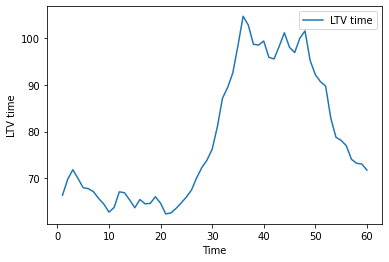

In [5]:
plt.plot('time','LTV_time', data=LTV_time, label='LTV time')
plt.xlabel('Time')
plt.ylabel('LTV time')
plt.legend(loc='best')
plt.show()

The loan to value ratio over time is low during the time period 0 to 30. After the Global Financial Crisis in 2008 (period 30), the loan to value ratio increases significantly and is higher than the previous periods as the rates are above 90%. In the period 35, the loan to value ratio is highest which is above 100% is very high risk. A higher level of lending is because the money is being lent to someone who has less capital, therefore, the lenders normally requires higher interest rate for these lendings as they are very high risk. During GFC, the economy is in recession period, and people lost their jobs, homes and wealth, so the LTV ratio is very high since the GFC starts in period 30. 


# LTV_time by origination time/vintage

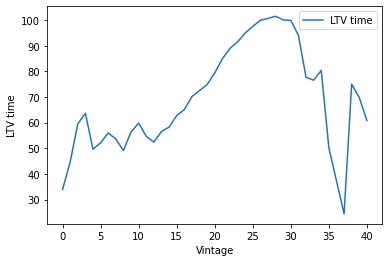

In [6]:
data.loc[:,'orig_time2']=data.loc[:,'orig_time']
data.loc[data['orig_time2']<0,'orig_time2']=0
data.loc[data['orig_time2']>=40,'orig_time2']=40

LTV_time = data.groupby('orig_time2')['LTV_time'].mean().reset_index(drop=False)

plt.plot('orig_time2','LTV_time', data=LTV_time, label='LTV time')
plt.xlabel('Vintage')
plt.ylabel('LTV time')
plt.legend(loc='best')
plt.show()

Vintage is defined as the orgination time. The loan to value ratio of the loans originated before GFC (period 30) increases drammatically which the ratio reaches 100%, and it decreases after the GFC. There is a huge plummet in period 37, and the loan to value ratio is down to below 30% after the economy recession period. It indicates the GFC might have been improved during this period, and the bank is doing better in making decision. With the low loan to value ratio, there is higher chance to get loan approved. 

# LTV_time by age

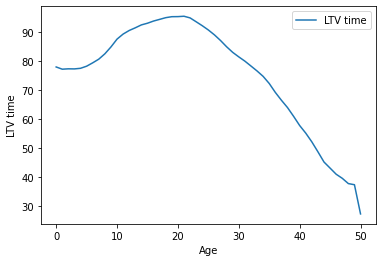

In [7]:
data.loc[:,'age']=data.loc[:,'time']-data.loc[:,'orig_time']
data.loc[data['age']>=50,'age'] = 50

LTV_time = data.groupby('age')['LTV_time'].mean().reset_index(drop=False)

plt.plot('age','LTV_time', data=LTV_time, label='LTV time')
plt.xlabel('Age')
plt.ylabel('LTV time')
plt.legend(loc='best')
plt.show()

Loan age is to reflect the time-varying contractual features such as loan amortization schedule. With age, the loan to value rate decreases, and the shape is right-skewed from period 0 to 50. The loan to value is high at the age of 20, and the rate decreases after that age


# cep_time by time

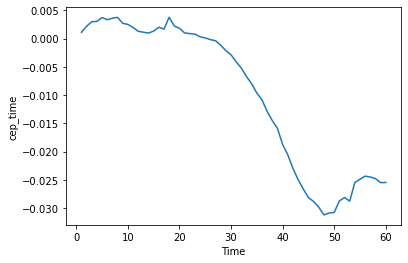

In [8]:
#compute the cumulative excess payments by the difference between balance scheduled time and observed balance over the property price
data.loc[:,'annuity_scheduled'] = ((data.loc[:,'interest_rate_time']/(100*4)) * data.loc[:,'balance_orig_time']) / (1-(1+data.loc[:,'interest_rate_time']/(100*4))**(-(data.loc[:,'mat_time'] - data.loc[:,'orig_time'])))
data.loc[:,'annuity_scheduled'] = data.loc[:,'annuity_scheduled'].interpolate()
data.loc[:,'balance_scheduled_time']  = data.loc[:,'balance_orig_time'] * (1+data.loc[:,'interest_rate_time']/(100*4))**(data.loc[:,'time'] - data.loc[:,'orig_time']-1) - data.loc[:,'annuity_scheduled'] * ((1+data.loc[:,'interest_rate_time']/(100*4))**(data.loc[:,'time']-data.loc[:,'orig_time']-1)-1) / (data.loc[:,'interest_rate_time']/(100*4))
data.loc[:,'property_orig_time'] = np.maximum(data.loc[:,'balance_orig_time'] / (data.loc[:,'LTV_orig_time']/100),100000)
data.loc[:,'cep_time']=(data.loc[:,'balance_scheduled_time']-data.loc[:,'balance_time'])/data.loc[:,'property_orig_time']

cep_time=data.groupby('time')['cep_time'].mean().reset_index(drop=False)


plt.plot('time','cep_time',data=cep_time)
plt.xlabel('Time')
plt.ylabel('cep_time')
plt.show()

Cumulative excess payments indicate the liquidity ability of the borrower. The CEP over time is calculated by the difference between balance scheduled time and observed balance over the property price. The property value at origination is floored at $100,000. Before period 30 which is the GFC period, the CEP increases and is high at 0.005. After the GFC, the CEP decreases and is down to -0.030 in the period 50. It indicates that borrowers have higher liquidity ability before GFC. 

* Note: 
There is missing values (using isnull function to find out there is missing values from annuity scheduled payments) and some values of the data are infinitive that creates crack when computing the shape of cep_time. The function of (pd.options.mode.use_inf_as_na = True) is to define all the infinitive value are true, and the function of interpolate is to estimate the missing values. 


# cep_time by vintage

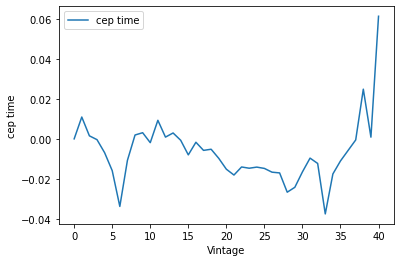

In [9]:
cep_time = data.groupby('orig_time2')['cep_time'].mean().reset_index(drop=False)

plt.plot('orig_time2','cep_time', data=cep_time, label='cep time')
plt.xlabel('Vintage')
plt.ylabel('cep time')
plt.legend(loc='best')
plt.show()

CEP for loan originated has a hump shape, and it has an increasing trend. After period 30 (GFC), the CEP has a plummet , and then it startes to increase from period 35 to high rate of 0.06 in the period 40. It indicates the recovery after the Global Financial Crisis which liquidity of borrowers increase. 


# cep_time by age

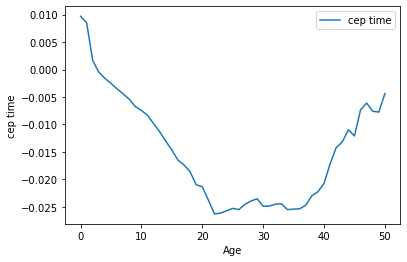

In [10]:
data.loc[:,'age']=data.loc[:,'time']-data.loc[:,'orig_time']
data.loc[data['age']>=50,'age'] = 50

cep_time = data.groupby('age')['cep_time'].mean().reset_index(drop=False)

plt.plot('age','cep_time', data=cep_time, label='cep time')
plt.xlabel('Age')
plt.ylabel('cep time')
plt.legend(loc='best')
plt.show()

The loan age is calculated by the different of time and the origination of loan. The loan age indicates the amortisation schedule for loan. The CEP is low at the age of 20 to 40, and it increases after the age of 40. It shows that the liquidity of loan repayment of borrower is high at the beginning of the loan age and at the later age of the loan. 


# FICO_orig_time by time

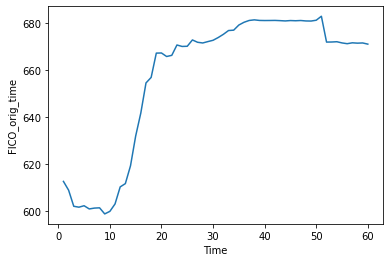

In [11]:
FICO_orig_time = data.groupby('time')['FICO_orig_time'].mean().reset_index(drop=False)

plt.plot('time','FICO_orig_time',data=FICO_orig_time, label='FICO origination time')
plt.xlabel('Time')
plt.ylabel('FICO_orig_time')
plt.show()

FICO score at the origination time is low before the time of GFC which is between 600 to 660. After the GFC, the FICO score is above 660 which is good credit score. 


# FICO_orig_time by vintage

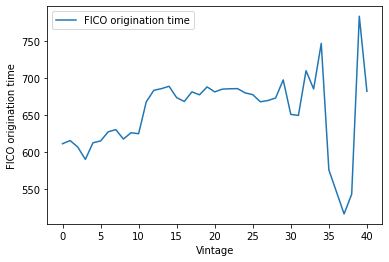

In [12]:
data.loc[:,'orig_time2']=data.loc[:,'orig_time']
data.loc[data['orig_time2']<0,'orig_time2']=0
data.loc[data['orig_time2']>=40,'orig_time2']=40

FICO_orig_time = data.groupby('orig_time2')['FICO_orig_time'].mean().reset_index(drop=False)

plt.plot('orig_time2','FICO_orig_time', data=FICO_orig_time, label='FICO origination time')
plt.xlabel('Vintage')
plt.ylabel('FICO origination time')
plt.legend(loc='best')
plt.show()

FICO score of loan originated has an increasing trend. After GFC period, it increases and then has a huge plummet in the period 37. This plummet point is which the FICO score is below 600, so it indicates there is subprime lending offered to individuals by the bank in this period with the exceptional higher interest rate than prime borrowers. 

# FICO_orig_time by age

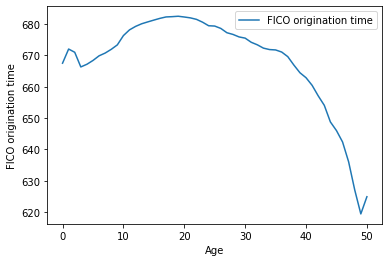

In [13]:
data.loc[:,'age']=data.loc[:,'time']-data.loc[:,'orig_time']
data.loc[data['age']>=50,'age'] = 50

cep_time = data.groupby('age')['FICO_orig_time'].mean().reset_index(drop=False)

plt.plot('age','FICO_orig_time', data=cep_time, label='FICO origination time')
plt.xlabel('Age')
plt.ylabel('FICO origination time')
plt.legend(loc='best')
plt.show()

With age, the FICO score decreases, and the shape is right-skewed from period 0 to 50. The FICO score is high at the age of 20 which is above 680, and the score decreases after that age.


# b)

# Visualize LTV_time bucket and default rates

In [14]:
data.loc[:,'LTV_time_cat']=0
data.loc[data['LTV_time']>=10,'LTV_time_cat']=1
data.loc[data['LTV_time']>=20,'LTV_time_cat']=2
data.loc[data['LTV_time']>=30,'LTV_time_cat']=3
data.loc[data['LTV_time']>=40,'LTV_time_cat']=4
data.loc[data['LTV_time']>=50,'LTV_time_cat']=5
data.loc[data['LTV_time']>=60,'LTV_time_cat']=6
data.loc[data['LTV_time']>=70,'LTV_time_cat']=7
data.loc[data['LTV_time']>=80,'LTV_time_cat']=8
data.loc[data['LTV_time']>=90,'LTV_time_cat']=9
data.loc[data['LTV_time']>=100,'LTV_time_cat']=10
data.loc[data['LTV_time']>=110,'LTV_time_cat']=11
data.loc[data['LTV_time']>=120,'LTV_time_cat']=12
data.loc[data['LTV_time']>=130,'LTV_time_cat']=13
data.loc[data['LTV_time']>=140,'LTV_time_cat']=14
data.loc[data['LTV_time']>=150,'LTV_time_cat']=15

In [15]:
LTV_time_cat_means=data.groupby('LTV_time_cat')[['LTV_time','default_time']].mean().reset_index(drop=False)
LTV_time_cat_means

LTV_time_cat    LTV_time  default_time
0              0    4.488509      0.004021
1              1   15.603112      0.006285
2              2   25.439361      0.008402
3              3   35.636816      0.007499
4              4   45.560967      0.007988
..           ...         ...           ...
11            11  114.292112      0.048892
12            12  124.345608      0.054741
13            13  134.460793      0.049480
14            14  143.934655      0.044537
15            15  190.651814      0.053812

[16 rows x 3 columns]

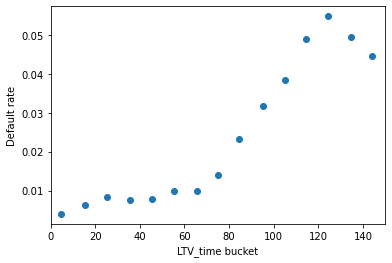

In [16]:
plt.scatter('LTV_time','default_time', data=LTV_time_cat_means)
plt.ylabel('Default rate')
plt.xlabel('LTV_time bucket')
plt.xlim([0,150])
plt.show()

Forming 15 classes for the loan to value category is by self-defined boundaries. There is a moderate relationship between default rate and LTV class 1 to 6. The relationship between LTV class 6 to 12 is a strong positively. From LTV class 12 to 15, there is a moderate negatively. The LTV is high at above 80%, which means the default rate is higher compared to the LTV below 80%. Nevertheless, if the LTV exceeds 120%, it indicates that there is a saturation effect which translates to the negative relationship between LTV and default rate.

# Visualize Cep_time and default rates

In [17]:
data.loc[:,'cep_time_cat']=0
data.loc[data['cep_time']>=-0.040,'cep_time_cat']=1
data.loc[data['cep_time']>=-0.030,'cep_time_cat']=2
data.loc[data['cep_time']>=-0.020,'cep_time_cat']=3
data.loc[data['cep_time']>=-0.010,'cep_time_cat']=4
data.loc[data['cep_time']>=-0.000,'cep_time_cat']=5
data.loc[data['cep_time']>=0.010,'cep_time_cat']=6
data.loc[data['cep_time']>=0.020,'cep_time_cat']=7
data.loc[data['cep_time']>=0.030,'cep_time_cat']=8
data.loc[data['cep_time']>=0.040,'cep_time_cat']=9
data.loc[data['cep_time']>=0.050,'cep_time_cat']=10
data.loc[data['cep_time']>=0.060,'cep_time_cat']=11
data.loc[data['cep_time']>=0.070,'cep_time_cat']=12
data.loc[data['cep_time']>=0.080,'cep_time_cat']=13
data.loc[data['cep_time']>=0.090,'cep_time_cat']=14

In [18]:
cep_time_cat_means=data.groupby('cep_time_cat')[['cep_time','default_time']].mean().reset_index(drop=False)
cep_time_cat_means

cep_time_cat  cep_time  default_time
0              0 -0.092055      0.028136
1              1 -0.034753      0.030421
2              2 -0.024699      0.031428
3              3 -0.014520      0.040033
4              4 -0.002476      0.026619
..           ...       ...           ...
10            10  0.054762      0.004934
11            11  0.064914      0.007489
12            12  0.074867      0.007697
13            13  0.084852      0.005431
14            14  0.240322      0.006383

[15 rows x 3 columns]

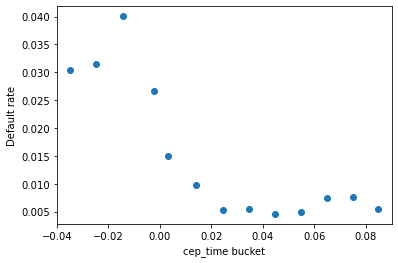

In [19]:
plt.scatter('cep_time','default_time', data=cep_time_cat_means)
plt.ylabel('Default rate')
plt.xlabel('cep_time bucket')
plt.xlim([-0.040,0.090])
plt.show()

Forming 14 classes for Cummulative Excess Payment over time category is by self-defined boundaries. There are between CEP and default rate: CEP class 1 to 5 (moderate positive), CEP class 5 to 7 (strong negative) and CEP class 7 to 11 (moderate positive). The low rate of CEP indicates higher default rate, therefore, when the CEP is below -0.02 indicating high default rate of 0.03. The higher CEP means lower default rate. As such, the CEP is above 0.02 indicating the very low rate of default rate which is below 0.010 as CEP represents the liquidity of the borrower.  


# Visualize FICO_orig_time and default rates

In [20]:
data['FICO_orig_time_cat'] = 0  
data.loc[data['FICO_orig_time'] >= 400, 'FICO_orig_time_cat'] = 1  
data.loc[data['FICO_orig_time'] >= 450, 'FICO_orig_time_cat'] = 2  
data.loc[data['FICO_orig_time'] >= 500, 'FICO_orig_time_cat'] = 3  
data.loc[data['FICO_orig_time'] >= 550, 'FICO_orig_time_cat'] = 4  
data.loc[data['FICO_orig_time'] >= 600, 'FICO_orig_time_cat'] = 5  
data.loc[data['FICO_orig_time'] >= 650, 'FICO_orig_time_cat'] = 6  
data.loc[data['FICO_orig_time'] >= 700, 'FICO_orig_time_cat'] = 7  
data.loc[data['FICO_orig_time'] >= 750, 'FICO_orig_time_cat'] = 8  
data.loc[data['FICO_orig_time'] >= 800, 'FICO_orig_time_cat'] = 9 

In [21]:
FICO_orig_time_cat_means=data.groupby('FICO_orig_time_cat')[['FICO_orig_time','default_time']].mean().reset_index(drop=False)
FICO_orig_time_cat_means

FICO_orig_time_cat  FICO_orig_time  default_time
0                   1      436.666667      0.040816
1                   2      481.812421      0.044360
2                   3      526.828592      0.034474
3                   4      576.773594      0.035309
4                   5      626.565557      0.032165
5                   6      674.445672      0.025906
6                   7      722.919802      0.018484
7                   8      771.171253      0.010276
8                   9      806.642857      0.007826

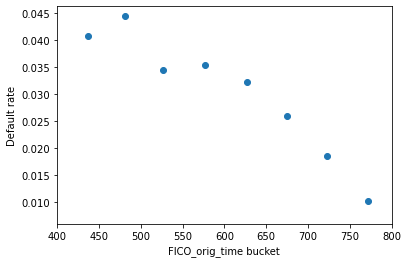

In [22]:
plt.scatter('FICO_orig_time','default_time', data=FICO_orig_time_cat_means)
plt.ylabel('Default rate')
plt.xlabel('FICO_orig_time bucket')
plt.xlim([400,800])
plt.show()

Forming 9 classes for the FICO score category is by self-defined boundaries. There are relationship between FICO score and default rate: FICO class 1 to 3 (moderate positive) and FICO score class 4 to 9 (strong negative). The default rate is low when there is high FICO score above 550 which is good credit score. There is high default rate when the FICO score is below 500, as such the default is above 0.040 for these subprime borrowers. 


# QUESTION 2

# a)

In [23]:
data=data.sort_values(by=['id','time'])
print(data.loc[(data.id==9)|(data.id==47),['id','time','default_time']])
data[['default_time']].mean()

     id  time  default_time
103   9    25             0
104   9    26             0
105   9    27             0
106   9    28             0
107   9    29             0
..   ..   ...           ...
114   9    36             0
115   9    37             1
359  47    25             0
360  47    26             0
361  47    27             0

[16 rows x 3 columns]


default_time    0.024351
dtype: float64

In [24]:
data_logistic=smf.glm(formula='default_time ~ LTV_time + cep_time + FICO_orig_time', family=sm.families.Binomial(), data=data).fit()

print(data_logistic.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           default_time   No. Observations:               622194
Model:                            GLM   Df Residuals:                   622190
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -67801.
Date:                Mon, 25 Oct 2021   Deviance:                   1.3560e+05
Time:                        02:46:03   Pearson chi2:                 5.77e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -2.5379      0.084    -30.

In [25]:
PD_logistic_model = pd.DataFrame(data_logistic.fittedvalues,columns=['PD_logistic_model'])
data2 = pd.merge(data, PD_logistic_model, right_index=True, left_index=True)
print(data2[['default_time','PD_logistic_model']].describe().round(3))

       default_time  PD_logistic_model
count    622194.000         622194.000
mean          0.024              0.024
std           0.154              0.018
min           0.000              0.001
25%           0.000              0.012
50%           0.000              0.020
75%           0.000              0.031
max           1.000              0.927


In [26]:
data2

id  time  orig_time  first_time  mat_time  res_time  balance_time  \
0           1    25         -7          25       113       NaN      41303.42   
1           1    26         -7          25       113       NaN      41061.95   
2           1    27         -7          25       113       NaN      40804.42   
3           1    28         -7          25       113       NaN      40483.89   
4           1    29         -7          25       113       NaN      40367.06   
...       ...   ...        ...         ...       ...       ...           ...   
622484  50000    56         16          52       177       NaN     517107.42   
622485  50000    57         16          52       177       NaN     512274.57   
622486  50000    58         16          52       177       NaN     507396.72   
622487  50000    59         16          52       177       NaN     502478.87   
622488  50000    60         16          52       177       NaN     497521.35   

         LTV_time  interest_rate_time  rate_time  ...  orig_time2  age  \
0       24.498336               9.200       5.44  ...           0   32   
1       24.483867               9.200       5.44  ...           0   33   
2       24.626795               9.200       5.44  ...           0   34   
3       24.735883               9.200       5.44  ...           0   35   
4       24.925476               9.200       5.44  ...           0   36   
...           ...                 ...        ...  ...         ...  ...   
622484  57.659403               2.664       3.86  ...          16   40   
622485  55.359916               2.652       3.86  ...          16   41   
622486  54.492206               2.644       3.86  ...          16   42   
622487  54.171106               2.638       3.86  ...          16   43   
622488  53.023479               2.635       3.86  ...          16   44   

        annuity_scheduled  balance_scheduled_time  property_orig_time  \
0             1107.309076            41781.639104            100000.0   
1             1107.309076            41635.307727            100000.0   
2             1107.309076            41485.610729            100000.0   
3             1107.309076            41332.470699            100000.0   
4             1107.309076            41175.808449            100000.0   
...                   ...                     ...                 ...   
622484        6735.602574           561365.586580            830000.0   
622485        6722.175165           558136.540045            830000.0   
622486        6713.231444           554956.620478            830000.0   
622487        6706.527796           551790.507231            830000.0   
622488        6703.177305           548661.246101            830000.0   

        cep_time  LTV_time_cat  cep_time_cat  FICO_orig_time_cat  \
0       0.004782             2             5                   7   
1       0.005734             2             5                   7   
2       0.006812             2             5                   7   
3       0.008486             2             5                   7   
4       0.008087             2             5                   7   
...          ...           ...           ...                 ...   
622484  0.053323             5            10                   6   
622485  0.055255             5            10                   6   
622486  0.057301             5            10                   6   
622487  0.059412             5            10                   6   
622488  0.061614             5            11                   6   

        PD_logistic_model  
0                0.003712  
1                0.003719  
2                0.003743  
3                0.003770  
4                0.003784  
...                   ...  
622484           0.013448  
622485           0.012747  
622486           0.012533  
622487           0.012498  
622488           0.012206  

[622194 rows x 38 columns]

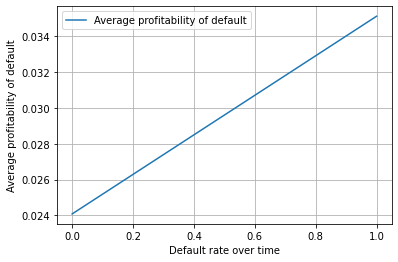

In [27]:
PD_average = data2.groupby('default_time')['PD_logistic_model'].mean().reset_index(drop=False)

plt.plot('default_time','PD_logistic_model', data=PD_average, label='Average profitability of default')
plt.xlabel('Default rate over time')
plt.ylabel('Average profitability of default')
plt.legend(loc='best')
plt.grid(True)
plt.show()

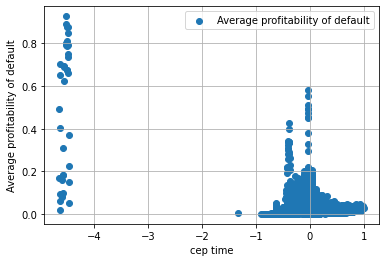

In [28]:
PD_average = data2.groupby('cep_time')['PD_logistic_model'].mean().reset_index(drop=False)

plt.scatter('cep_time','PD_logistic_model', data=PD_average, label='Average profitability of default')
plt.xlabel('cep time')
plt.ylabel('Average profitability of default')
plt.legend(loc='best')
plt.grid(True)
plt.show()

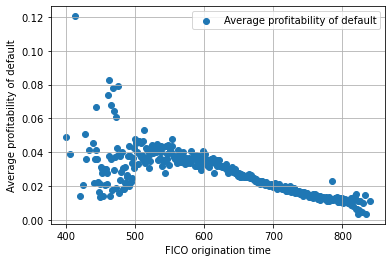

In [29]:
PD_average = data2.groupby('FICO_orig_time')['PD_logistic_model'].mean().reset_index(drop=False)

plt.scatter('FICO_orig_time','PD_logistic_model', data=PD_average, label='Average profitability of default')
plt.xlabel('FICO origination time')
plt.ylabel('Average profitability of default')
plt.legend(loc='best')
plt.grid(True)
plt.show()

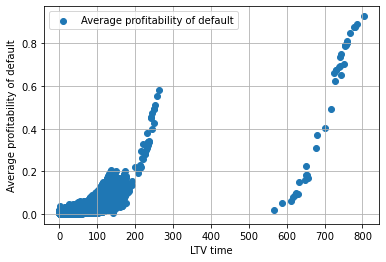

In [30]:
PD_average = data2.groupby('LTV_time')['PD_logistic_model'].mean().reset_index(drop=False)

plt.scatter('LTV_time','PD_logistic_model',data=PD_average, label='Average profitability of default')
plt.xlabel('LTV time')
plt.ylabel('Average profitability of default')
plt.legend(loc='best')
plt.grid(True)
plt.show()

Applying a logistic regression model to predict mortgage default probabilities (PD) which model is as below
                        𝑃𝐷=𝛽0+𝛽1∗feature1+𝛽2∗feature2+𝛽3∗feature3+𝜖 
The intercept which is 𝛽0= -2.5379. The three features that are estimated for the PD model are LTV time, CEP time and FICO score. The LTV time coefficient is 0.0257, and the CEP time coefficient is 2.5453, and the FICO score coefficient is -0.0052. The mean of the PD is fitted with the default rate which is 0.024. The computation of the estimated PD for all mortgage loans and periods is shown in the data 2 as above under the column PD_logistic_model. 

Plot and compare the PD with default rate over time and with each feature is shown in the above charts. 

In the chart of average PD which is computed from the logistic regression model versus the default rate: it shows a straight line as the computed PD is fitted with the default rate 

In the chart of average PD versus CEP time: there is a linear line from scatter points for the CEP time below -4, and above -1. The CEP time coefficient is 2.5453 showing the positive relationship between PD and CEP time.

In the chart of average PD versus FICO score: there is a strongly negative relationship that makes a linear line as shown in the chart. The FICO score coefficient is -0.0052 which indicates that is the negative relationship. The increase in FICO score means the low PD. 

In the chart of average PD versus LTV time: there is a strong positive relationship between PD and LTV time as the LTV time coefficient is 0.0257. From the chart, it shows the higher rate of LTV creating very high probabilities of default. 

# b)

In [31]:
data.loc[:,'LTV_time_p1'] = data.loc[:,'LTV_time']**1  
data.loc[:,'LTV_time_p2'] = data.loc[:,'LTV_time']**2  
data.loc[:,'LTV_time_p3'] = data.loc[:,'LTV_time']**3 

data.loc[:,'FICO_orig_time_p1'] = data.loc[:,'FICO_orig_time']**1  
data.loc[:,'FICO_orig_time_p2'] = data.loc[:,'FICO_orig_time']**2  
data.loc[:,'FICO_orig_time_p3'] = data.loc[:,'FICO_orig_time']**3 

data.loc[:,'cep_time_p1'] = data.loc[:,'cep_time']**1  
data.loc[:,'cep_time_p2'] = data.loc[:,'cep_time']**2  
data.loc[:,'cep_time_p3'] = data.loc[:,'cep_time']**3

In [32]:
data2_logistic = smf.glm(formula='default_time ~ LTV_time_p1 + LTV_time_p2 +  LTV_time_p3 + FICO_orig_time_p1 + FICO_orig_time_p2 + FICO_orig_time_p3 + cep_time_p1 + cep_time_p2 + cep_time_p3', family=sm.families.Binomial(), data=data).fit()
print(data2_logistic.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           default_time   No. Observations:               622194
Model:                            GLM   Df Residuals:                   622186
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 25 Oct 2021   Deviance:                   1.3463e+05
Time:                        02:46:21   Pearson chi2:                 5.92e+05
No. Iterations:                    16                                         
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            18.9856      4.24

In [33]:
PD2_nonlinear=pd.DataFrame(data2_logistic.fittedvalues,columns=['PD2_nonlinear'])
data3=pd.merge(data2, PD2_nonlinear, right_index=True, left_index=True)
print(data3[['default_time','PD2_nonlinear']].describe().round(3))

       default_time  PD2_nonlinear
count    622194.000     622194.000
mean          0.024          0.024
std           0.154          0.018
min           0.000          0.000
25%           0.000          0.011
50%           0.000          0.019
75%           0.000          0.034
max           1.000          0.202


In [34]:
data3

id  time  orig_time  first_time  mat_time  res_time  balance_time  \
0           1    25         -7          25       113       NaN      41303.42   
1           1    26         -7          25       113       NaN      41061.95   
2           1    27         -7          25       113       NaN      40804.42   
3           1    28         -7          25       113       NaN      40483.89   
4           1    29         -7          25       113       NaN      40367.06   
...       ...   ...        ...         ...       ...       ...           ...   
622484  50000    56         16          52       177       NaN     517107.42   
622485  50000    57         16          52       177       NaN     512274.57   
622486  50000    58         16          52       177       NaN     507396.72   
622487  50000    59         16          52       177       NaN     502478.87   
622488  50000    60         16          52       177       NaN     497521.35   

         LTV_time  interest_rate_time  rate_time  ...  age  annuity_scheduled  \
0       24.498336               9.200       5.44  ...   32        1107.309076   
1       24.483867               9.200       5.44  ...   33        1107.309076   
2       24.626795               9.200       5.44  ...   34        1107.309076   
3       24.735883               9.200       5.44  ...   35        1107.309076   
4       24.925476               9.200       5.44  ...   36        1107.309076   
...           ...                 ...        ...  ...  ...                ...   
622484  57.659403               2.664       3.86  ...   40        6735.602574   
622485  55.359916               2.652       3.86  ...   41        6722.175165   
622486  54.492206               2.644       3.86  ...   42        6713.231444   
622487  54.171106               2.638       3.86  ...   43        6706.527796   
622488  53.023479               2.635       3.86  ...   44        6703.177305   

        balance_scheduled_time  property_orig_time  cep_time  LTV_time_cat  \
0                 41781.639104            100000.0  0.004782             2   
1                 41635.307727            100000.0  0.005734             2   
2                 41485.610729            100000.0  0.006812             2   
3                 41332.470699            100000.0  0.008486             2   
4                 41175.808449            100000.0  0.008087             2   
...                        ...                 ...       ...           ...   
622484           561365.586580            830000.0  0.053323             5   
622485           558136.540045            830000.0  0.055255             5   
622486           554956.620478            830000.0  0.057301             5   
622487           551790.507231            830000.0  0.059412             5   
622488           548661.246101            830000.0  0.061614             5   

        cep_time_cat  FICO_orig_time_cat  PD_logistic_model  PD2_nonlinear  
0                  5                   7           0.003712       0.004874  
1                  5                   7           0.003719       0.004869  
2                  5                   7           0.003743       0.004853  
3                  5                   7           0.003770       0.004836  
4                  5                   7           0.003784       0.004829  
...              ...                 ...                ...            ...  
622484            10                   6           0.013448       0.009286  
622485            10                   6           0.012747       0.008690  
622486            10                   6           0.012533       0.008457  
622487            10                   6           0.012498       0.008345  
622488            11                   6           0.012206       0.008068  

[622194 rows x 39 columns]

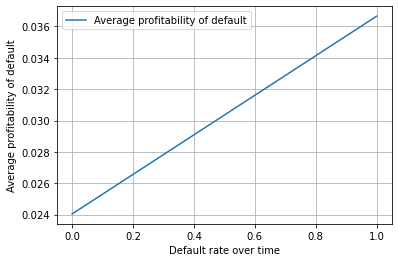

In [35]:
PD2_average = data3.groupby('default_time')['PD2_nonlinear'].mean().reset_index(drop=False)

plt.plot('default_time','PD2_nonlinear', data=PD2_average, label='Average profitability of default')
plt.xlabel('Default rate over time')
plt.ylabel('Average profitability of default')
plt.legend(loc='best')
plt.grid(True)
plt.show()

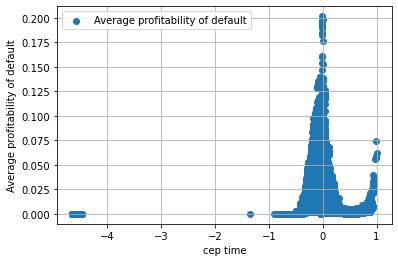

In [36]:
PD2_average = data3.groupby('cep_time')['PD2_nonlinear'].mean().reset_index(drop=False)

plt.scatter('cep_time','PD2_nonlinear', data=PD2_average, label='Average profitability of default')
plt.xlabel('cep time')
plt.ylabel('Average profitability of default')
plt.legend(loc='best')
plt.grid(True)
plt.show()

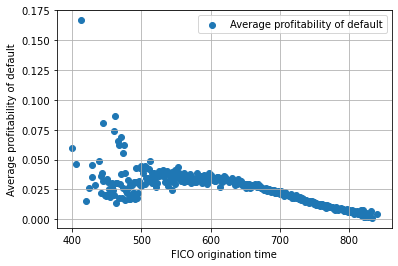

In [37]:
PD2_average = data3.groupby('FICO_orig_time')['PD2_nonlinear'].mean().reset_index(drop=False)

plt.scatter('FICO_orig_time','PD2_nonlinear', data=PD2_average, label='Average profitability of default')
plt.xlabel('FICO origination time')
plt.ylabel('Average profitability of default')
plt.legend(loc='best')
plt.grid(True)
plt.show()

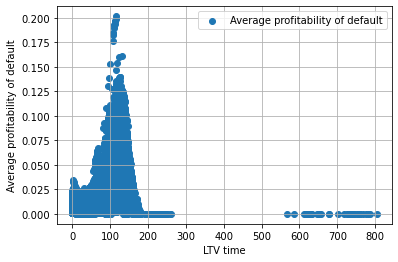

In [38]:
PD2_average = data3.groupby('LTV_time')['PD2_nonlinear'].mean().reset_index(drop=False)

plt.scatter('LTV_time','PD2_nonlinear', data=PD2_average, label='Average profitability of default')
plt.xlabel('LTV time')
plt.ylabel('Average profitability of default')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In this PD model, a non-linear transformation of the feature set (LTV time, CEP time and FICO score) is used to get a better model accuracy. Non-linear transformations applies polynomial terms for the feature set with the power of one, two and three. The out-of-sample may observe a better prediction for probabilities of default. The PD model is as following:
                𝑃𝐷=𝛽0 + 𝛽1∗feature1^1 + 𝛽2∗feature1^2 + 𝛽3∗feature1^3 +...

The intercept which is 𝛽0= 18.9856. The LTV time p1 coefficient is -0.0612, the LTV time p2 coefficient 0.0012, the LTV time p3 coefficient is -5.082e-06. The FICO score of p1,p2,p3 is as following -0.1084, 0.0002, -9.902e-08. The CEP time coefficient of p1,p2,p3 is as following -1.3270, -10.9449, 13.8780. The coefficient of these out-of-sample is larger than the model in the question 2a. The mean of the PD is fitted with the default rate which is 0.024. The computation of the estimated PD for all mortgage loans and periods is shown in the data 3 as above under the column PD2_nonlinear.

Plot and compare the PD with default rate over time and with each feature is shown in the above charts.

In the chart of computed average PD versus the default rate: it shows a straight line as the computed PD is fitted with the default rate

In the chart of average PD versus CEP time: there is a nonlinear line from scatter points for the CEP time above -1. There are high probabilities for the CEP time above -1

In the chart of average PD versus FICO score: there is a strongly negative relationship that makes a linear line as shown in the chart as in the one in question 2a. The increase in FICO score means the low PD, and the higher FICO score which is above 600 creates lower probabilities of default. 

In the chart of average PD versus LTV time: there is nonlinear line PD and LTV time. From the chart, it shows the observed samples which are the LTV rates above 100 creating very high probabilities of default.


# c)

In [39]:
data_train=data.loc[data.time<30,:].copy()
data_train

id  time  orig_time  first_time  mat_time  res_time  balance_time  \
0           1    25         -7          25       113       NaN      41303.42   
1           1    26         -7          25       113       NaN      41061.95   
2           1    27         -7          25       113       NaN      40804.42   
3           1    28         -7          25       113       NaN      40483.89   
4           1    29         -7          25       113       NaN      40367.06   
...       ...   ...        ...         ...       ...       ...           ...   
616430  49190    28         26          28       146       NaN     288659.27   
616431  49191    28         26          28       146       NaN     374750.60   
616432  49191    29         26          28       146       NaN     374495.60   
616437  49192    28         26          28       146       NaN     183816.34   
616438  49192    29         26          28       146       NaN     183535.38   

         LTV_time  interest_rate_time  rate_time  ...  FICO_orig_time_cat  \
0       24.498336                9.20       5.44  ...                   7   
1       24.483867                9.20       5.44  ...                   7   
2       24.626795                9.20       5.44  ...                   7   
3       24.735883                9.20       5.44  ...                   7   
4       24.925476                9.20       5.44  ...                   7   
...           ...                 ...        ...  ...                 ...   
616430  86.998414                8.65       4.64  ...                   5   
616431  71.068195                8.90       4.64  ...                   4   
616432  71.771300                8.90       4.64  ...                   4   
616437  57.429350                9.45       4.64  ...                   3   
616438  57.948303                9.45       4.64  ...                   3   

        LTV_time_p1  LTV_time_p2    LTV_time_p3  FICO_orig_time_p1  \
0         24.498336   600.168479   14703.129215                715   
1         24.483867   599.459753   14677.092966                715   
2         24.626795   606.479030   14935.634716                715   
3         24.735883   611.863931   15134.994901                715   
4         24.925476   621.279337   15485.683008                715   
...             ...          ...            ...                ...   
616430    86.998414  7568.724091  658466.994212                605   
616431    71.068195  5050.688323  358943.301992                553   
616432    71.771300  5151.119483  369702.540979                553   
616437    57.429350  3298.130194  189409.471933                516   
616438    57.948303  3358.005835  194590.739996                516   

        FICO_orig_time_p2  FICO_orig_time_p3  cep_time_p1   cep_time_p2  \
0                  511225          365525875     0.004782  2.286935e-05   
1                  511225          365525875     0.005734  3.287391e-05   
2                  511225          365525875     0.006812  4.640208e-05   
3                  511225          365525875     0.008486  7.200892e-05   
4                  511225          365525875     0.008087  6.540741e-05   
...                   ...                ...          ...           ...   
616430             366025          221445125    -0.000526  2.763214e-07   
616431             305809          169112377    -0.000724  5.243415e-07   
616432             305809          169112377    -0.001464  2.144017e-06   
616437             266256          137388096    -0.000296  8.780628e-08   
616438             266256          137388096    -0.000316  9.999064e-08   

         cep_time_p3  
0       1.093656e-07  
1       1.884851e-07  
2       3.160867e-07  
3       6.110538e-07  
4       5.289814e-07  
...              ...  
616430 -1.452519e-10  
616431 -3.796832e-10  
616432 -3.139368e-09  
616437 -2.601886e-11  
616438 -3.161833e-11  

[204147 rows x 46 columns]

In [40]:
data_test=data.loc[data.time>30,:].copy()
data_test

id  time  orig_time  first_time  mat_time  res_time  balance_time  \
6           1    31         -7          25       113       NaN      39718.66   
7           1    32         -7          25       113       NaN      35877.03   
8           1    33         -7          25       113       NaN      34410.03   
9           1    34         -7          25       113       NaN      33590.47   
10          1    35         -7          25       113       NaN      32952.48   
...       ...   ...        ...         ...       ...       ...           ...   
622484  50000    56         16          52       177       NaN     517107.42   
622485  50000    57         16          52       177       NaN     512274.57   
622486  50000    58         16          52       177       NaN     507396.72   
622487  50000    59         16          52       177       NaN     502478.87   
622488  50000    60         16          52       177       NaN     497521.35   

         LTV_time  interest_rate_time  rate_time  ...  FICO_orig_time_cat  \
6       26.566117               9.200       5.44  ...                   7   
7       25.872559               9.200       5.44  ...                   7   
8       25.584425               9.200       5.44  ...                   7   
9       26.008073               9.200       5.44  ...                   7   
10      27.286499               9.200       5.44  ...                   7   
...           ...                 ...        ...  ...                 ...   
622484  57.659403               2.664       3.86  ...                   6   
622485  55.359916               2.652       3.86  ...                   6   
622486  54.492206               2.644       3.86  ...                   6   
622487  54.171106               2.638       3.86  ...                   6   
622488  53.023479               2.635       3.86  ...                   6   

        LTV_time_p1  LTV_time_p2    LTV_time_p3  FICO_orig_time_p1  \
6         26.566117   705.758562   18749.264380                715   
7         25.872559   669.389291   17318.813692                715   
8         25.584425   654.562820   16746.613600                715   
9         26.008073   676.419859   17592.377043                715   
10        27.286499   744.553048   20316.246296                715   
...             ...          ...            ...                ...   
622484    57.659403  3324.606705  191694.836395                653   
622485    55.359916  3064.720297  169662.658134                653   
622486    54.492206  2969.400476  161809.181401                653   
622487    54.171106  2934.508748  158965.585036                653   
622488    53.023479  2811.489364  149074.948267                653   

        FICO_orig_time_p2  FICO_orig_time_p3  cep_time_p1  cep_time_p2  \
6                  511225          365525875     0.011329     0.000128   
7                  511225          365525875     0.048068     0.002311   
8                  511225          365525875     0.061023     0.003724   
9                  511225          365525875     0.067463     0.004551   
10                 511225          365525875     0.072047     0.005191   
...                   ...                ...          ...          ...   
622484             426409          278445077     0.053323     0.002843   
622485             426409          278445077     0.055255     0.003053   
622486             426409          278445077     0.057301     0.003283   
622487             426409          278445077     0.059412     0.003530   
622488             426409          278445077     0.061614     0.003796   

        cep_time_p3  
6          0.000001  
7          0.000111  
8          0.000227  
9          0.000307  
10         0.000374  
...             ...  
622484     0.000152  
622485     0.000169  
622486     0.000188  
622487     0.000210  
622488     0.000234  

[392436 rows x 46 columns]

# Test the accuracy of PD model 2A

In [41]:
data_logistic_train=smf.glm(formula='default_time ~ LTV_time + cep_time + FICO_orig_time', family=sm.families.Binomial(), data=data_train).fit()
data_logistic_train.params

Intercept         1.207504
LTV_time          0.020676
cep_time         -2.940605
FICO_orig_time   -0.010836
dtype: float64

In [42]:
PD_logistic = pd.DataFrame(data_logistic_train.predict(data_test),columns=['PD_logistic_model2'])
data_test = pd.merge(data_test,PD_logistic,right_index=True,left_index=True)

In [43]:
data_test = data_test.dropna(subset=['PD_logistic_model2'])

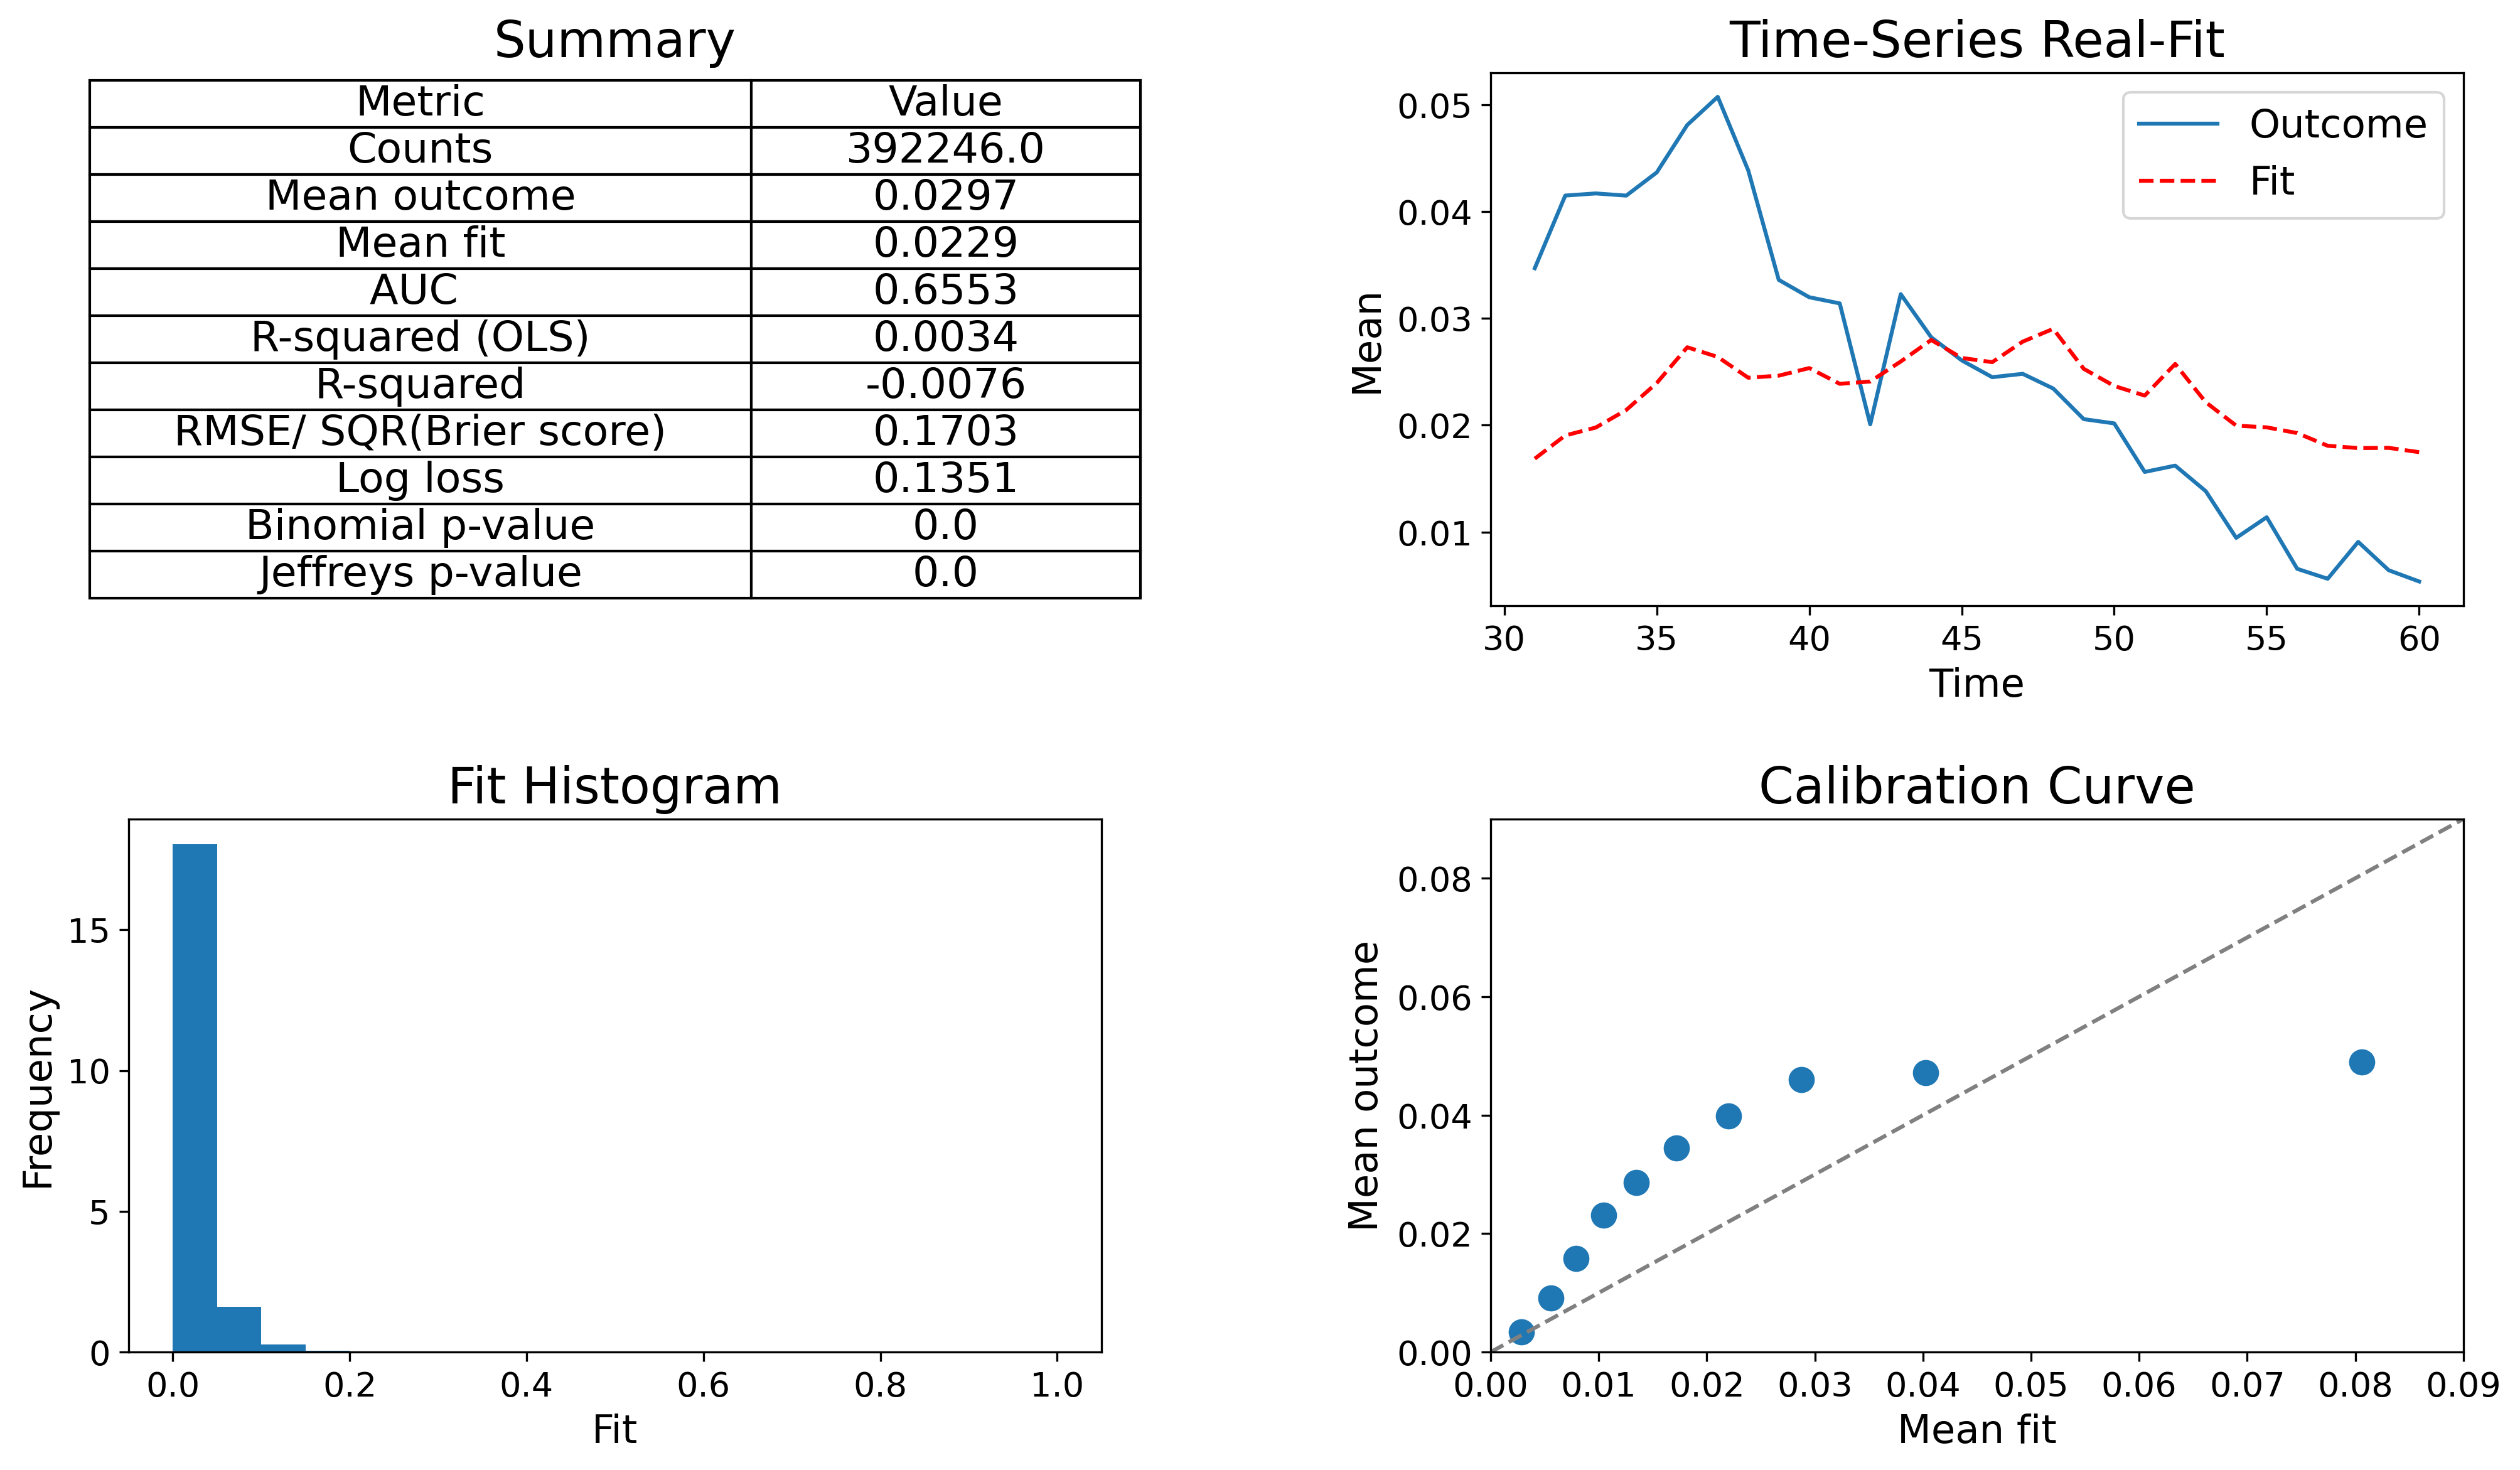

In [44]:
validation(data_test.PD_logistic_model2, data_test.default_time, data_test.time)

In [45]:
PD_logistic_train = pd.DataFrame(data_logistic_train.predict(data_train),columns=['PD_logistic_model_train'])
data_train = pd.merge(data_train,PD_logistic_train,right_index=True,left_index=True)

In [46]:
data_train = data_train.dropna(subset=['PD_logistic_model_train']) 

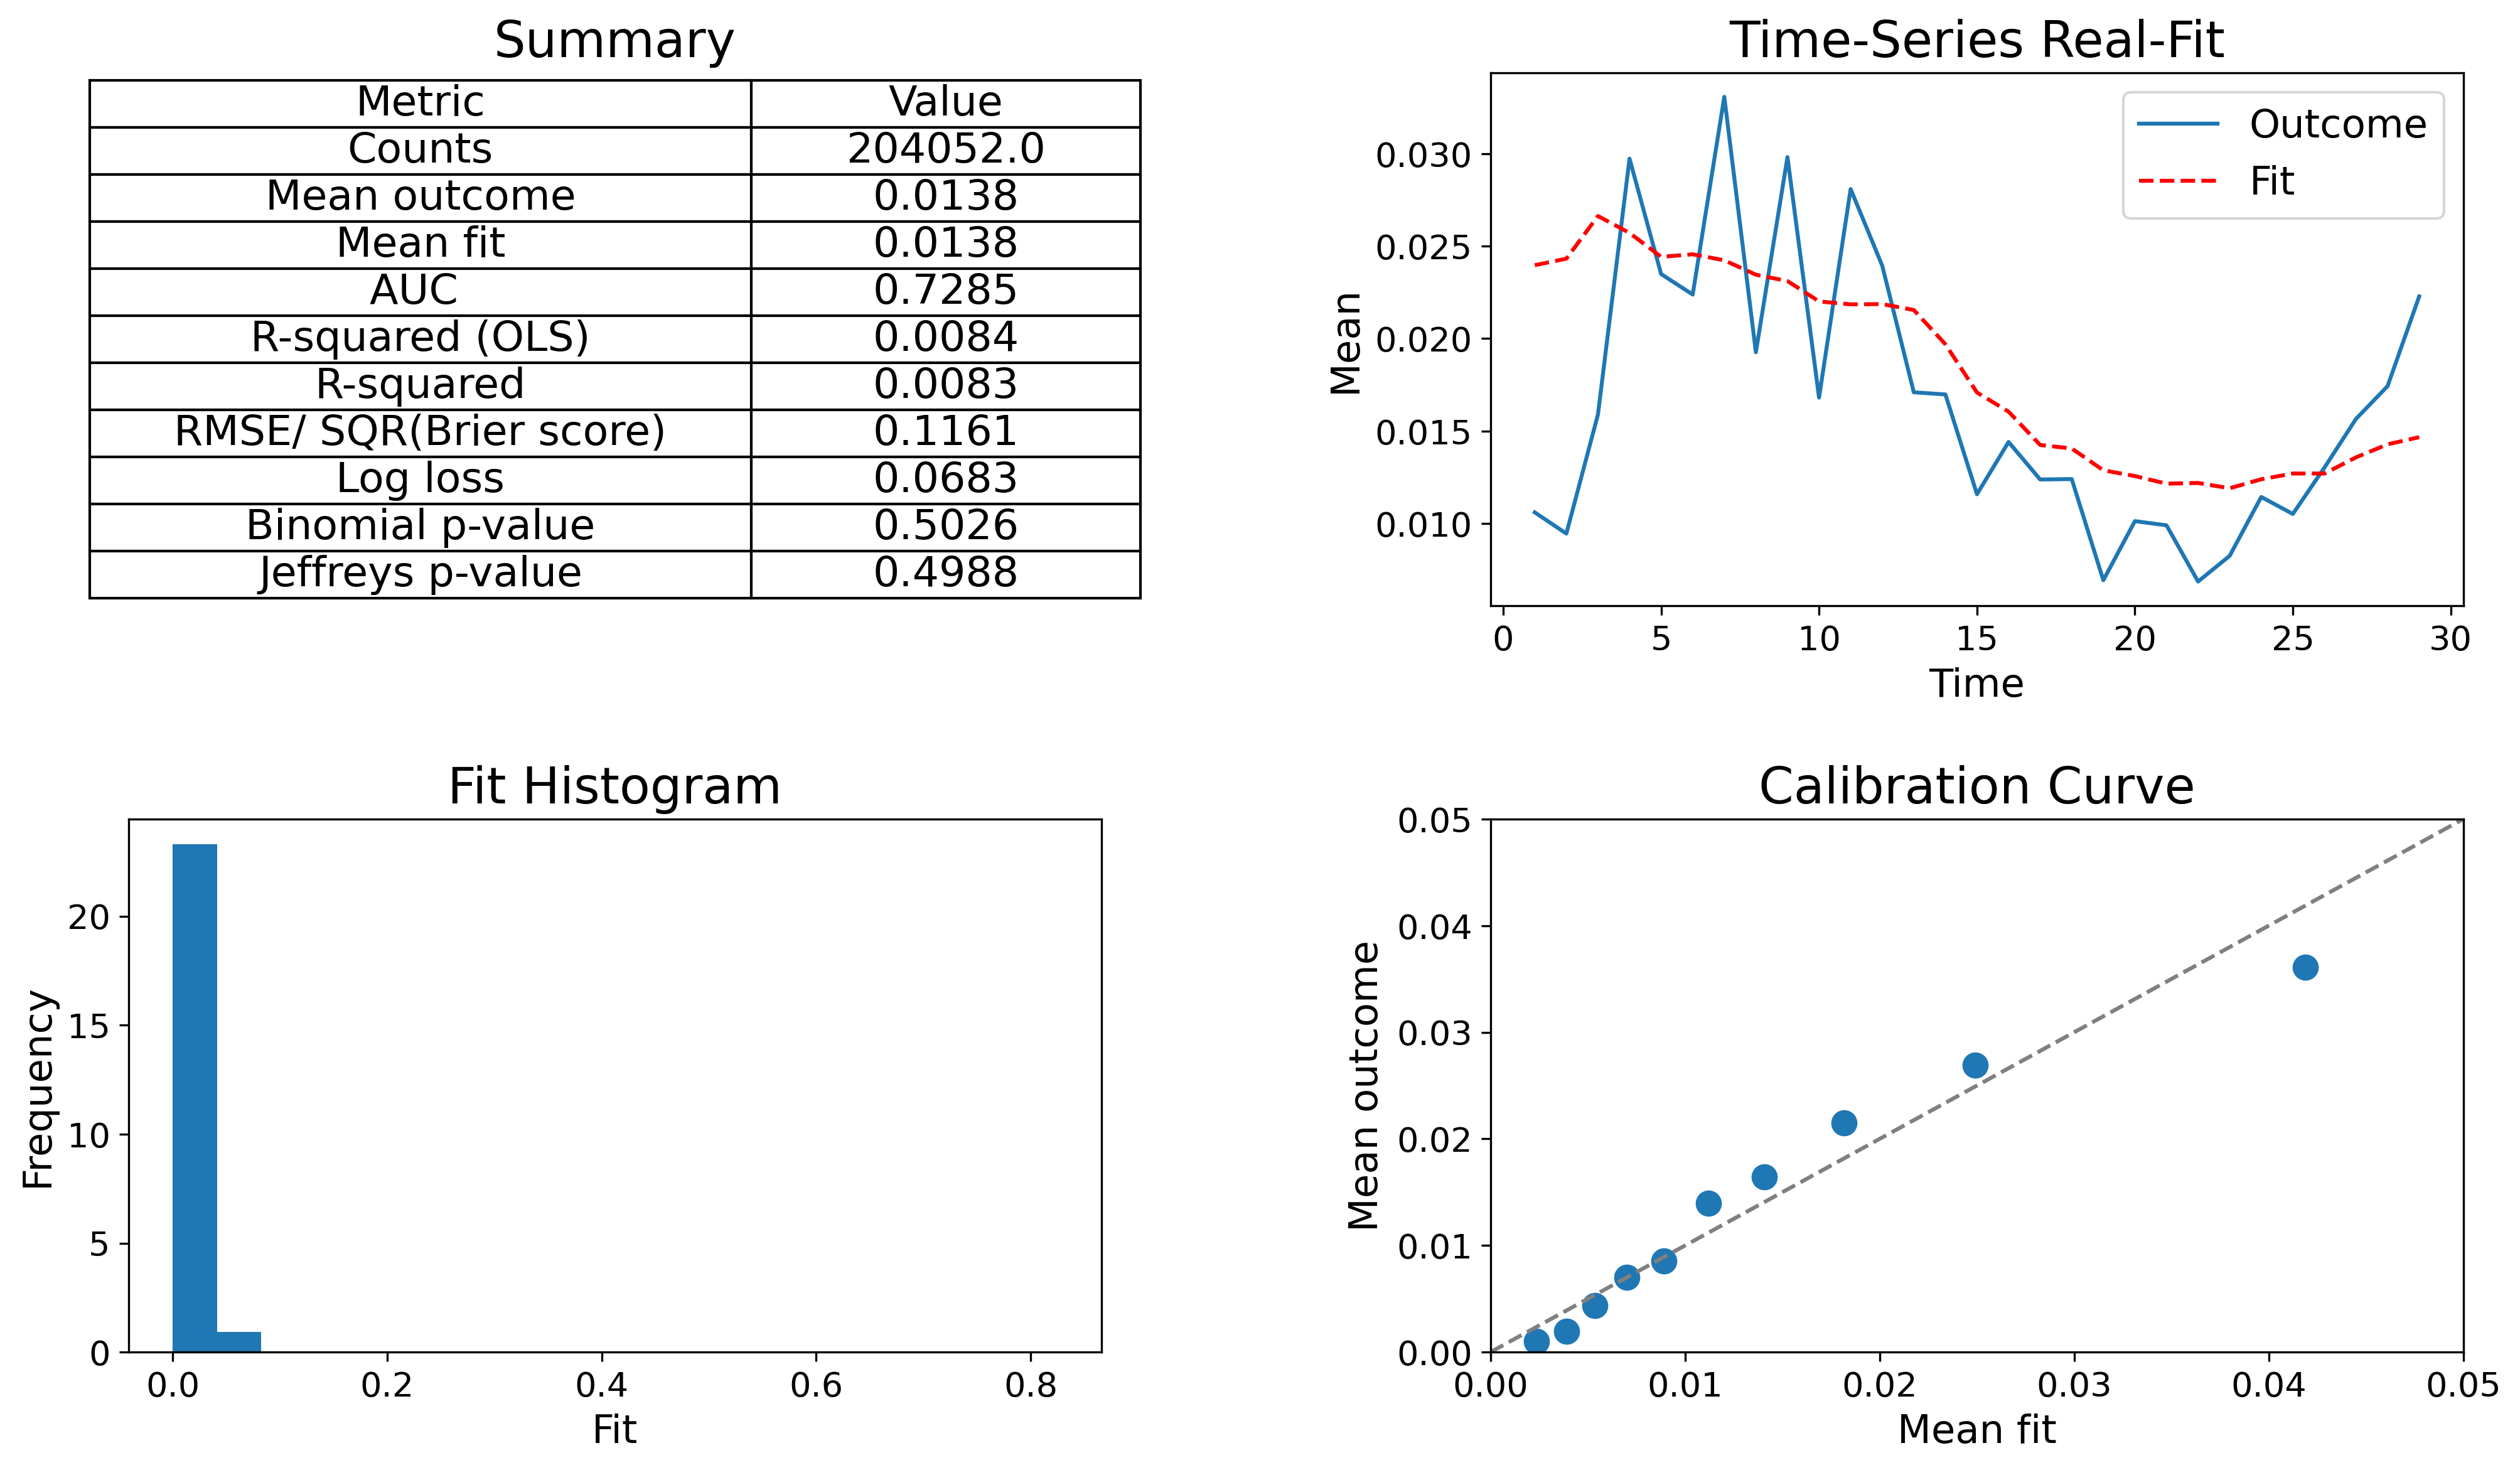

In [47]:
validation(data_train.PD_logistic_model_train,data_train.default_time,data_train.time)

# Test the accuracy of PD model 2B

In [48]:
data2_logistic_train=smf.glm(formula='default_time ~ LTV_time_p1 + LTV_time_p2 +  LTV_time_p3 + FICO_orig_time_p1 + FICO_orig_time_p2 + FICO_orig_time_p3 + cep_time_p1 + cep_time_p2 + cep_time_p3', family=sm.families.Binomial(), data=data_train).fit()
data2_logistic_train.params

Intercept            1.296981e+01
LTV_time_p1         -6.372403e-02
LTV_time_p2          1.237437e-03
LTV_time_p3         -5.801853e-06
FICO_orig_time_p1   -7.554662e-02
FICO_orig_time_p2    1.307036e-04
FICO_orig_time_p3   -8.372456e-08
cep_time_p1         -9.362440e+00
cep_time_p2         -1.583194e+01
cep_time_p3          2.835498e+01
dtype: float64

In [49]:
PD2_logistic = pd.DataFrame(data2_logistic_train.predict(data_test),columns=['PD_logistic_model3'])
data2_test = pd.merge(data_test,PD2_logistic,right_index=True,left_index=True)

In [50]:
data2_test = data2_test.dropna(subset=['PD_logistic_model3'])

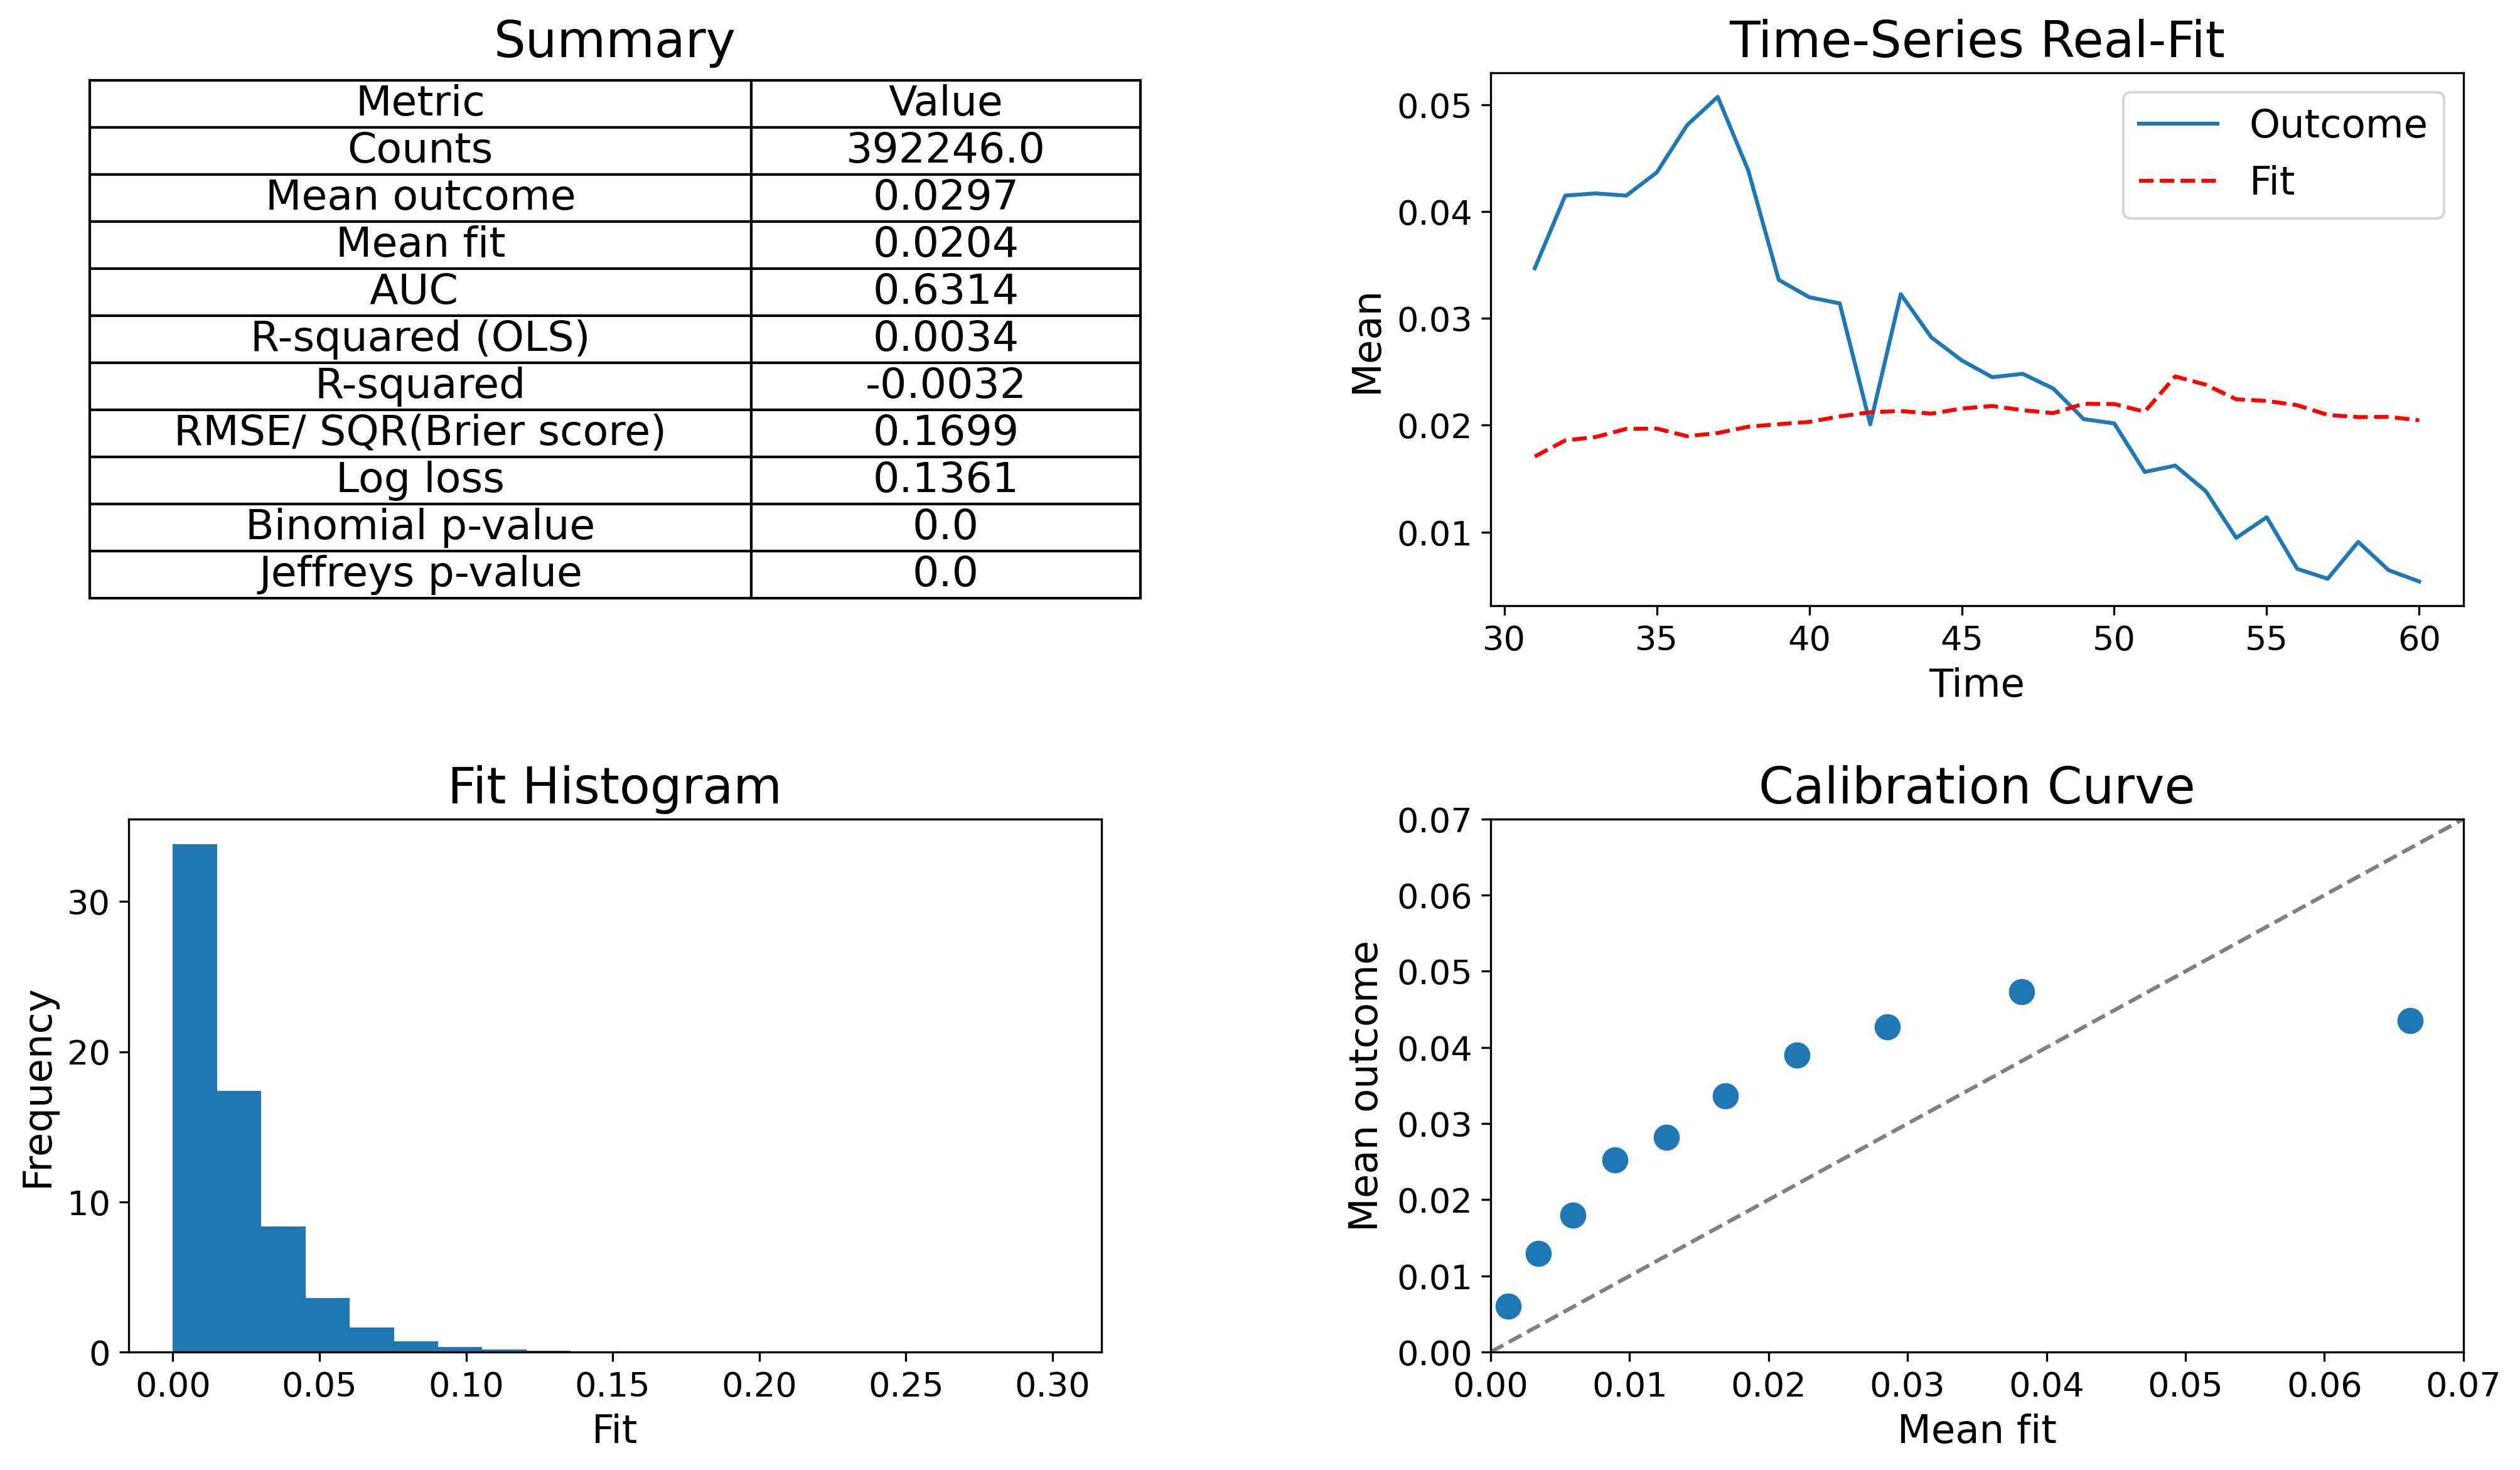

In [51]:
validation(data2_test.PD_logistic_model3, data2_test.default_time, data2_test.time)

In [52]:
PD2_logistic_train = pd.DataFrame(data2_logistic_train.predict(data_train),columns=['PD2_logistic_model_train'])
data2_train = pd.merge(data_train,PD2_logistic_train,right_index=True,left_index=True)

In [53]:
data2_train = data2_train.dropna(subset=['PD2_logistic_model_train']) 

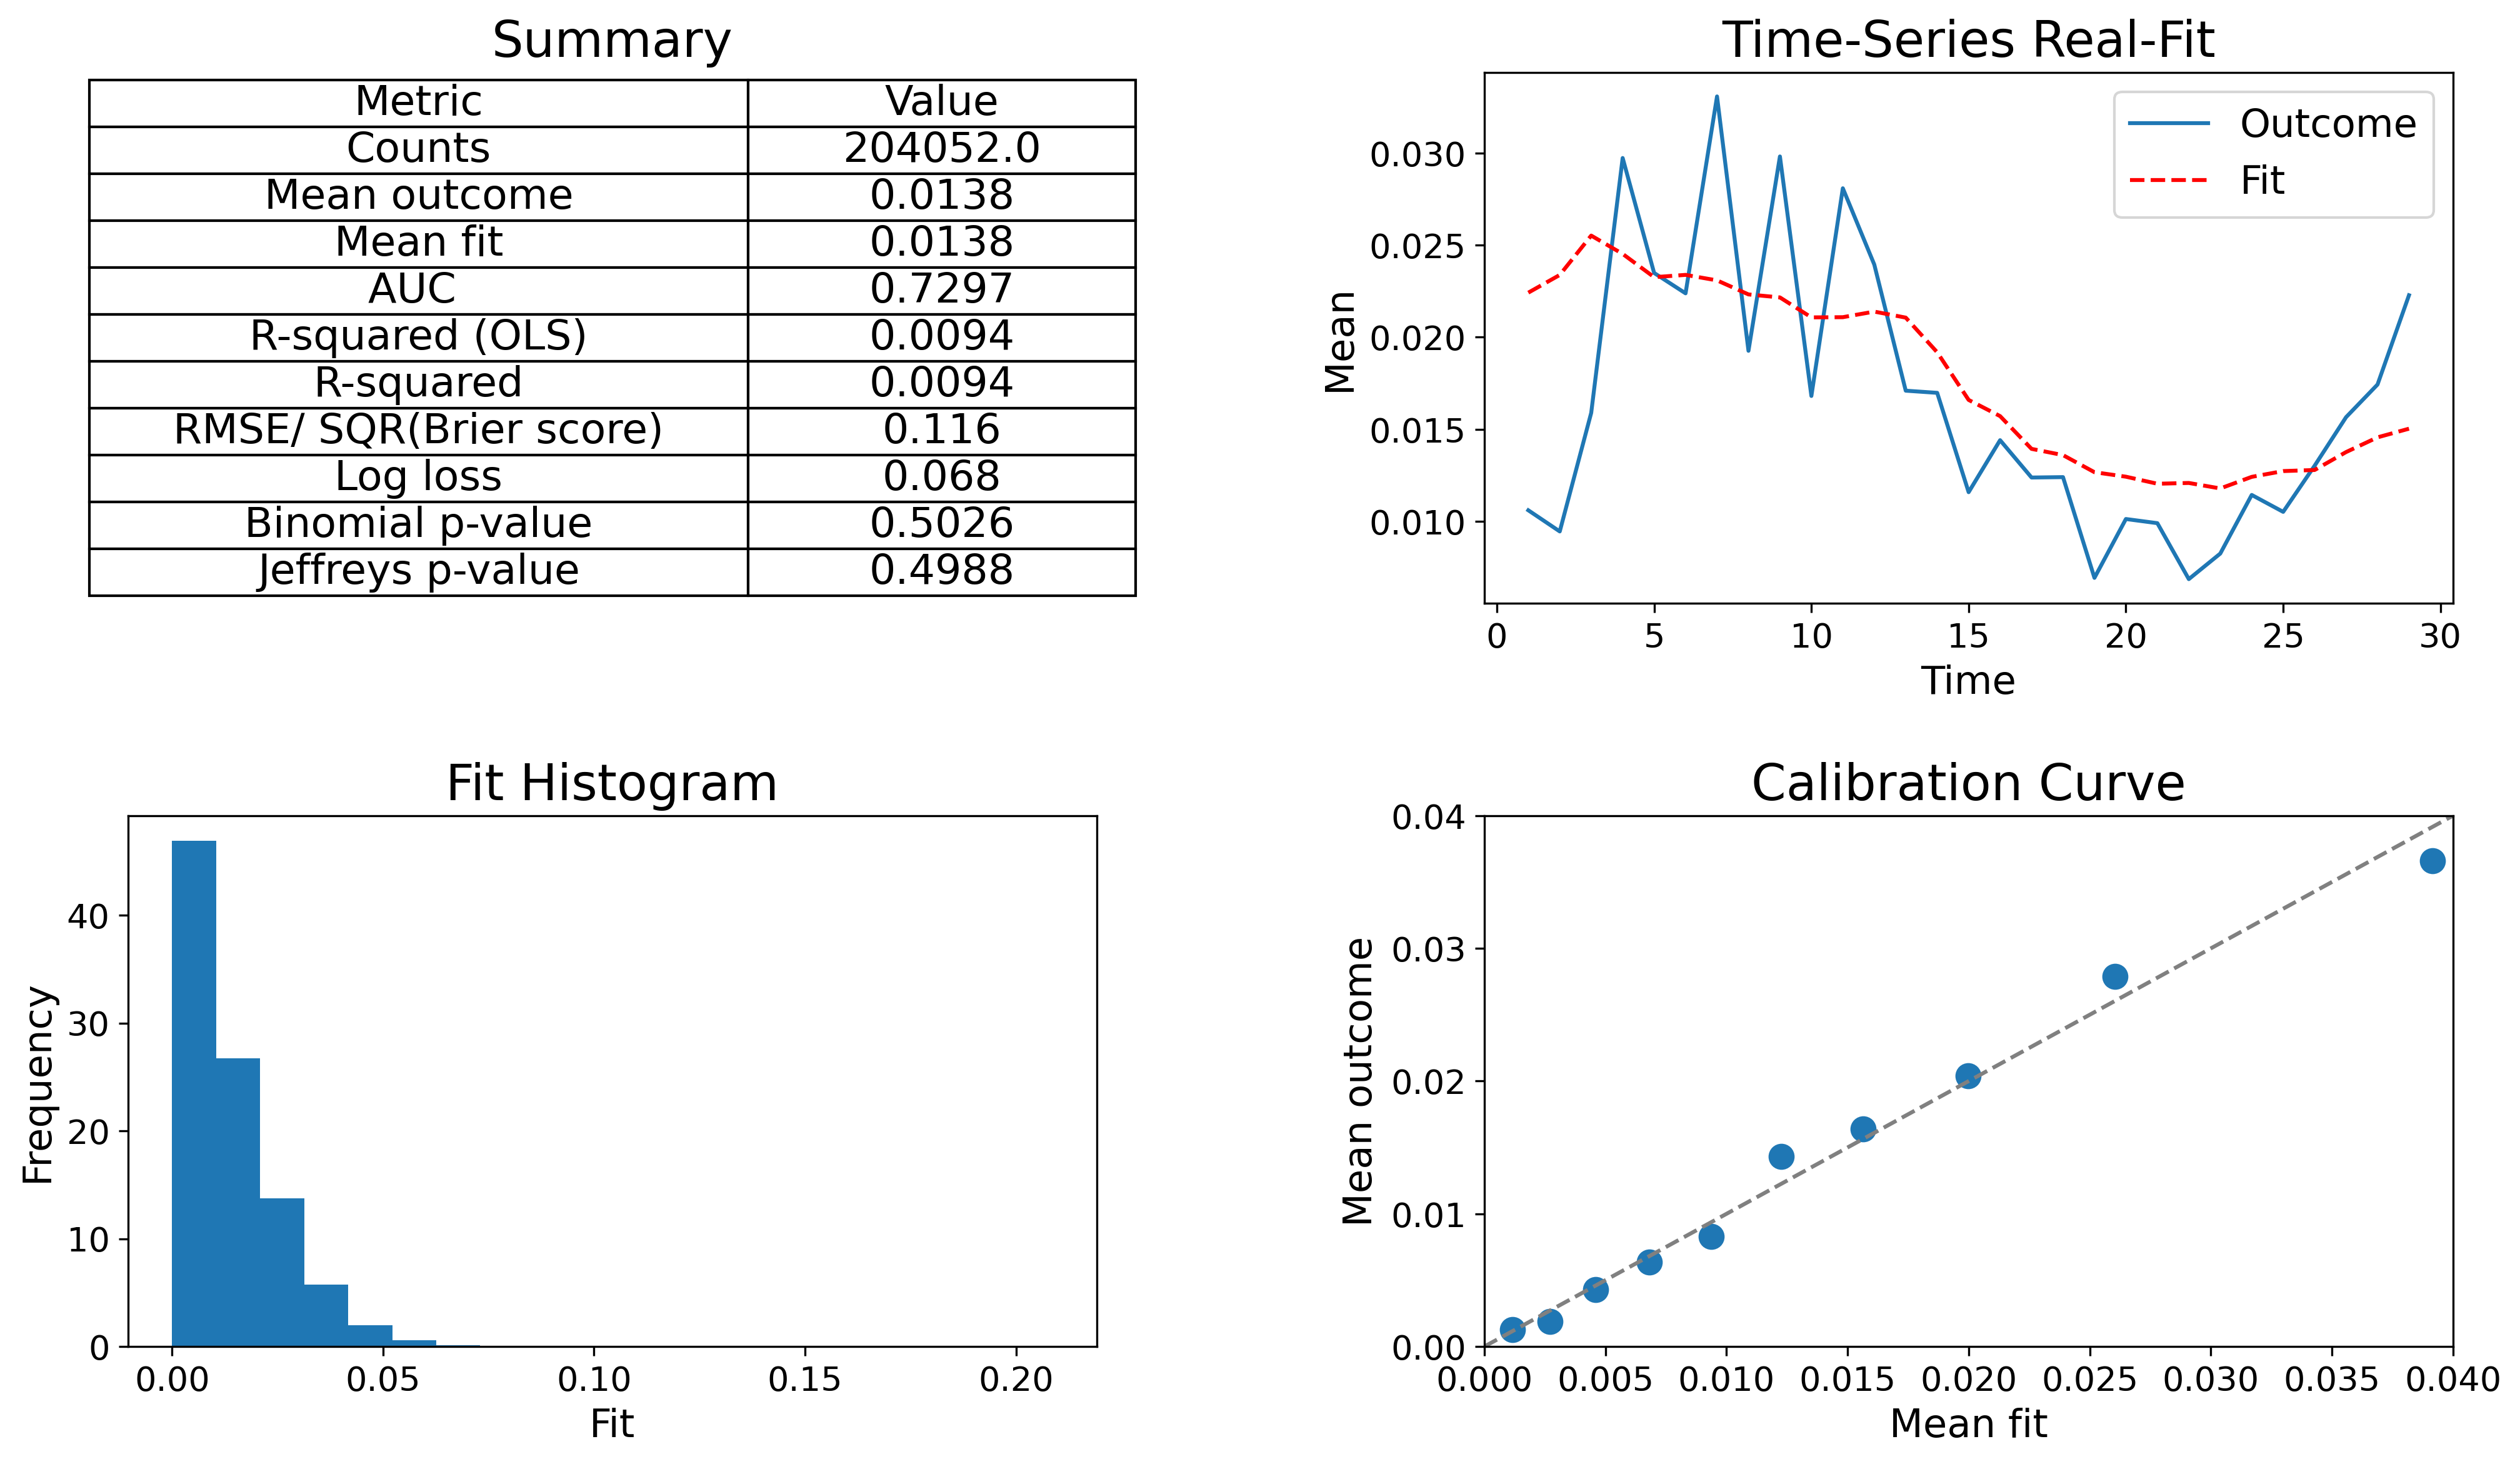

In [54]:
validation(data2_train.PD2_logistic_model_train,data2_train.default_time,data2_train.time)

Creating test and train data for the two models in 2A and 2B is to compare the accuracy of two models. The better accurate prediction model is evaluated based on the fit of the models regarding to adjusted R^2, mean outcome and mean fit. 

From the validation of the 2A model, the fitting sample in the training data is favourable as the data is used to train the data, whereas in the testing data does not fit well for the time below 45 as in the time-series fit, and it is fitted in the large deviation of the PD model.

From the validation of the 2A model, the training data is fitted well, whereas the testing data is fitted favourably from the time above 50 shown in the time-series fit. 

In summary, the 2A training model adjusted R^2 is 0.0084 which means 0.84% of the data fits the regression model, whereas the 2B training model adjusted R^2 is 0.0094 meaning the data is more fitted the regression model compare to the 2A model of 0.94%. In the perfect model, the mean fit and the mean outcome will be matched, however, the testing model of the two models does not fit favourably. 

In conclusion, the model 2B creates higher variables which are nonlinearities to forecast the PD more accuracy in comparison the two models's adjusted R^2. Moreover, there are many variables related to the economic variables which might be good choices to choose for better accuracy prediction model such as GDP of the country or unemployment rate as they are related to the financial ratio of the bank to forecast the probabilities of default for the bank. 

# QUESTION 3

# a)

In [55]:
data_default = data.loc[data['default_time']==1,:].copy()
data_default.shape
data_default.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15158 entries, 23 to 622250
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       15158 non-null  int64  
 1   time                     15158 non-null  int64  
 2   orig_time                15158 non-null  int64  
 3   first_time               15158 non-null  int64  
 4   mat_time                 15158 non-null  int64  
 5   res_time                 11434 non-null  float64
 6   balance_time             15158 non-null  float64
 7   LTV_time                 15153 non-null  float64
 8   interest_rate_time       15158 non-null  float64
 9   rate_time                15158 non-null  float64
 10  hpi_time                 15158 non-null  float64
 11  gdp_time                 15158 non-null  float64
 12  uer_time                 15158 non-null  float64
 13  REtype_CO_orig_time      15158 non-null  int64  
 14  REtype_PU_orig_time 

In [56]:
data_default.loc[:,'res_period']=data_default.loc[:,'res_time']-data_default.loc[:,'time']
data_default[['res_period']].describe()

res_period
count  11434.000000
mean       6.467990
std        5.177568
min        0.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       44.000000

array([[<AxesSubplot:title={'center':'res_period'}>]], dtype=object)

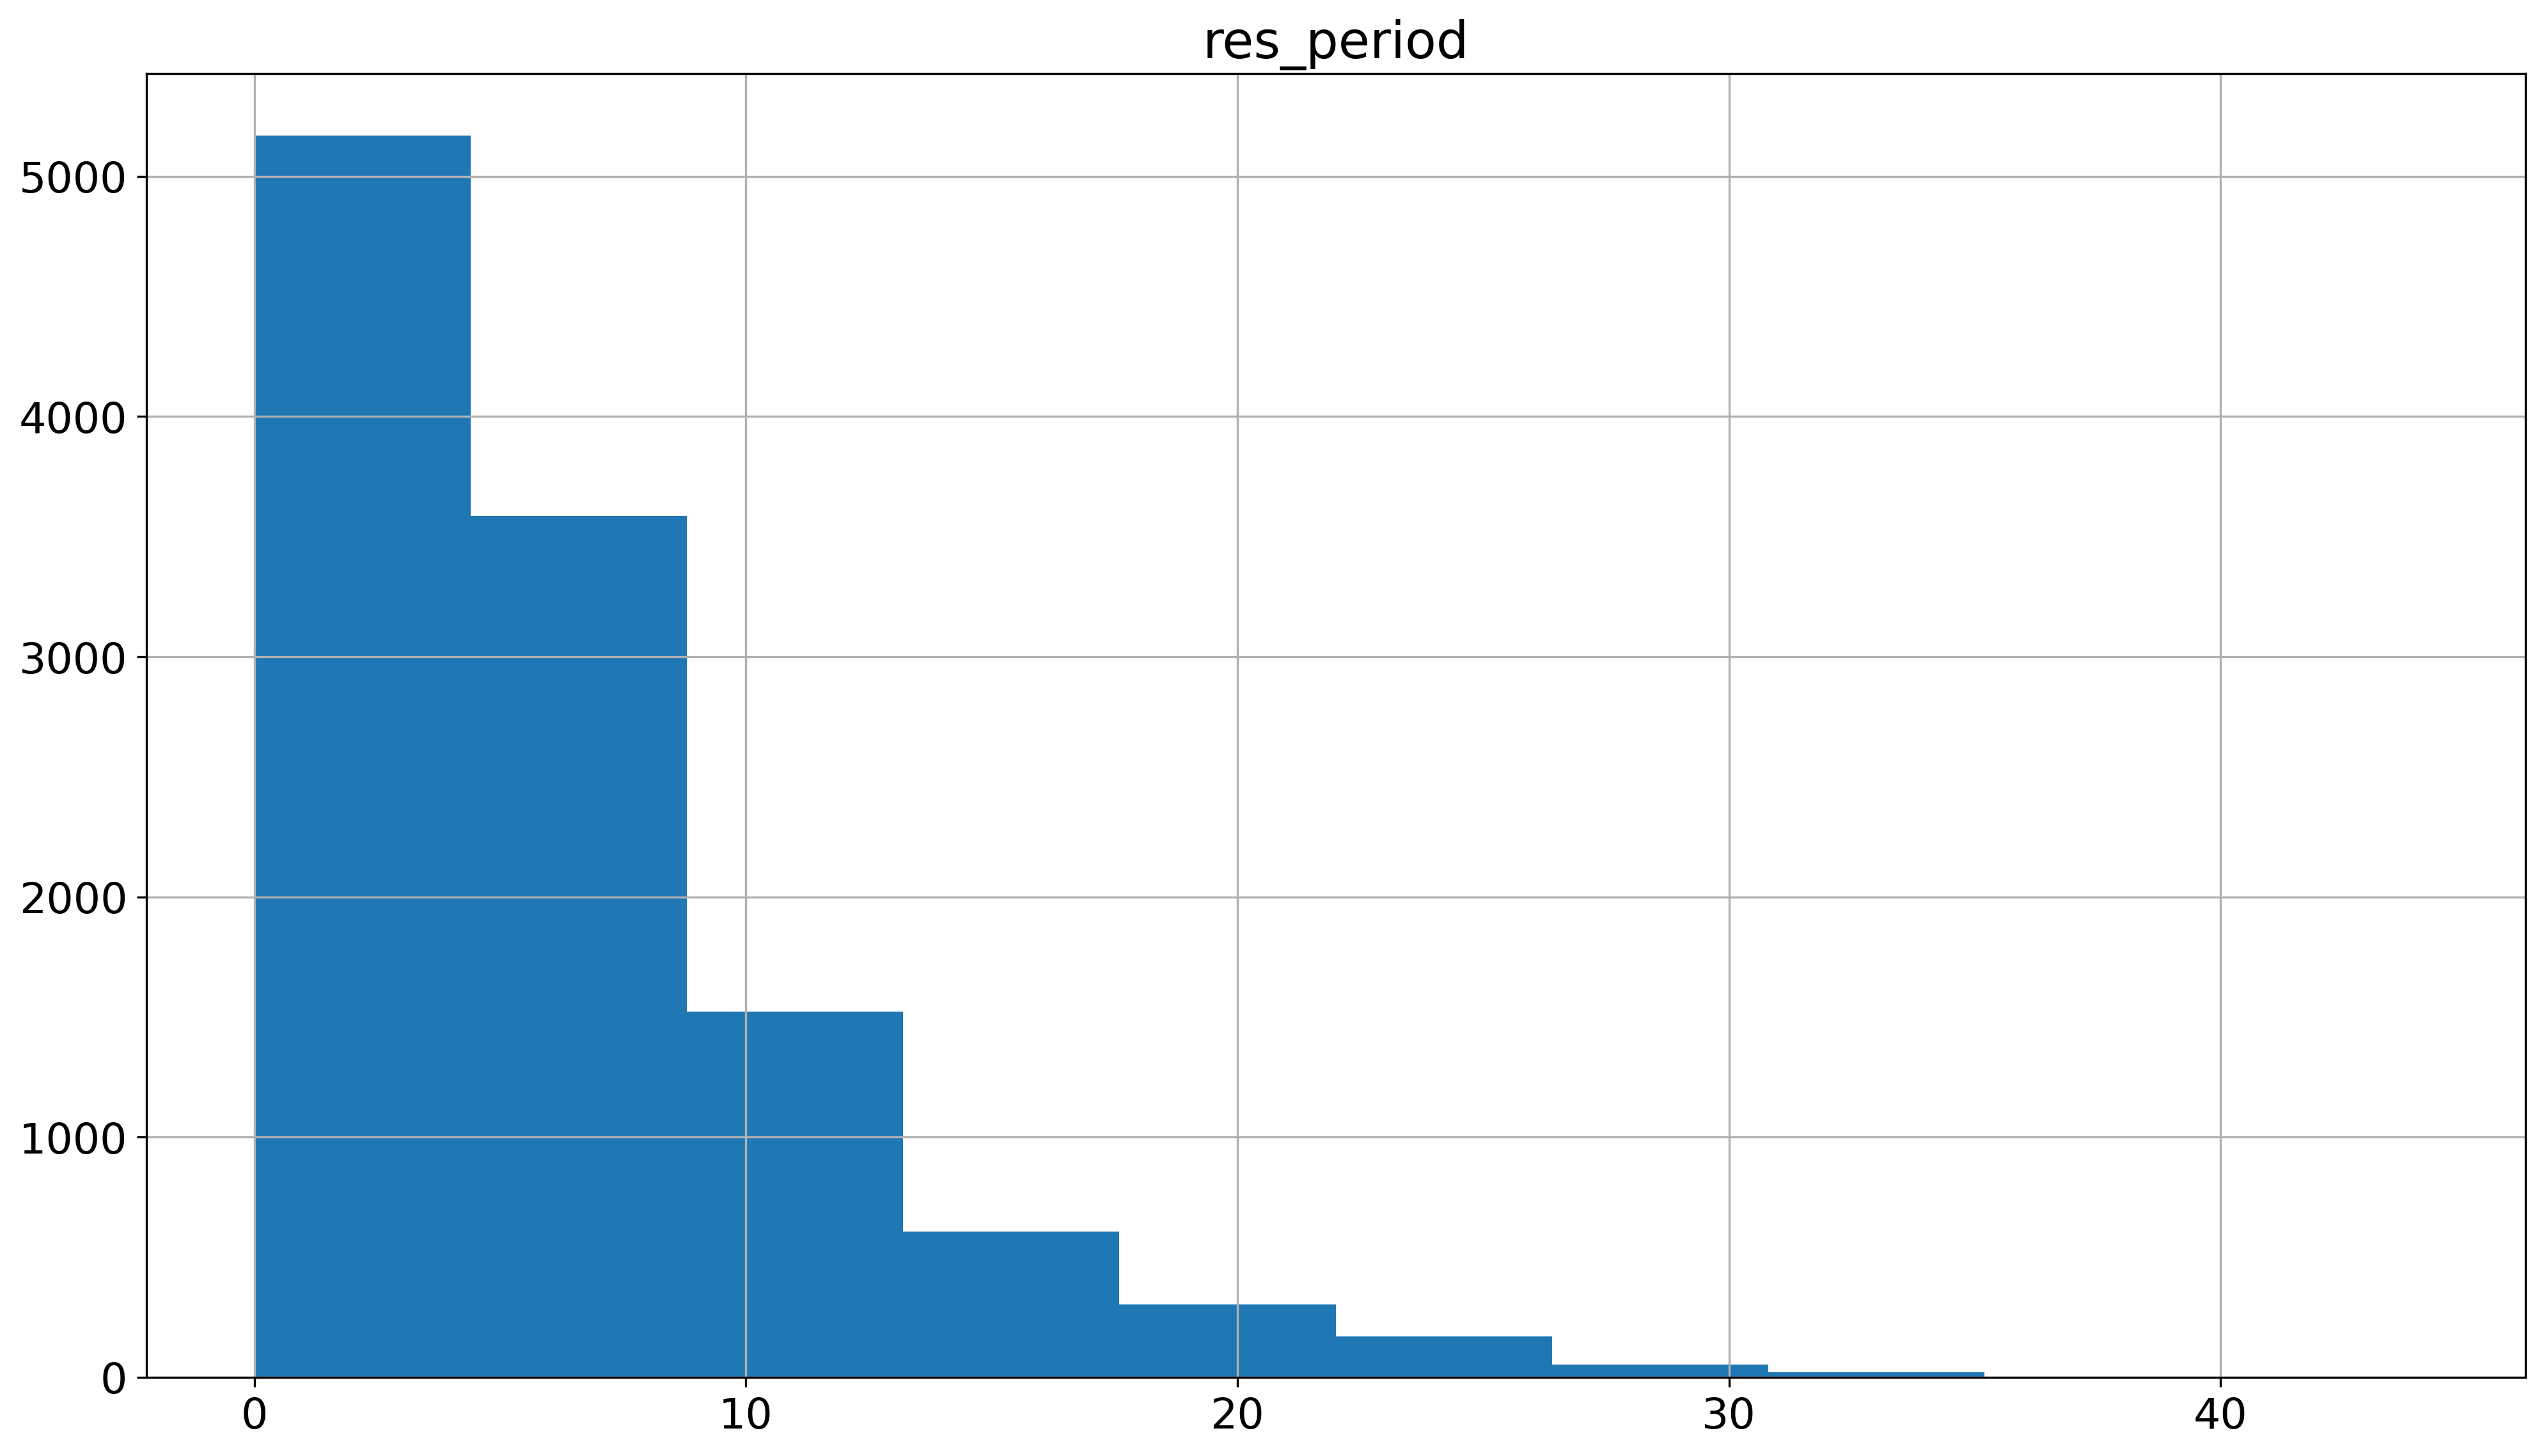

In [59]:
data_default[['res_period']].hist()

In [60]:
data_default.loc[:,'LGD']=(data_default.loc[:,'balance_time'] - data_default.loc[:,'recovery_res']/  (1+data_default.loc[:,'rate_time']/(100*4))**data_default.loc[:,'res_period'])/data_default.loc[:,'balance_time']  
data_default[['LGD']].describe()

LGD
count  11434.000000
mean       0.622843
std        0.336444
min       -0.364121
25%        0.405012
50%        0.643171
75%        0.850334
max        2.932292

array([[<AxesSubplot:title={'center':'LGD'}>]], dtype=object)

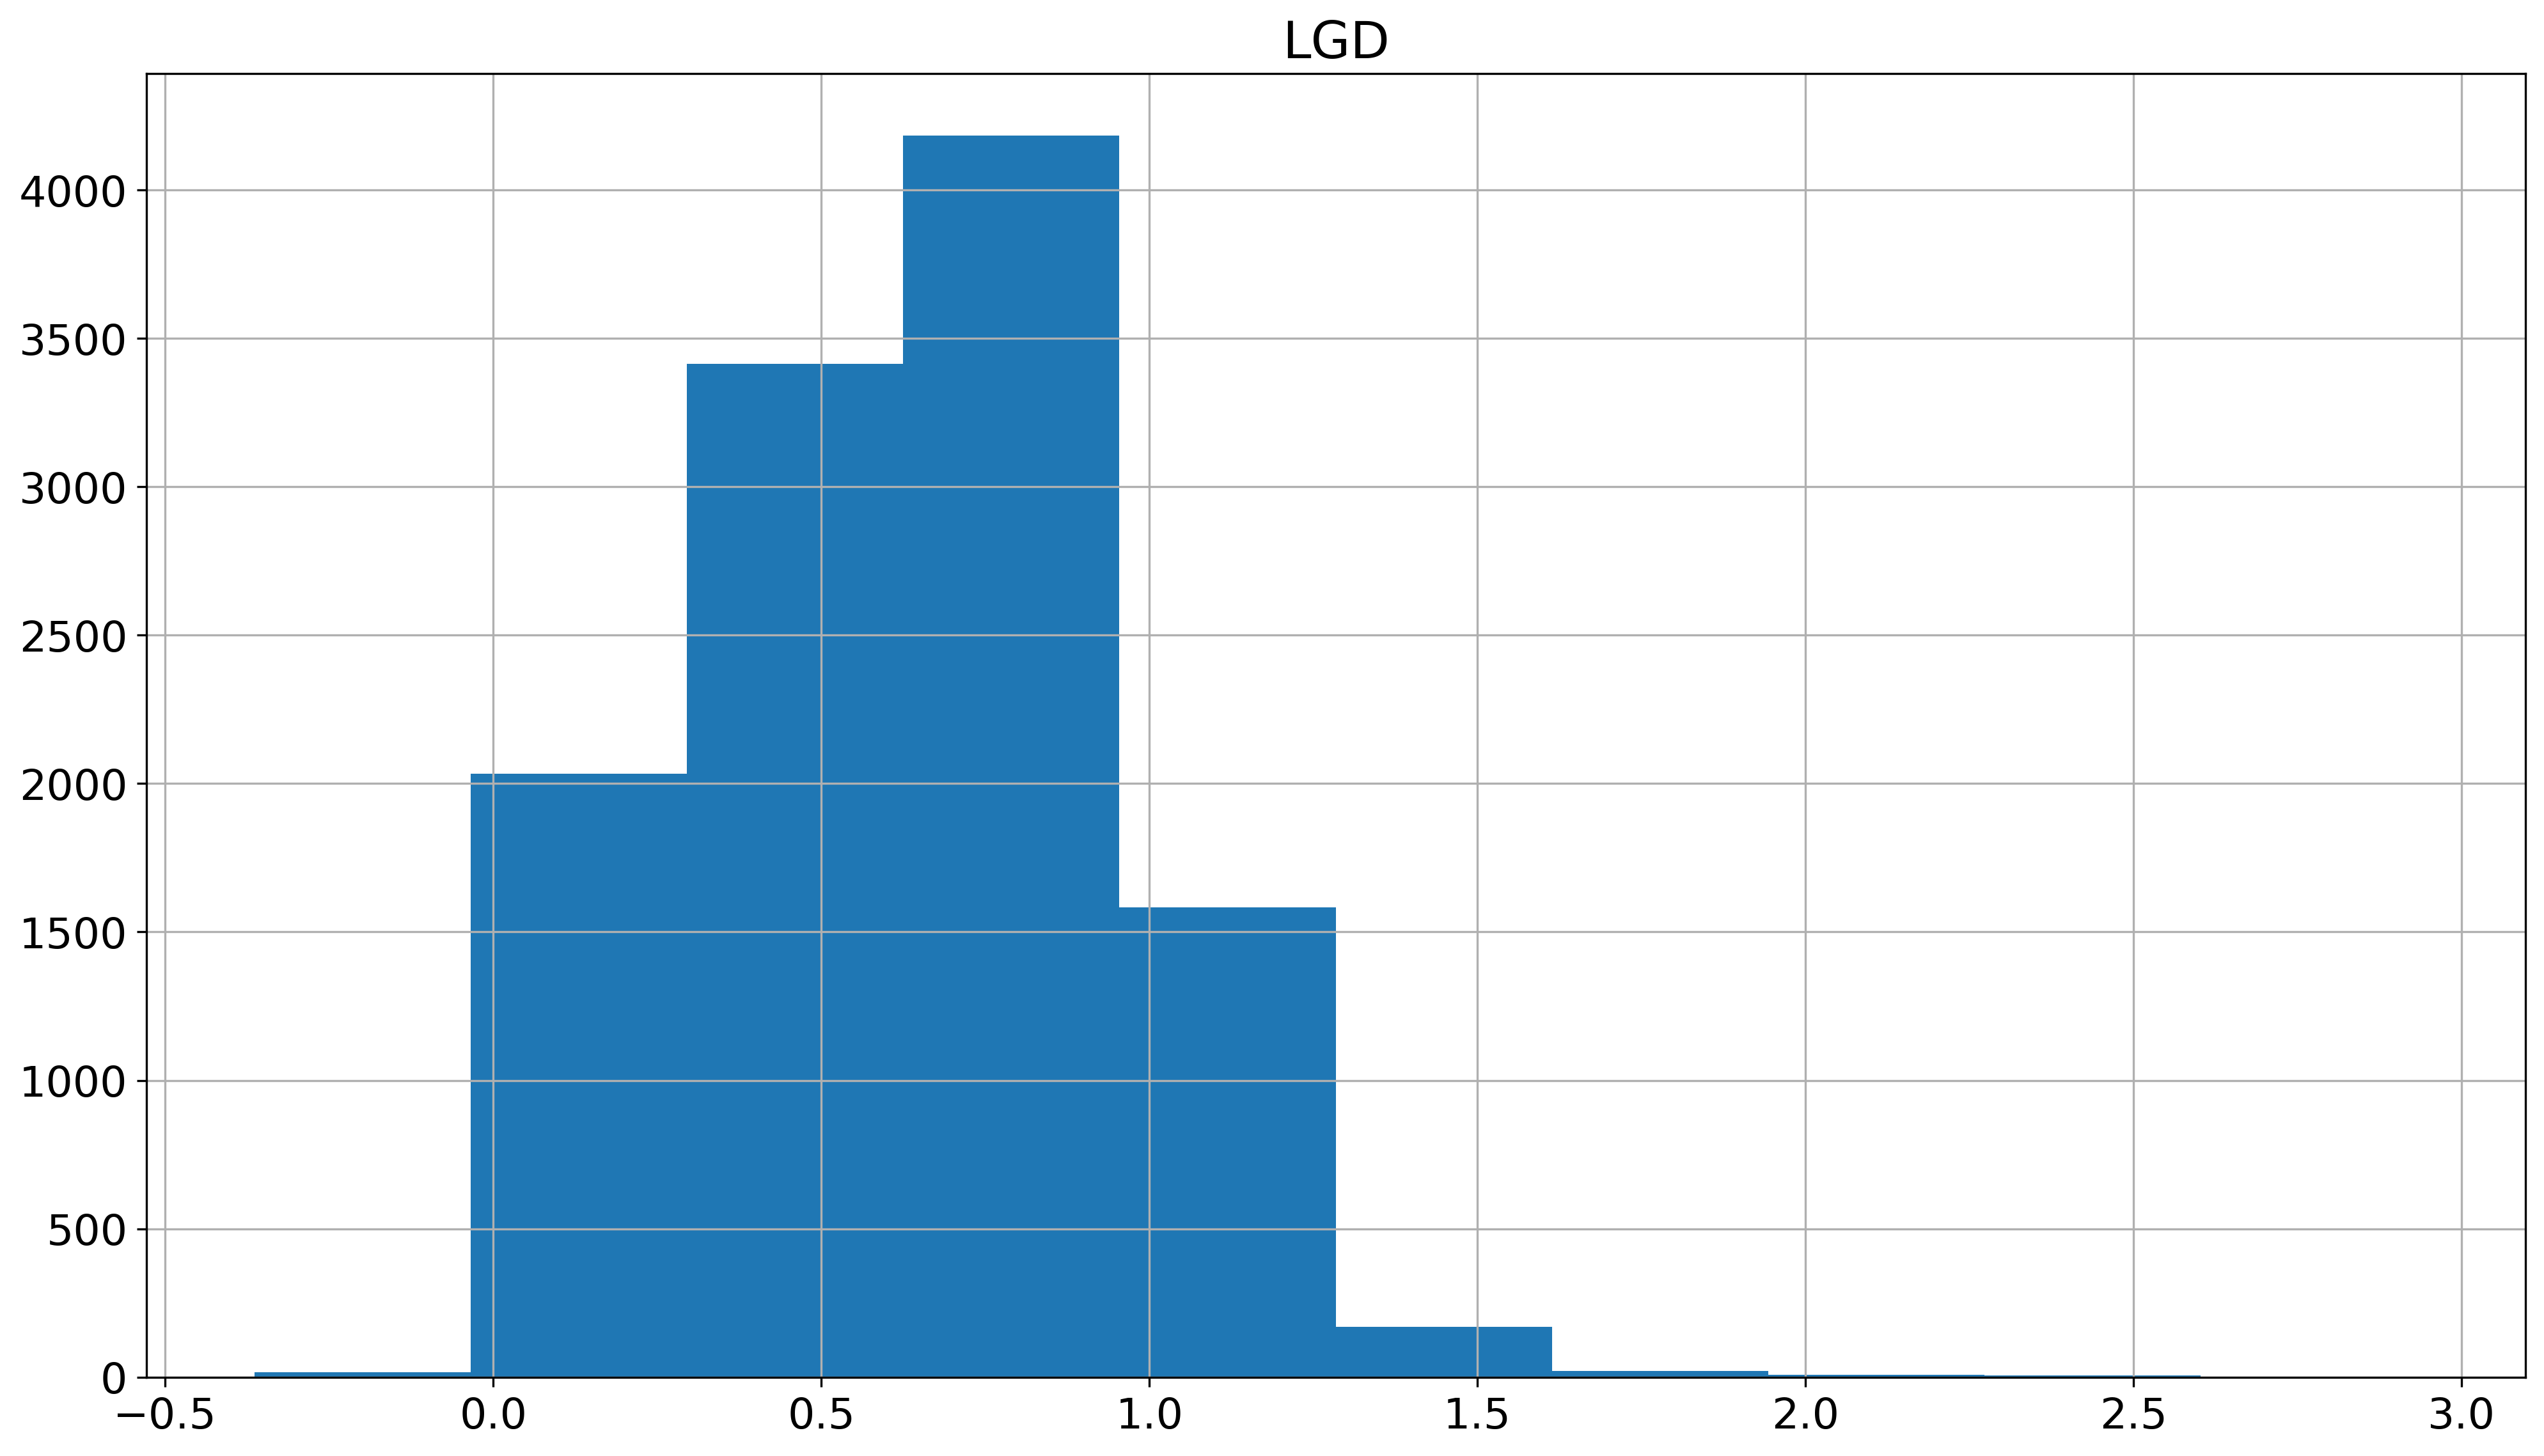

In [61]:
data_default[['LGD']].hist()

In [62]:
data_default[['LGD','res_period']].corr()

LGD  res_period
LGD         1.000000    0.366416
res_period  0.366416    1.000000

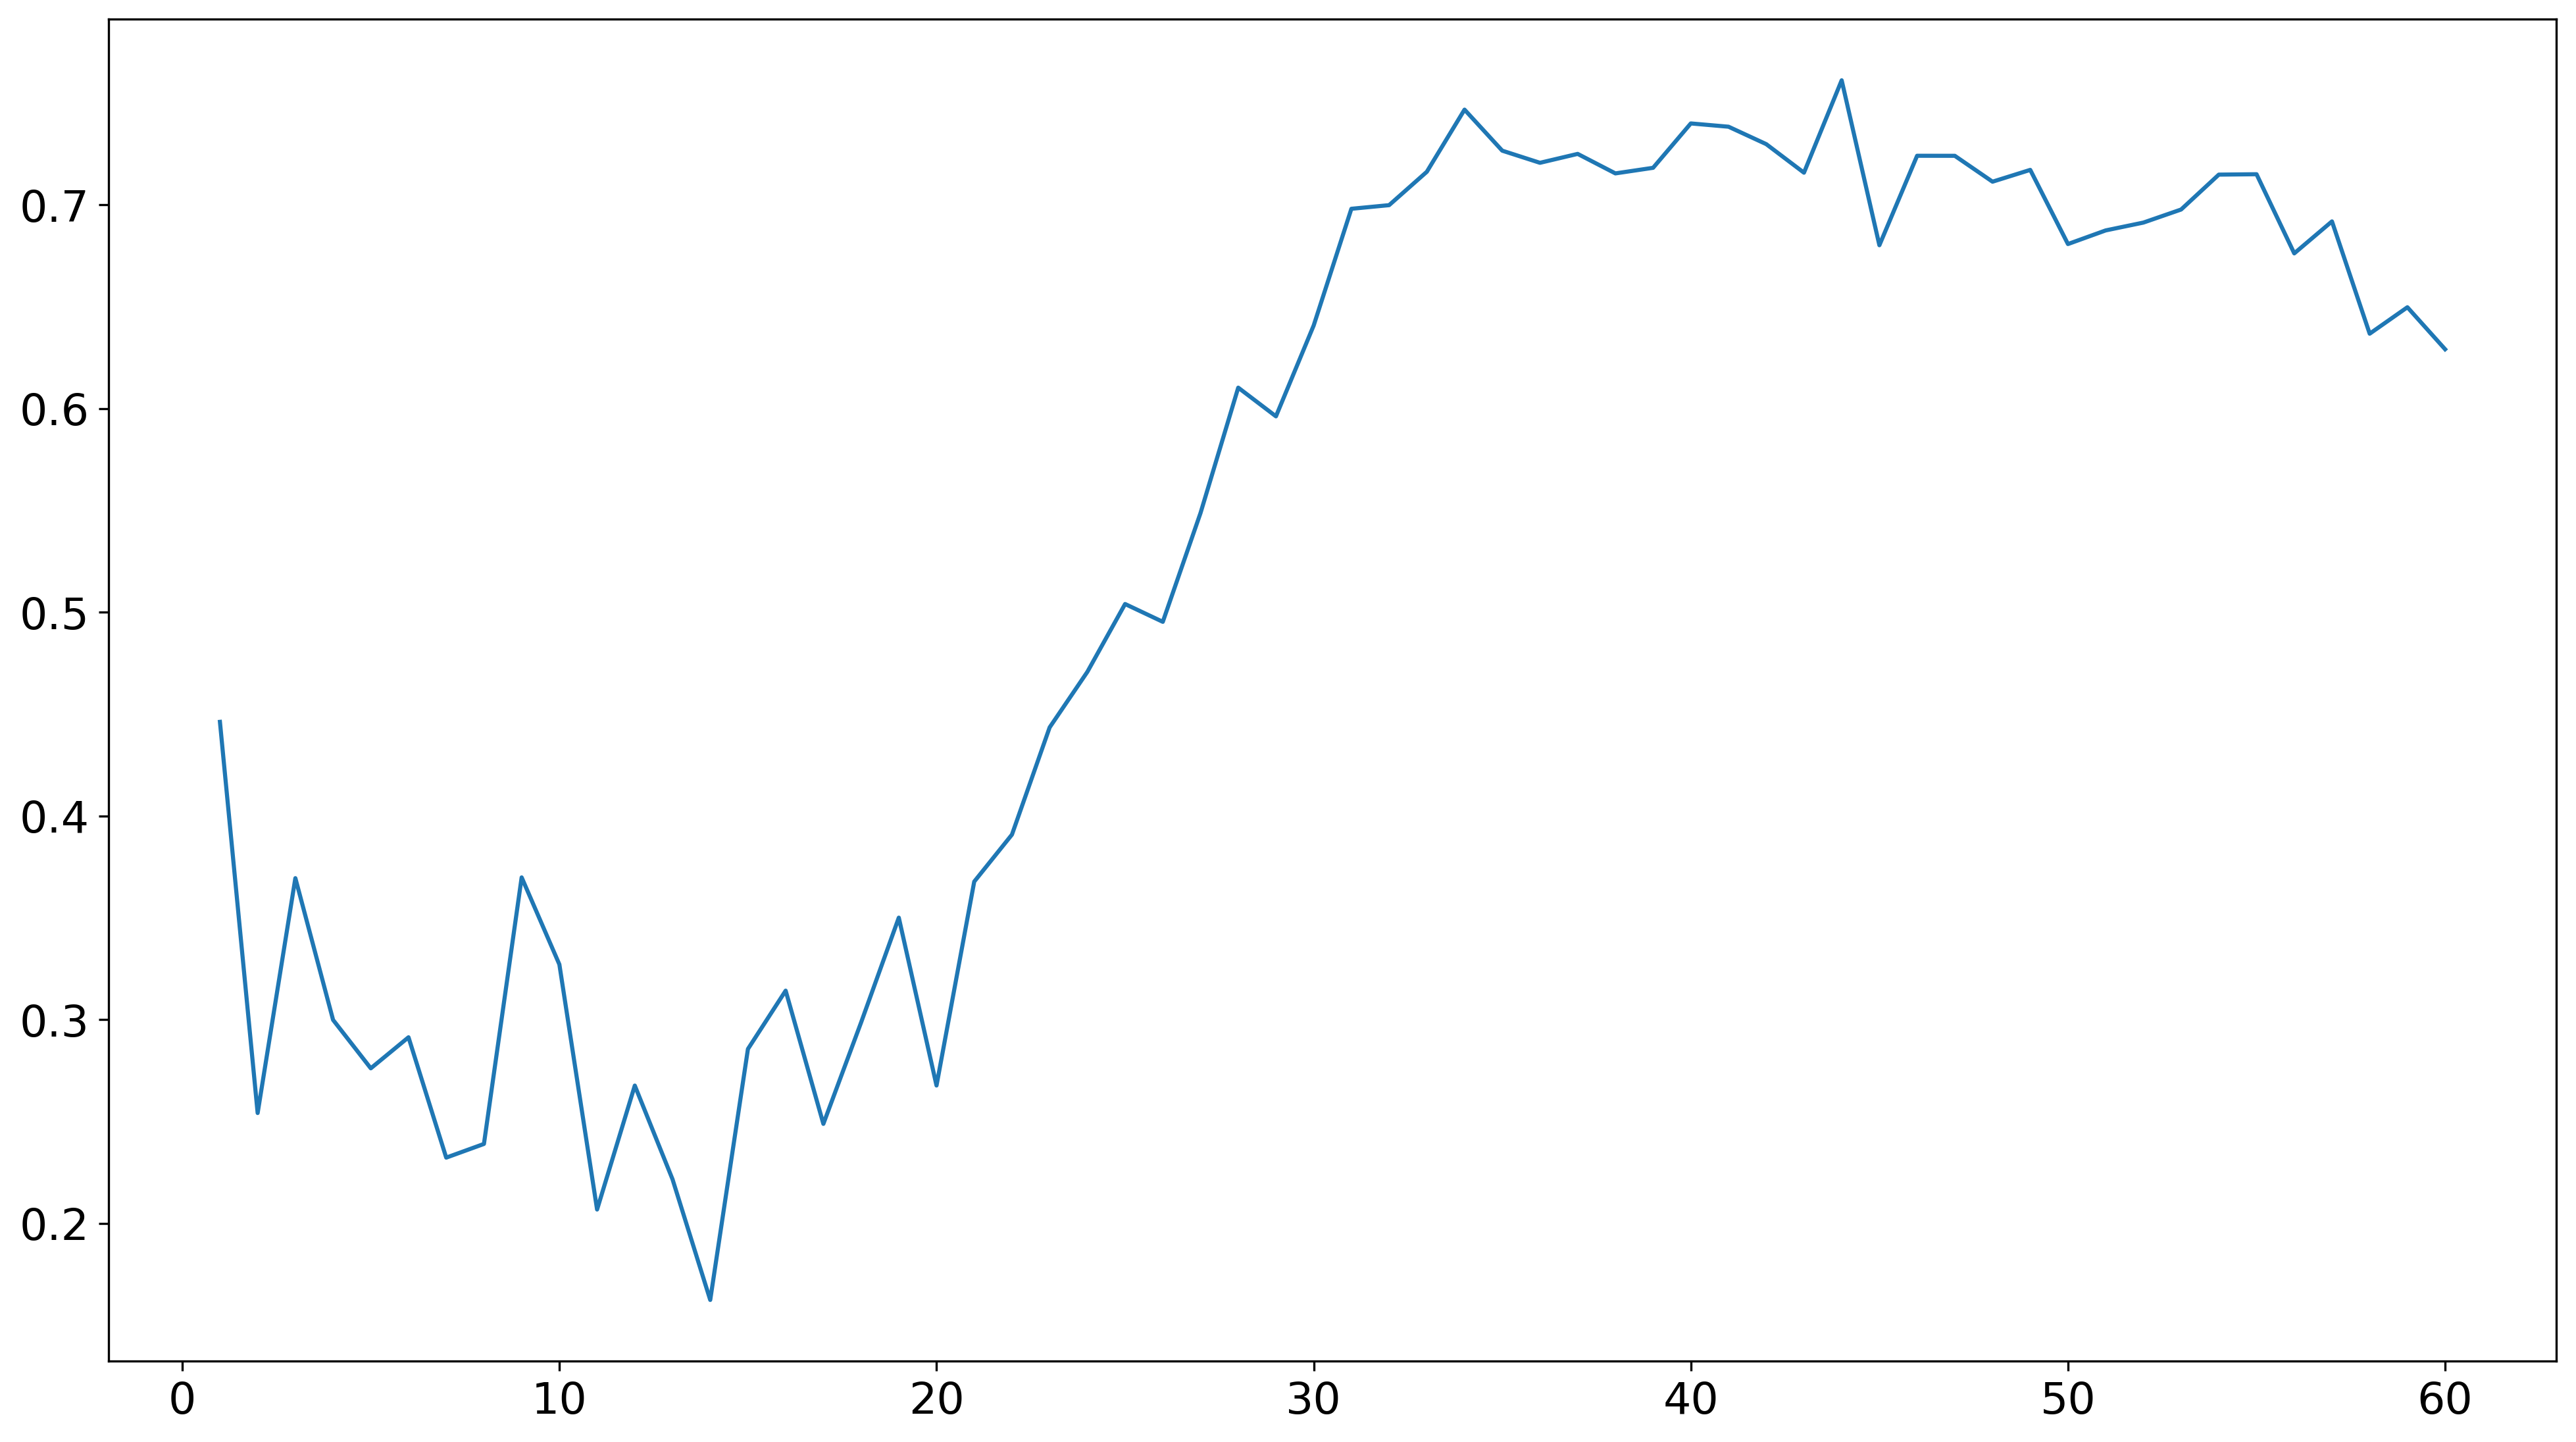

In [63]:
data_default = resolutionbias(data_default, 'LGD', 'res_time', 'time')
LGD_mean=data_default.groupby('time')[['LGD']].mean().reset_index(drop=False)

plt.plot('time','LGD', data=LGD_mean)
plt.show()

In [64]:
data_default2 = data_default[['LGD', 'cep_time','LTV_time', 'FICO_orig_time','time']].dropna()
LGD_model_ols=smf.ols(formula='LGD ~ LTV_time + FICO_orig_time + cep_time', data=data_default2).fit()
LGD_model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    LGD   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     403.3
Date:                Mon, 25 Oct 2021   Prob (F-statistic):          4.72e-252
Time:                        02:47:08   Log-Likelihood:                -2899.0
No. Observations:               15153   AIC:                             5806.
Df Residuals:                   15149   BIC:                             5836.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.5219      0.024     21.711      0.000       0.475       0.569
LTV_time           0.0042      0.000     34.567      0.000       0.004       0.004
FICO_orig_time    -0.0004   3.69e-05    -10.225      0.000      -0.000      -0.000
cep_time           0.5091      0.058      8.784      0.000       0.396       0.623
==============================================================================
Omnibus:                      407.837   Durbin-Watson:                   1.656
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1024.939
Skew:                           0.010   Prob(JB):                    2.74e-223
Kurtosis:                       4.274   Cond. No.                     1.61e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
fittedvalues= pd.DataFrame(LGD_model_ols.fittedvalues, columns=['LGD_linearmodel'])
data_default3=pd.merge(data_default2,fittedvalues,right_index=True,left_index=True)
data_default3

LGD  cep_time    LTV_time  FICO_orig_time  time  LGD_linearmodel
0       0.834064 -0.048461   99.138105             501    37         0.721562
1       0.834064 -0.013756  101.403077             536    37         0.735465
2       0.834064  0.001033   95.242783             503    37         0.729760
3       0.834064 -0.000662  115.682577             567    37         0.789982
4       0.834064 -0.024072  117.399645             654    37         0.752382
...          ...       ...         ...             ...   ...              ...
619326  0.442772  0.016273   90.679429             757    53         0.622604
620807  0.568818 -0.211140  121.888972             683    52         0.664916
621092  0.513494 -0.064848  105.860370             672    55         0.676703
621655  0.324559 -0.008475   83.879828             569    52         0.652616
622011  0.262263 -0.161471  114.559047             676    53         0.662277

[15341 rows x 6 columns]

In [77]:
print(data_default3[['LGD','LGD_linearmodel']].describe().round(3))

             LGD  LGD_linearmodel
count  15341.000        15341.000
mean       0.671            0.670
std        0.304            0.083
min       -0.364            0.263
25%        0.497            0.617
50%        0.758            0.676
75%        0.834            0.726
max        2.932            0.913


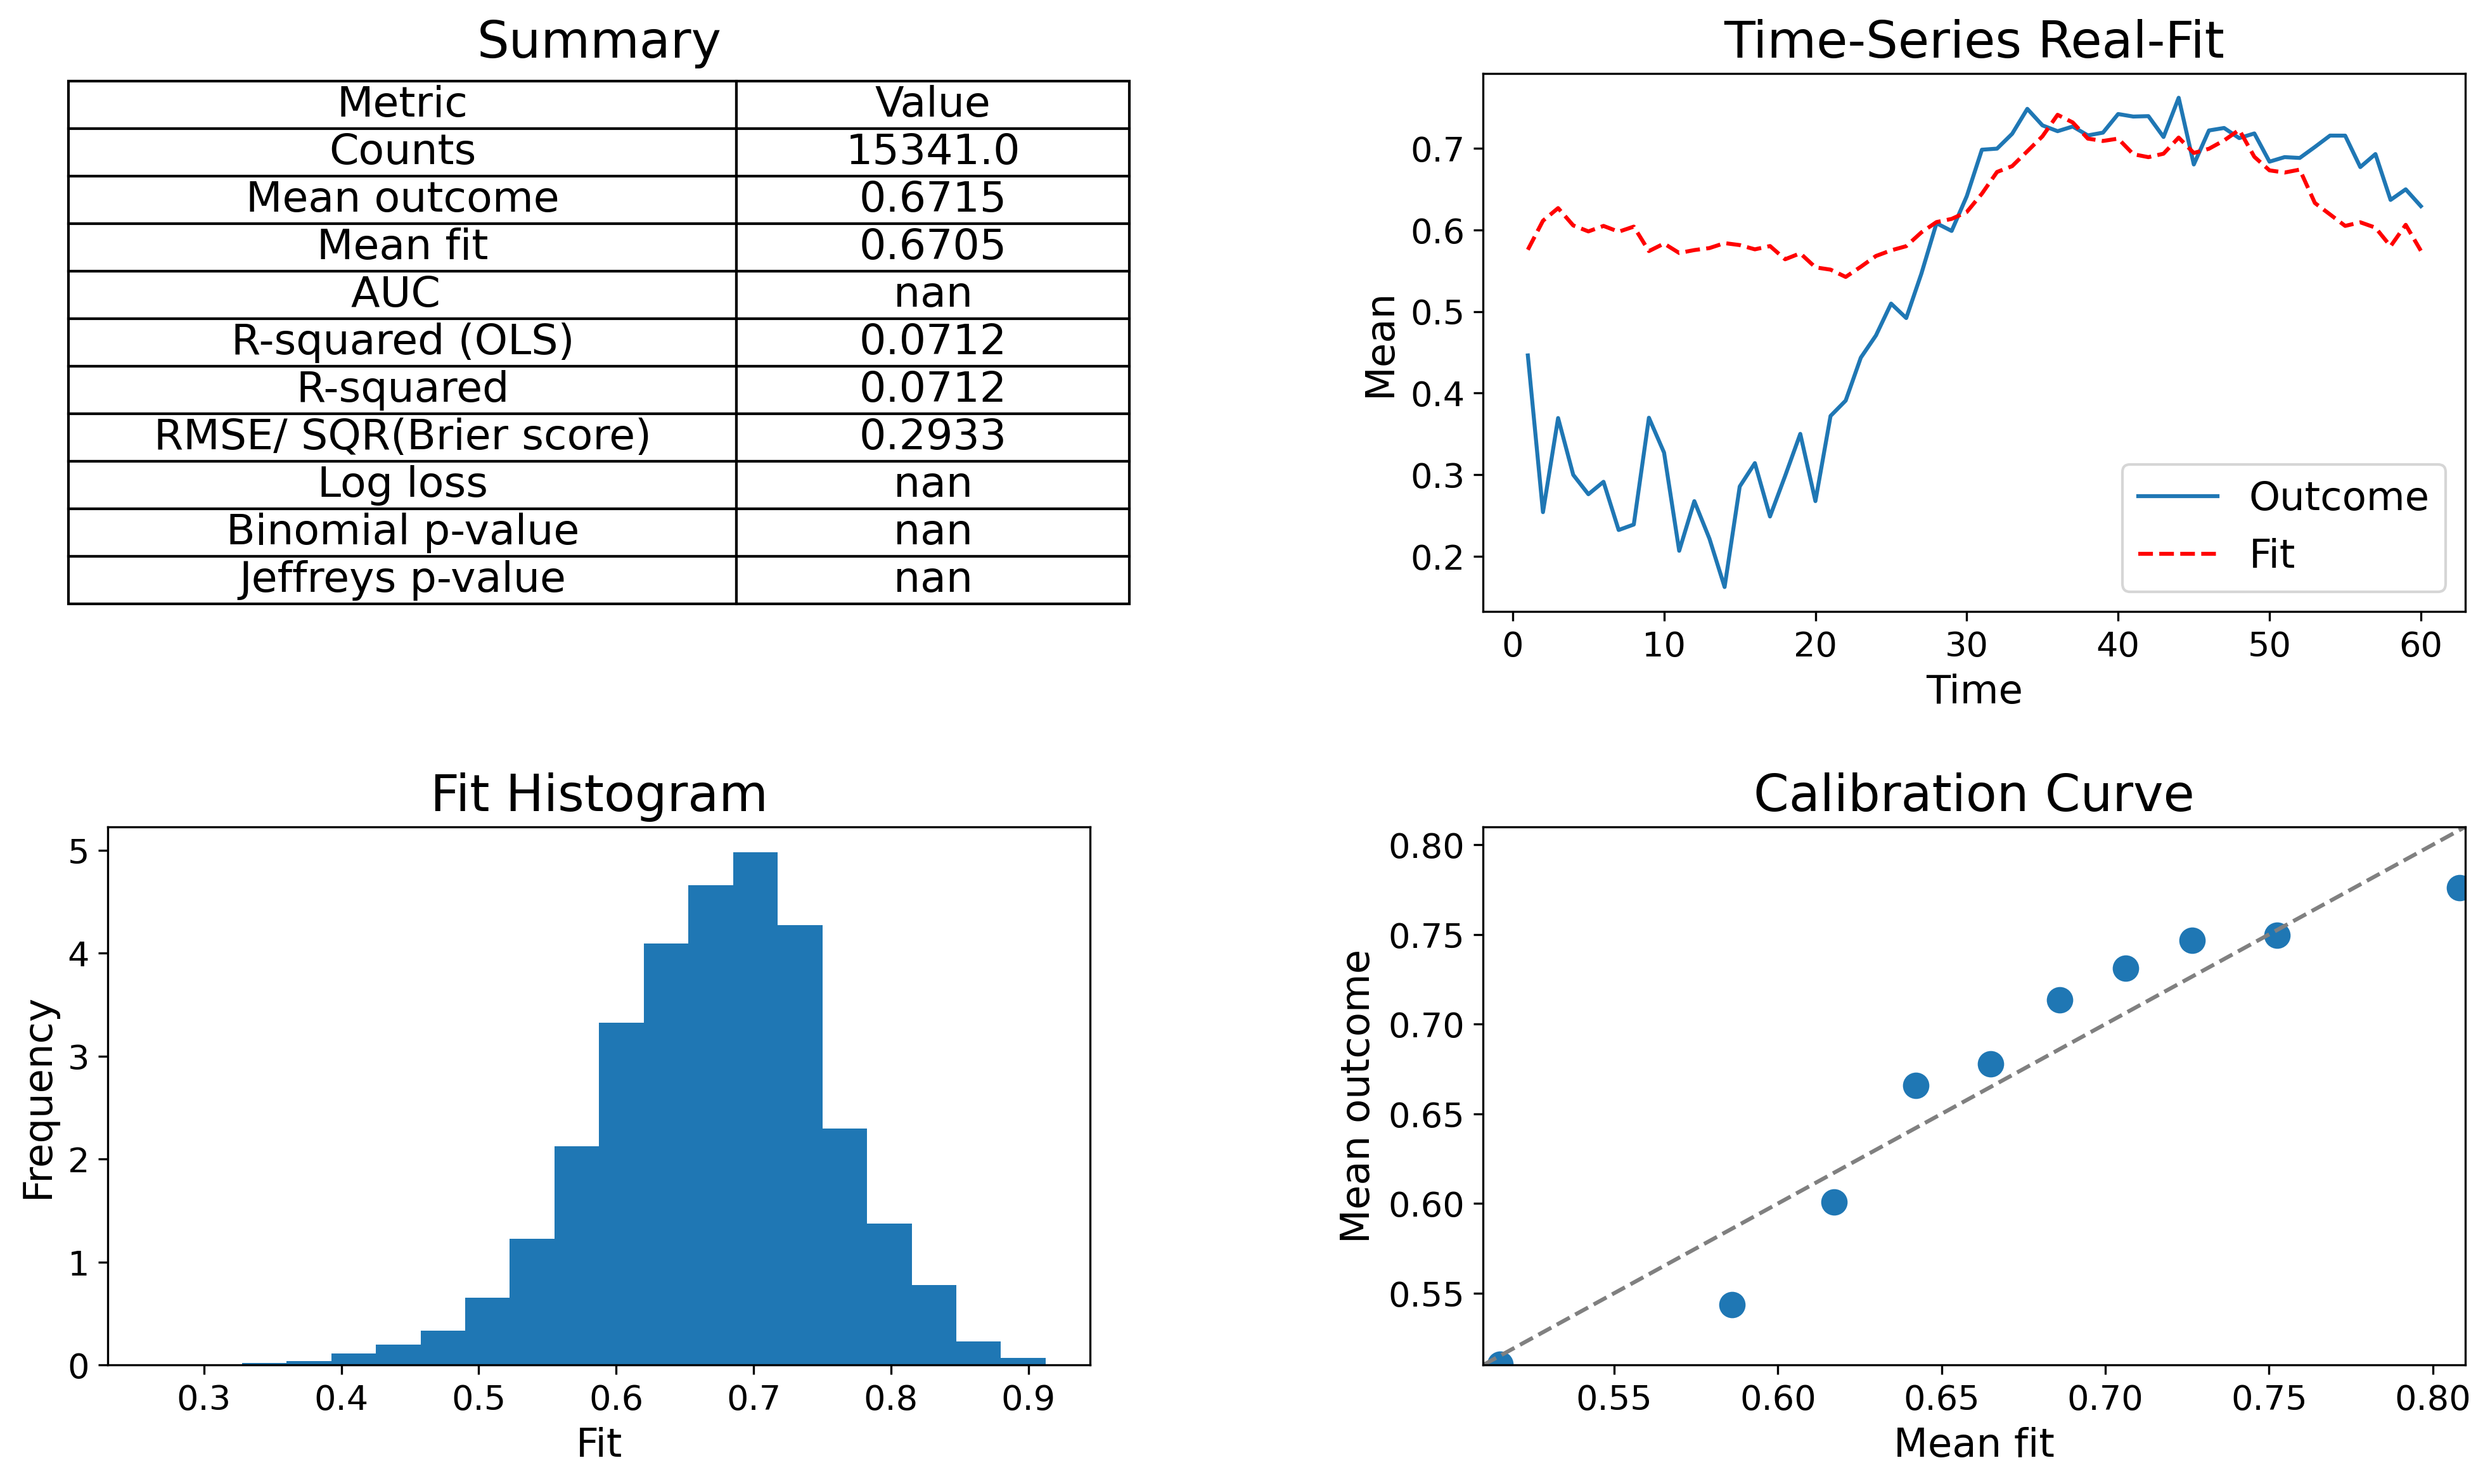

In [78]:
validation(data_default3.LGD_linearmodel, data_default3.LGD, data_default3.time, continuous=True)

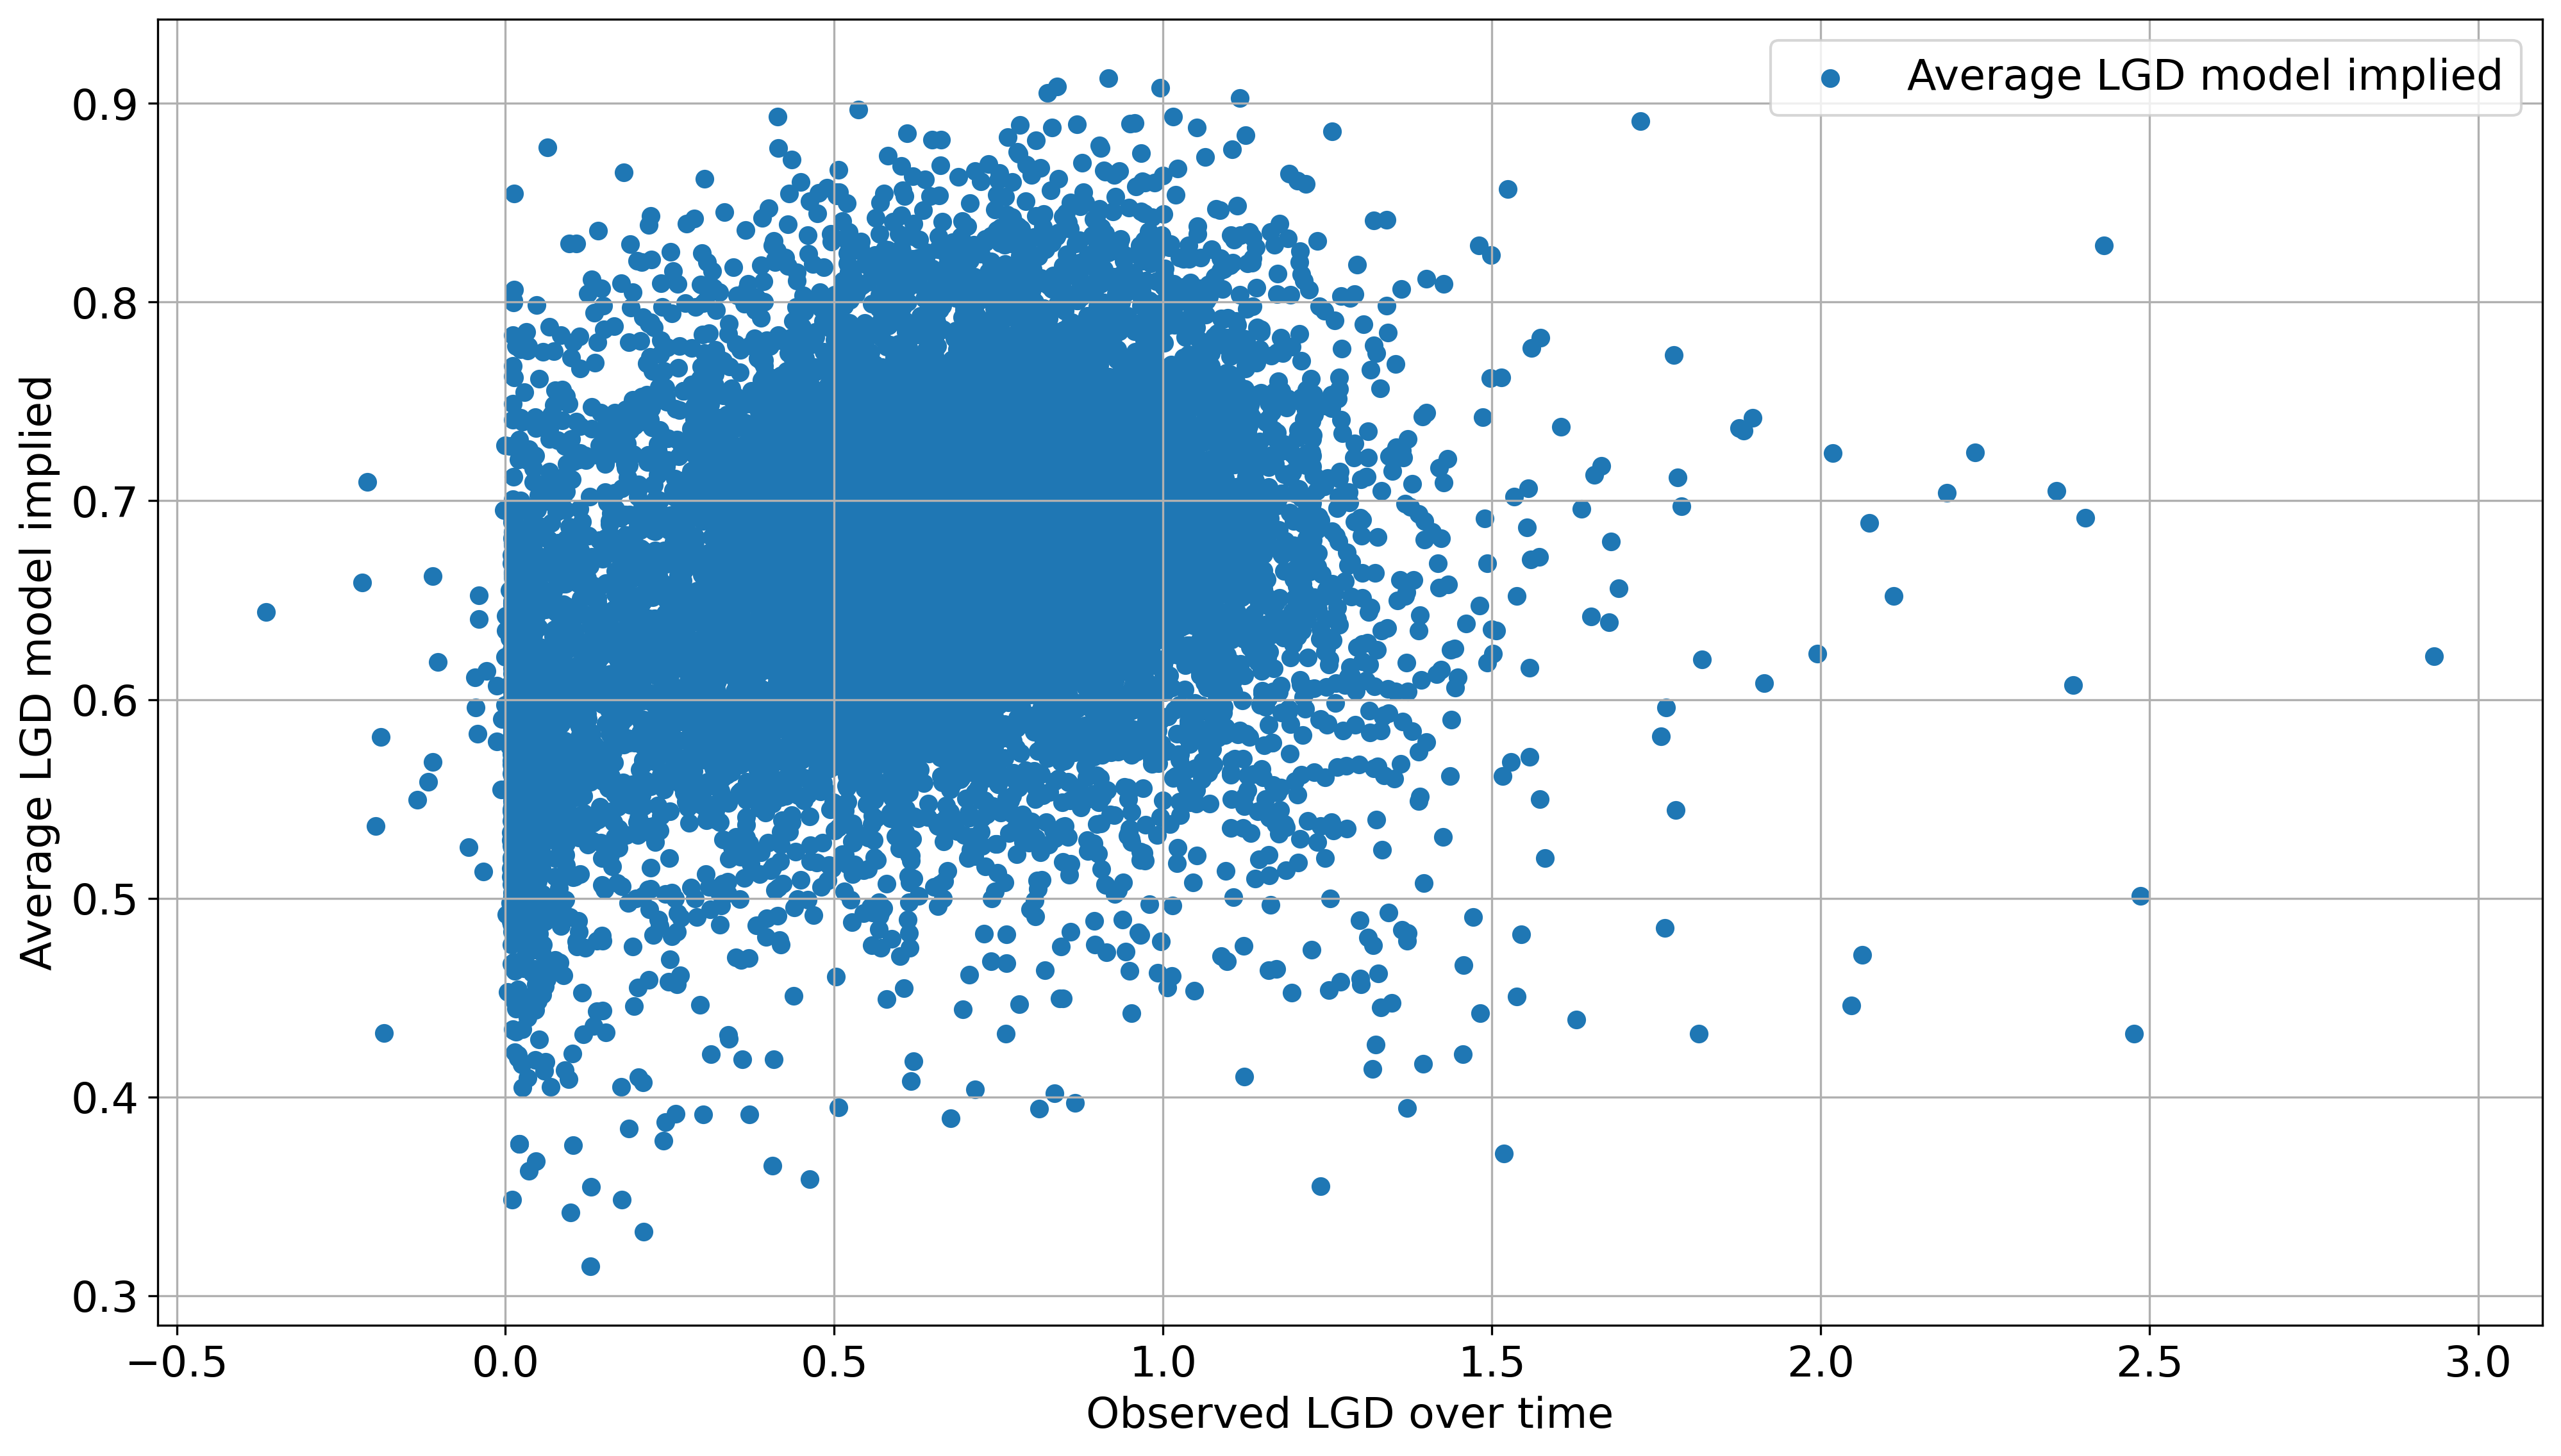

In [79]:
LGD_average = data_default3.groupby('LGD')['LGD_linearmodel'].mean().reset_index(drop=False)

plt.scatter('LGD','LGD_linearmodel', data=LGD_average, label='Average LGD model implied')
plt.xlabel('Observed LGD over time')
plt.ylabel('Average LGD model implied')
plt.legend(loc='best')
plt.grid(True)
plt.show()

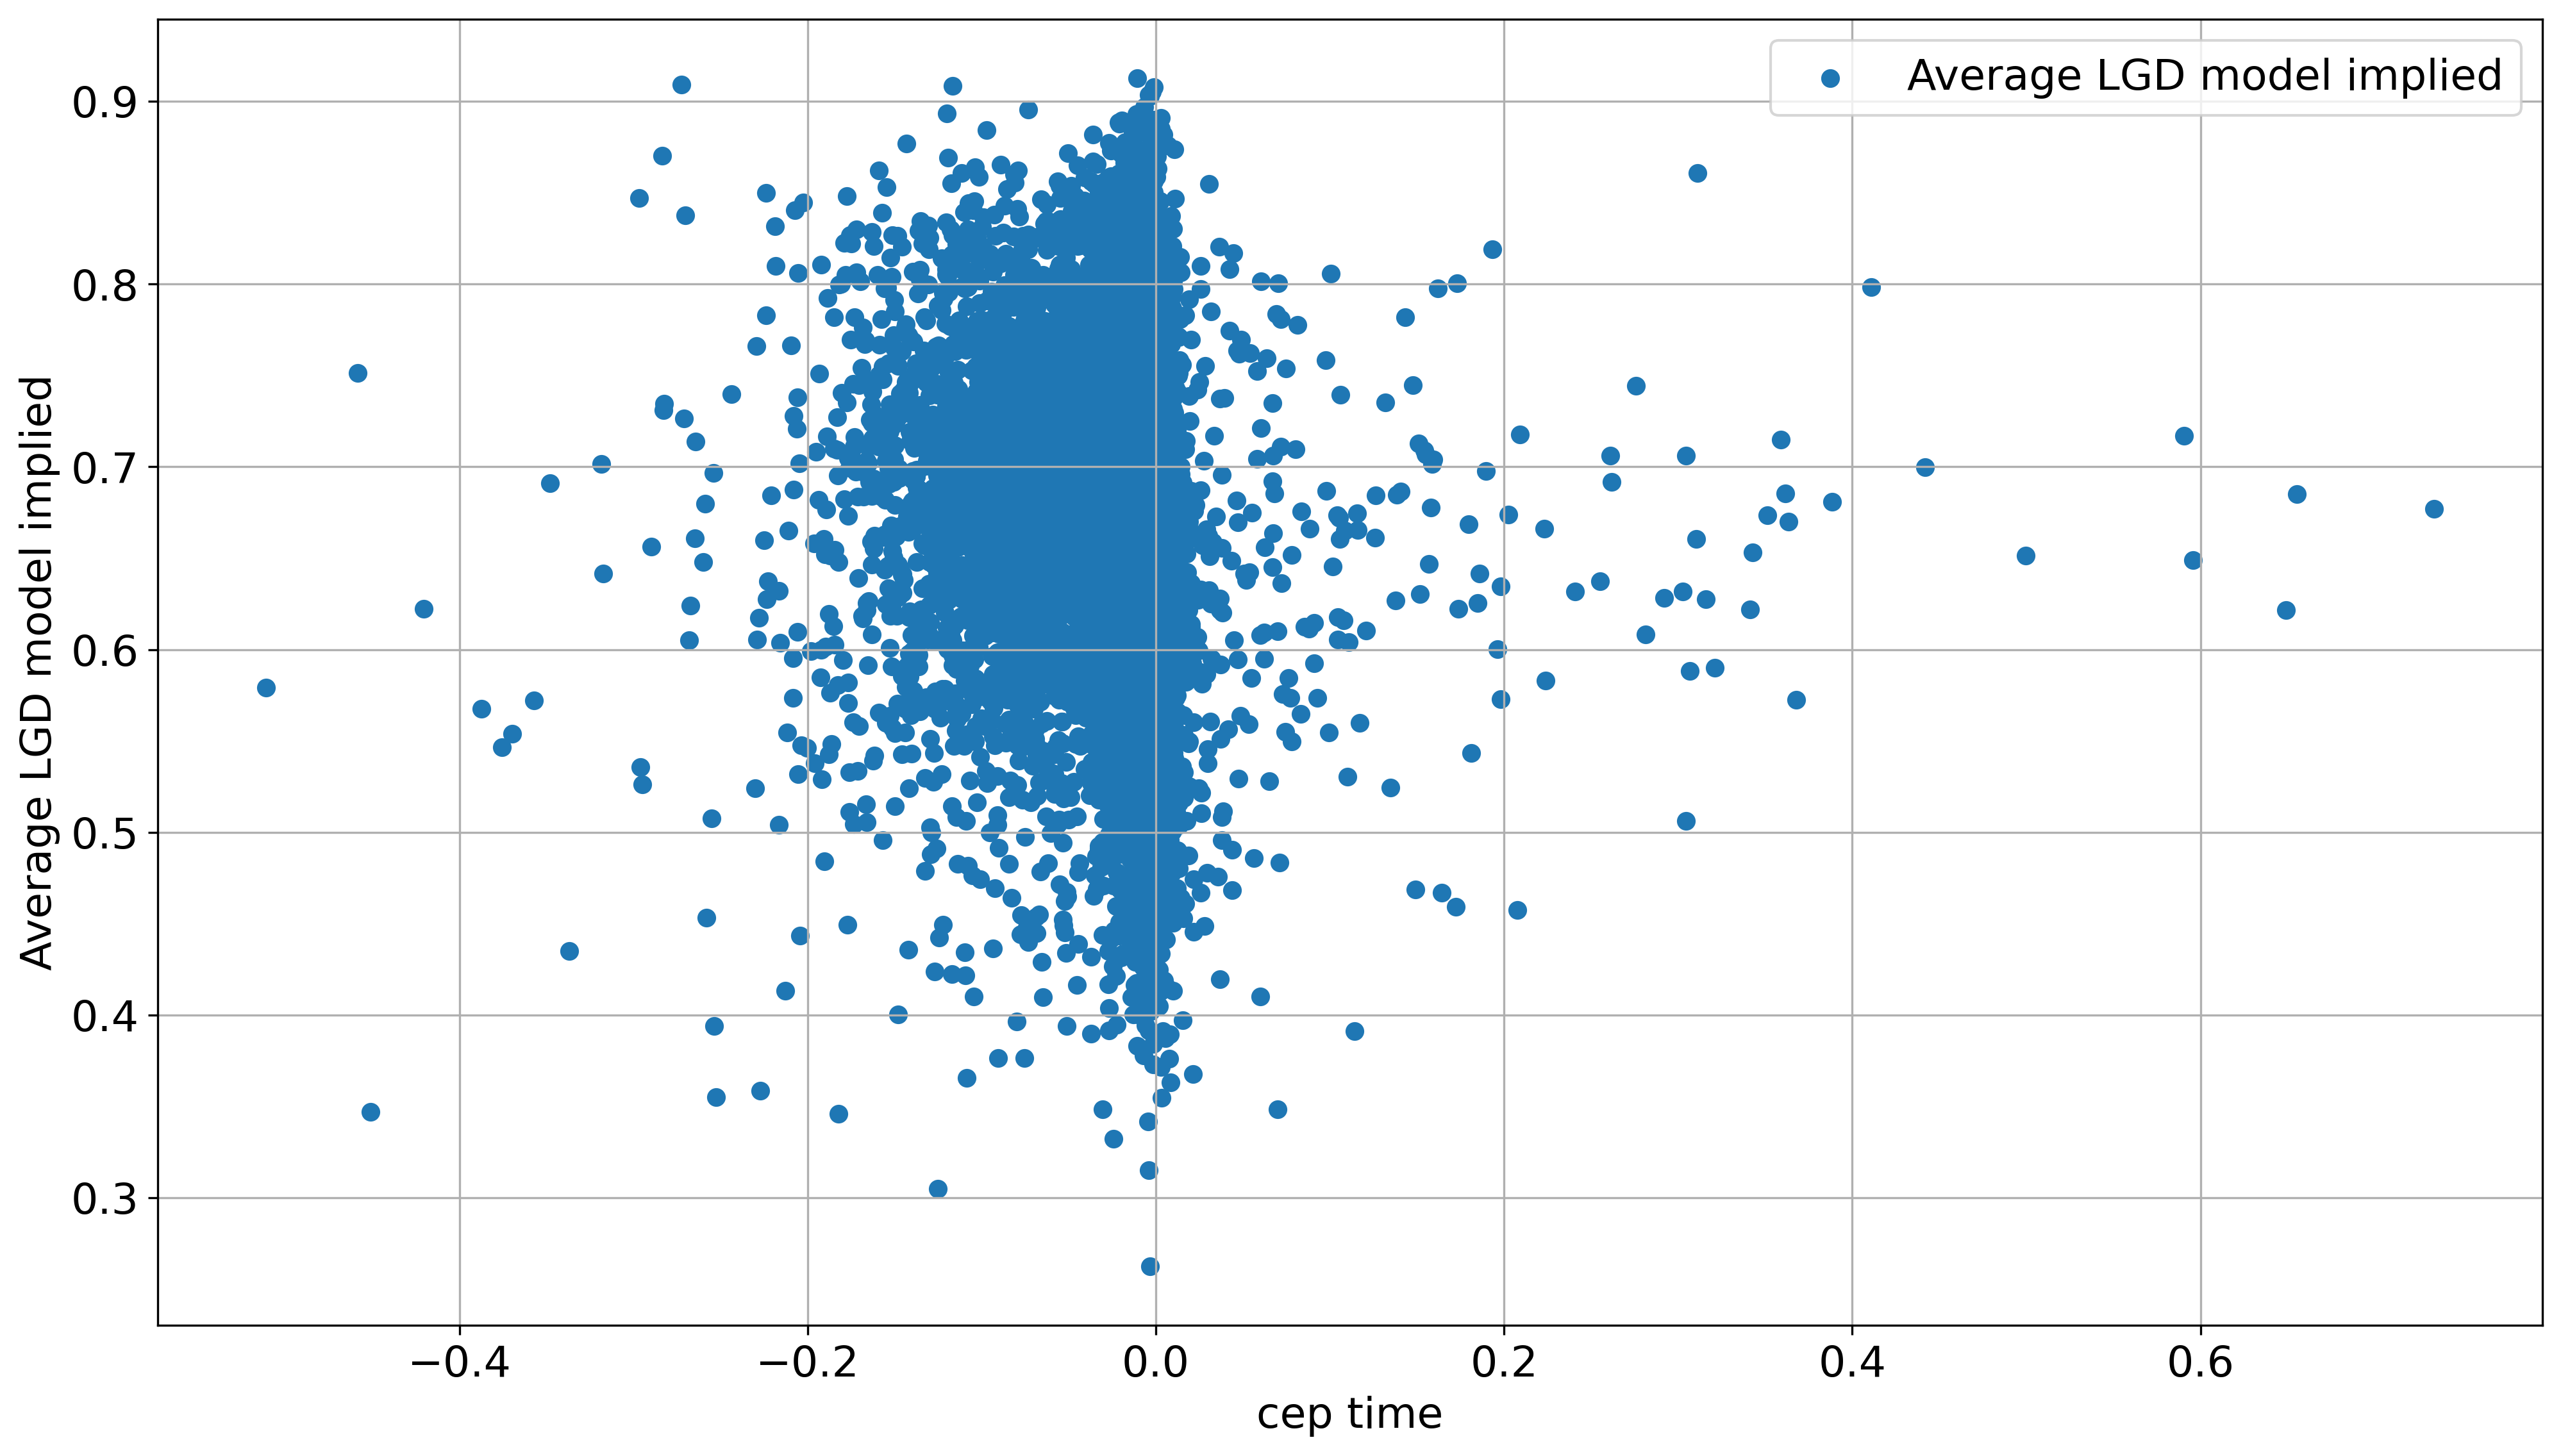

In [80]:
LGD_average = data_default3.groupby('cep_time')['LGD_linearmodel'].mean().reset_index(drop=False)

plt.scatter('cep_time','LGD_linearmodel', data=LGD_average, label='Average LGD model implied')
plt.xlabel('cep time')
plt.ylabel('Average LGD model implied')
plt.legend(loc='best')
plt.grid(True)
plt.show()

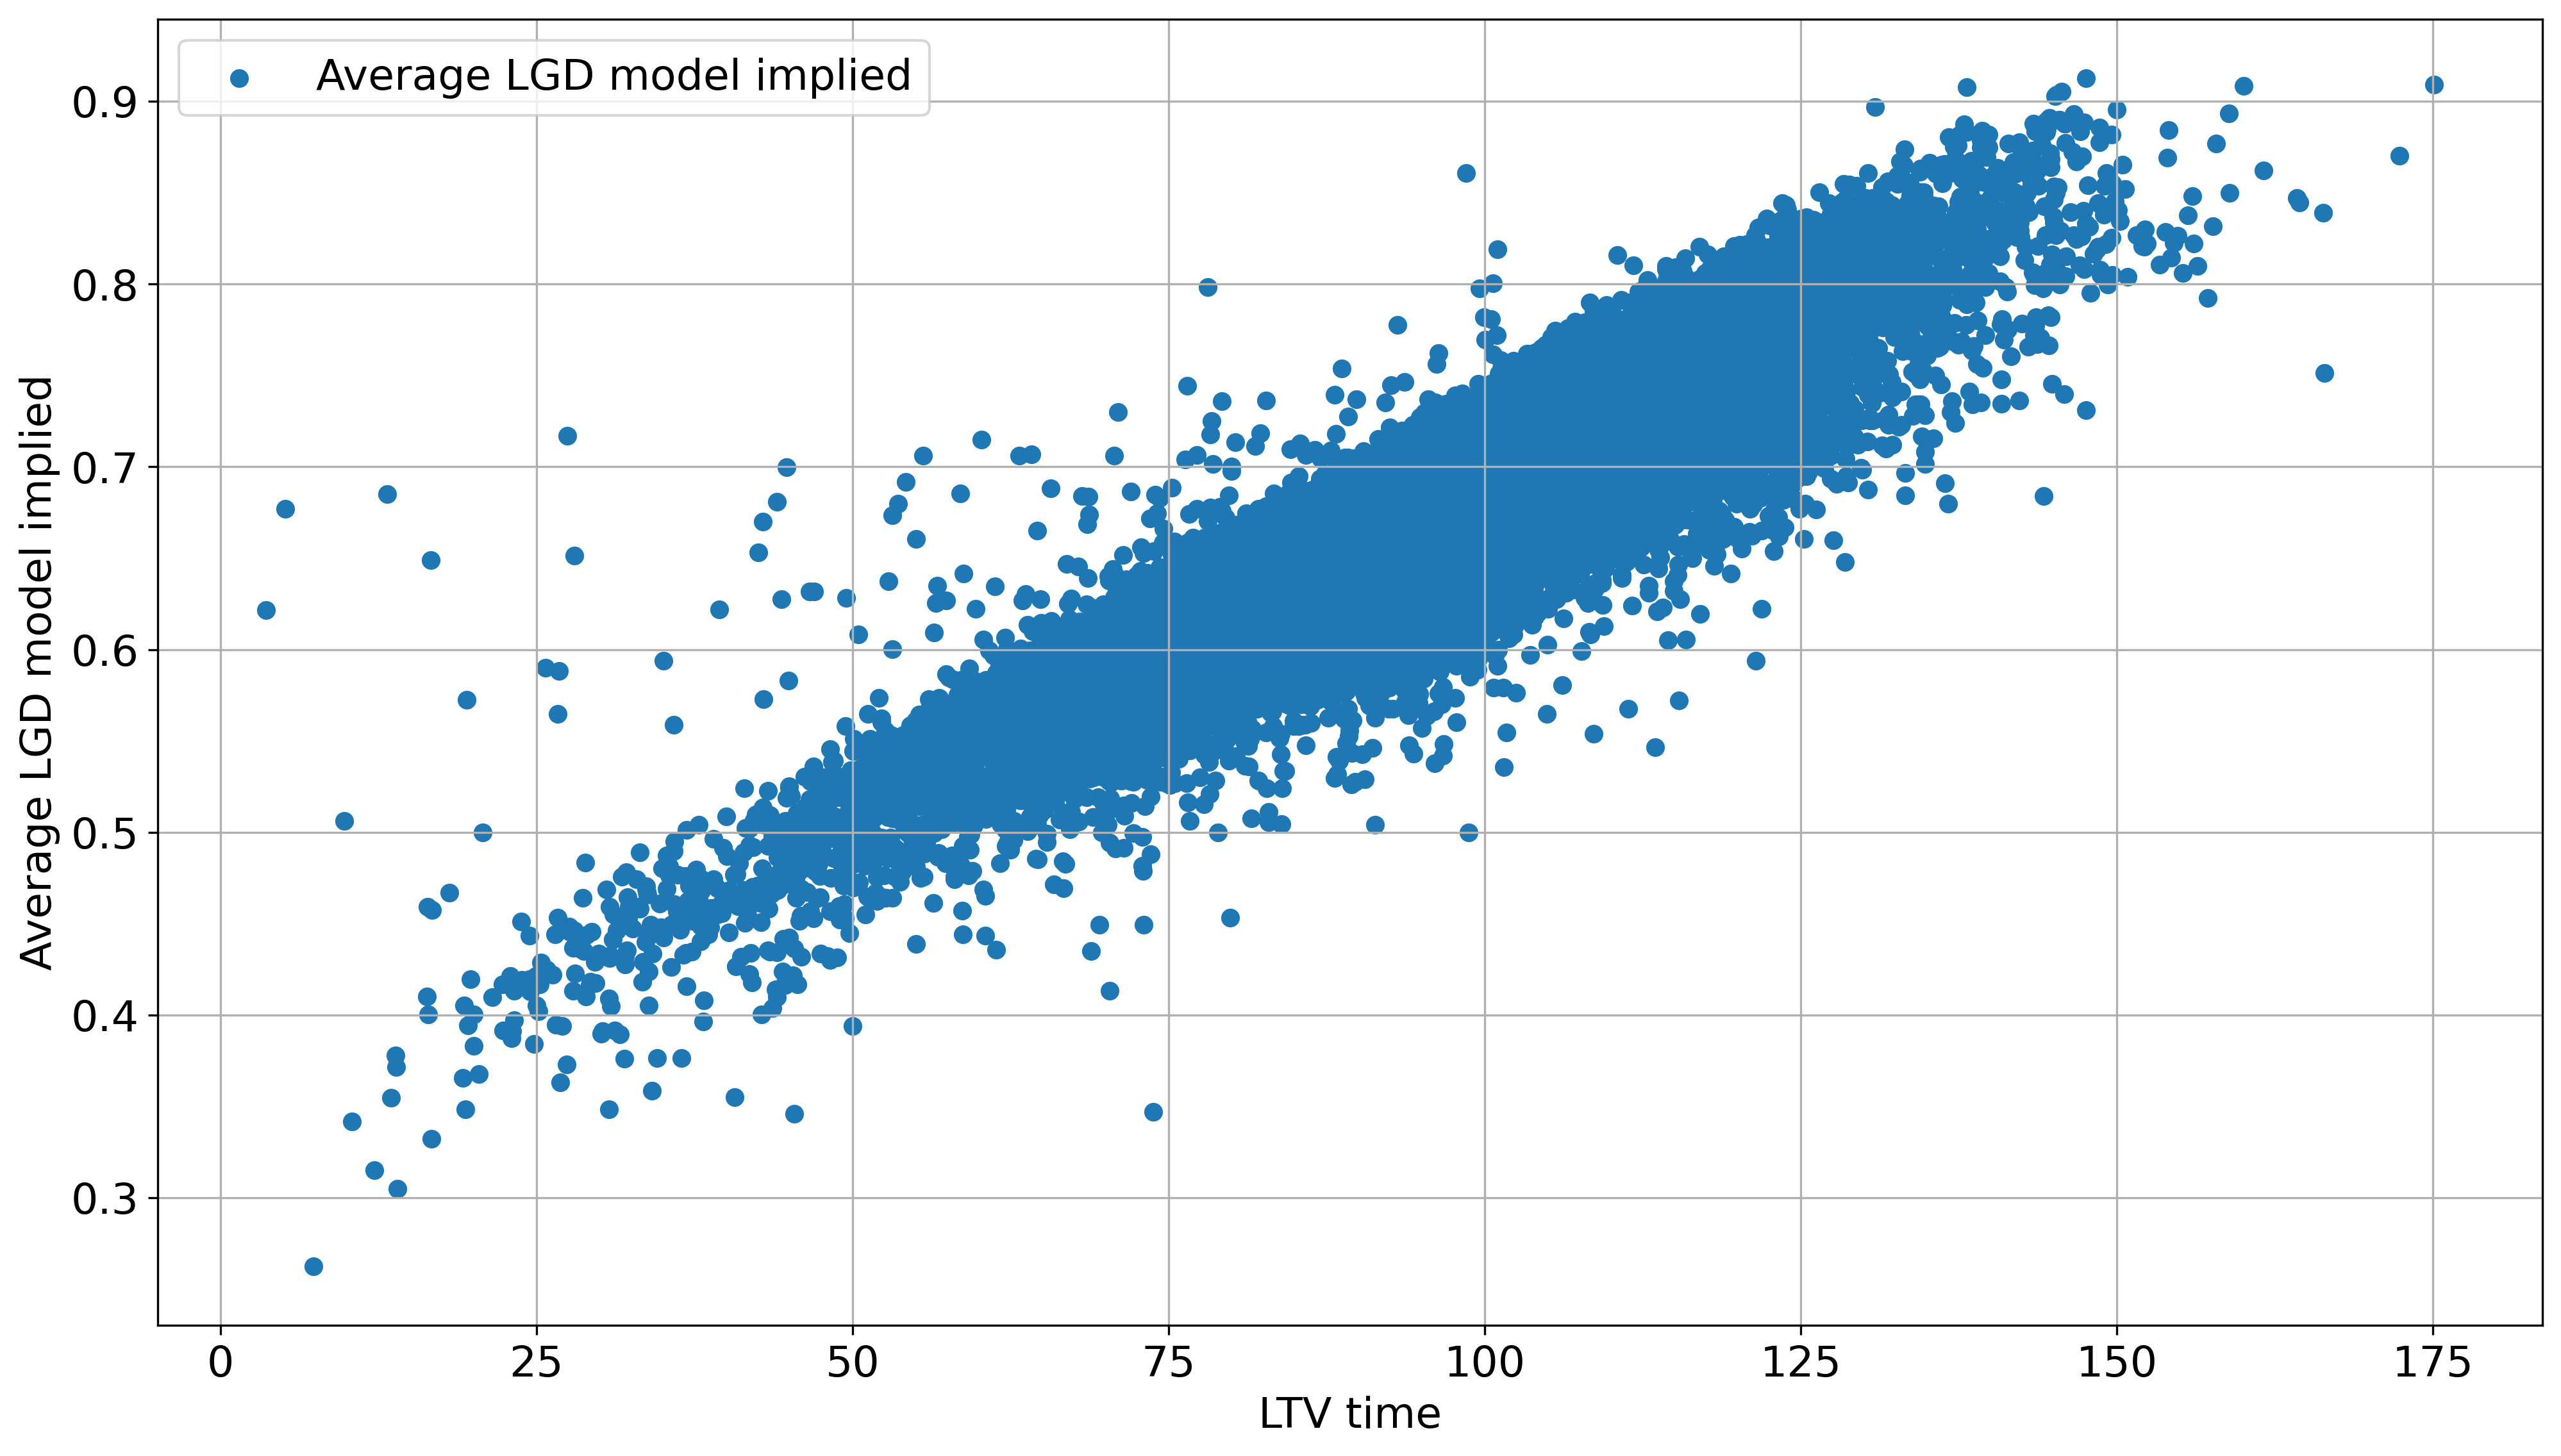

In [81]:
LGD_average = data_default3.groupby('LTV_time')['LGD_linearmodel'].mean().reset_index(drop=False)

plt.scatter('LTV_time','LGD_linearmodel', data=LGD_average, label='Average LGD model implied')
plt.xlabel('LTV time')
plt.ylabel('Average LGD model implied')
plt.legend(loc='best')
plt.grid(True)
plt.show()

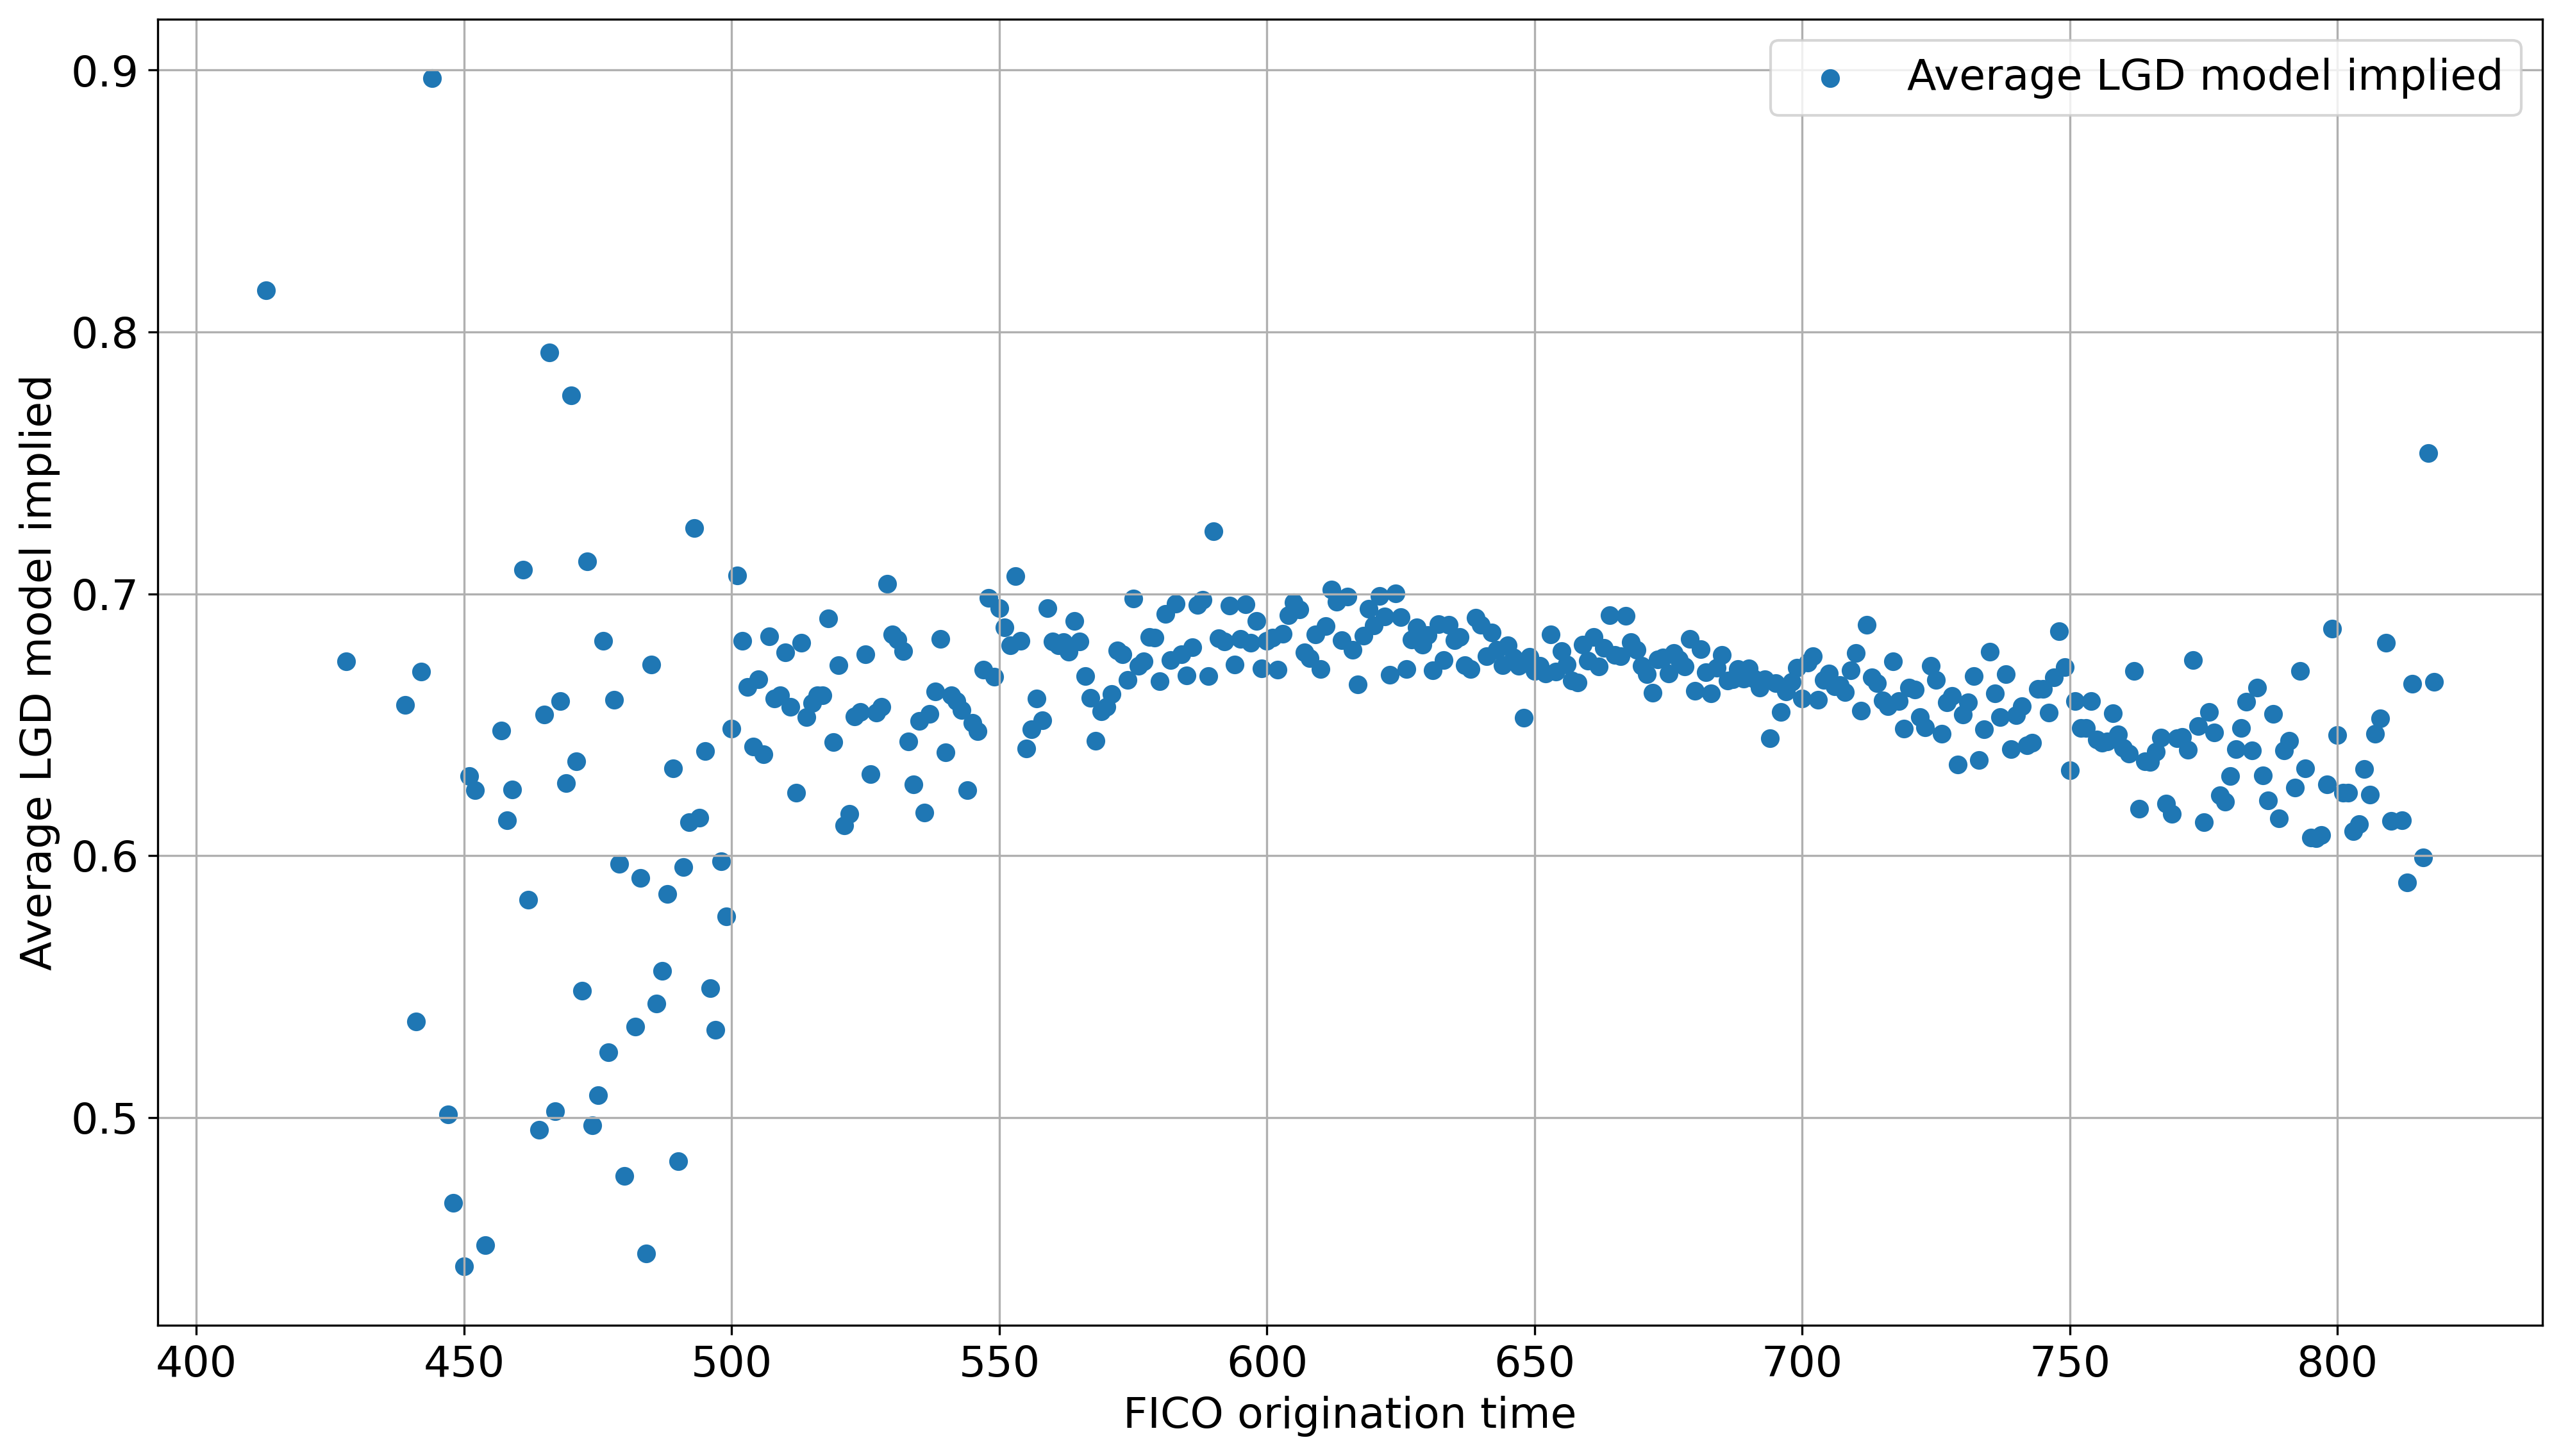

In [82]:
LGD_average = data_default3.groupby('FICO_orig_time')['LGD_linearmodel'].mean().reset_index(drop=False)

plt.scatter('FICO_orig_time','LGD_linearmodel', data=LGD_average, label='Average LGD model implied')
plt.xlabel('FICO origination time')
plt.ylabel('Average LGD model implied')
plt.legend(loc='best')
plt.grid(True)
plt.show()

Firstly, calculating the resolution period is to find out the LGD 
The computation of the LGD based on the formula: 𝐿𝐺𝐷𝑖𝑡=𝐸𝐴𝐷𝑖𝑡−∑𝑇𝜏=1(𝐶𝐹𝑡+𝜏/(1+𝑟𝑡+𝜏)𝑡+𝜏)𝐸𝐴𝐷𝑖𝑡

Using the function resolutionbias is to correct observed LGD for resolution bias. The prediction of LGD is estimated by a linear regression model, and the independent variables are in the feature set (LTV time, CEP time and FICO score). The intercept which is 𝛽0= 0.5219. The LTV time coefficient is 0.0042 (positive relationship), and the CEP time coefficient is 0.5091	(positive relationship), and the FICO score coefficient is -0.0004 (negative relationship). The mean of the implied LGD is nearly fitted with the observed LGD which is 0.670. The computation of the estimated implied LGD for all mortgage loans and periods is shown in the data_default3 as above under the column LGD_linearmodel.

Plot and compare the implied LGD with observed LGD over time and with each feature is shown in the above charts.

In the chart of average LGD implied which is computed from the linear regression model versus the observed LGD: it shows that they are not correlated with each other. 

In the chart of average LGD versus CEP time: there is no correlation for the CEP time and the implied LGD. The CEP time coefficient is 0.5091 showing the positive relationship between LGD and CEP time. There is high LGD when the CEP time is between -0.2 and 0 as CEP shows the liquidity ability of the borrowers, so the lower CEP indicating high loss rates of given default. 

In the chart of average LGD versus LTV time: there is a strong positive relationship between LGD and LTV time (linear line) as the LTV time coefficient is 0.0042. From the chart, it shows the higher rate of LTV creating very high LGD, which LTV is above 100% indicating a very high risk and high loss rate given default

In the chart of average LGD versus FICO score: there is a strongly negative relationship that makes a linear line as shown in the chart. The FICO score coefficient is -0.0004 which indicates that is the negative relationship. The high FICO score means the lower LGD and vice versa. 

# b)

In [83]:
data_default.loc[:,'LTV_time_p1'] = data_default.loc[:,'LTV_time']**1  
data_default.loc[:,'LTV_time_p2'] = data_default.loc[:,'LTV_time']**2  
data_default.loc[:,'LTV_time_p3'] = data_default.loc[:,'LTV_time']**3 

data_default.loc[:,'FICO_orig_time_p1'] = data_default.loc[:,'FICO_orig_time']**1  
data_default.loc[:,'FICO_orig_time_p2'] = data_default.loc[:,'FICO_orig_time']**2  
data_default.loc[:,'FICO_orig_time_p3'] = data_default.loc[:,'FICO_orig_time']**3 

data_default.loc[:,'cep_time_p1'] = data_default.loc[:,'cep_time']**1  
data_default.loc[:,'cep_time_p2'] = data_default.loc[:,'cep_time']**2  
data_default.loc[:,'cep_time_p3'] = data_default.loc[:,'cep_time']**3

In [84]:
data_default3 = data_default[['LGD', 'cep_time','LTV_time','FICO_orig_time','cep_time_p1','cep_time_p2','cep_time_p3','LTV_time_p1','LTV_time_p2','LTV_time_p3','FICO_orig_time_p1','FICO_orig_time_p2','FICO_orig_time_p3','time']].dropna()
LGD2_model_ols=smf.ols(formula='LGD ~ cep_time_p1 + cep_time_p2 + cep_time_p3 + LTV_time_p1 + LTV_time_p2 + LTV_time_p3 + FICO_orig_time_p1+ FICO_orig_time_p2 + FICO_orig_time_p3', data=data_default3).fit()
LGD2_model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    LGD   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     156.3
Date:                Mon, 25 Oct 2021   Prob (F-statistic):          4.08e-284
Time:                        02:47:58   Log-Likelihood:                -2808.0
No. Observations:               15153   AIC:                             5636.
Df Residuals:                   15143   BIC:                             5712.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -3.6749      1.198     -3.068      0.002      -6.022      -1.327
cep_time_p1           0.5365      0.079      6.822      0.000       0.382       0.691
cep_time_p2           1.1710      0.275      4.256      0.000       0.632       1.710
cep_time_p3          -1.8673      0.645     -2.896      0.004      -3.131      -0.604
LTV_time_p1          -0.0160      0.002     -7.663      0.000      -0.020      -0.012
LTV_time_p2           0.0003   2.41e-05     10.882      0.000       0.000       0.000
LTV_time_p3       -1.041e-06   8.91e-08    -11.693      0.000   -1.22e-06   -8.67e-07
FICO_orig_time_p1     0.0215      0.006      3.771      0.000       0.010       0.033
FICO_orig_time_p2 -3.371e-05   8.92e-06     -3.779      0.000   -5.12e-05   -1.62e-05
FICO_orig_time_p3  1.715e-08   4.63e-09      3.707      0.000    8.08e-09    2.62e-08
==============================================================================
Omnibus:                      371.844   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              881.965
Skew:                           0.037   Prob(JB):                    3.05e-192
Kurtosis:                       4.180   Cond. No.                     1.49e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
fittedvalues= pd.DataFrame(LGD2_model_ols.fittedvalues, columns=['LGD2_linearmodel'])
data_default4=pd.merge(data_default3,fittedvalues,right_index=True,left_index=True)
data_default4

LGD  cep_time    LTV_time  FICO_orig_time  cep_time_p1  \
0       0.834064 -0.048461   99.138105             501    -0.048461   
1       0.834064 -0.013756  101.403077             536    -0.013756   
2       0.834064  0.001033   95.242783             503     0.001033   
3       0.834064 -0.000662  115.682577             567    -0.000662   
4       0.834064 -0.024072  117.399645             654    -0.024072   
...          ...       ...         ...             ...          ...   
619326  0.442772  0.016273   90.679429             757     0.016273   
620807  0.568818 -0.211140  121.888972             683    -0.211140   
621092  0.513494 -0.064848  105.860370             672    -0.064848   
621655  0.324559 -0.008475   83.879828             569    -0.008475   
622011  0.262263 -0.161471  114.559047             676    -0.161471   

         cep_time_p2   cep_time_p3  LTV_time_p1   LTV_time_p2   LTV_time_p3  \
0       2.348423e-03 -1.138058e-04    99.138105   9828.363782  9.743654e+05   
1       1.892409e-04 -2.603289e-06   101.403077  10282.584045  1.042686e+06   
2       1.066129e-06  1.100816e-09    95.242783   9071.187690  8.639652e+05   
3       4.380418e-07 -2.899168e-10   115.682577  13382.458670  1.548117e+06   
4       5.794842e-04 -1.394962e-05   117.399645  13782.676552  1.618081e+06   
...              ...           ...          ...           ...           ...   
619326  2.648001e-04  4.309007e-06    90.679429   8222.758841  7.456351e+05   
620807  4.458020e-02 -9.412675e-03   121.888972  14856.921544  1.810895e+06   
621092  4.205204e-03 -2.726972e-04   105.860370  11206.418040  1.186316e+06   
621655  7.183400e-05 -6.088287e-07    83.879828   7035.825554  5.901638e+05   
622011  2.607284e-02 -4.210003e-03   114.559047  13123.775137  1.503447e+06   

        FICO_orig_time_p1  FICO_orig_time_p2  FICO_orig_time_p3  time  \
0                     501             251001          125751501    37   
1                     536             287296          153990656    37   
2                     503             253009          127263527    37   
3                     567             321489          182284263    37   
4                     654             427716          279726264    37   
...                   ...                ...                ...   ...   
619326                757             573049          433798093    53   
620807                683             466489          318611987    52   
621092                672             451584          303464448    55   
621655                569             323761          184220009    52   
622011                676             456976          308915776    53   

        LGD2_linearmodel  
0               0.714345  
1               0.753435  
2               0.718272  
3               0.814265  
4               0.763773  
...                  ...  
619326          0.619660  
620807          0.723092  
621092          0.695524  
621655          0.655527  
622011          0.706471  

[15341 rows x 15 columns]

In [90]:
print(data_default4[['LGD','LGD2_linearmodel']].describe().round(3))

             LGD  LGD2_linearmodel
count  15341.000         15341.000
mean       0.671             0.671
std        0.304             0.089
min       -0.364             0.364
25%        0.497             0.610
50%        0.758             0.688
75%        0.834             0.737
max        2.932             1.013


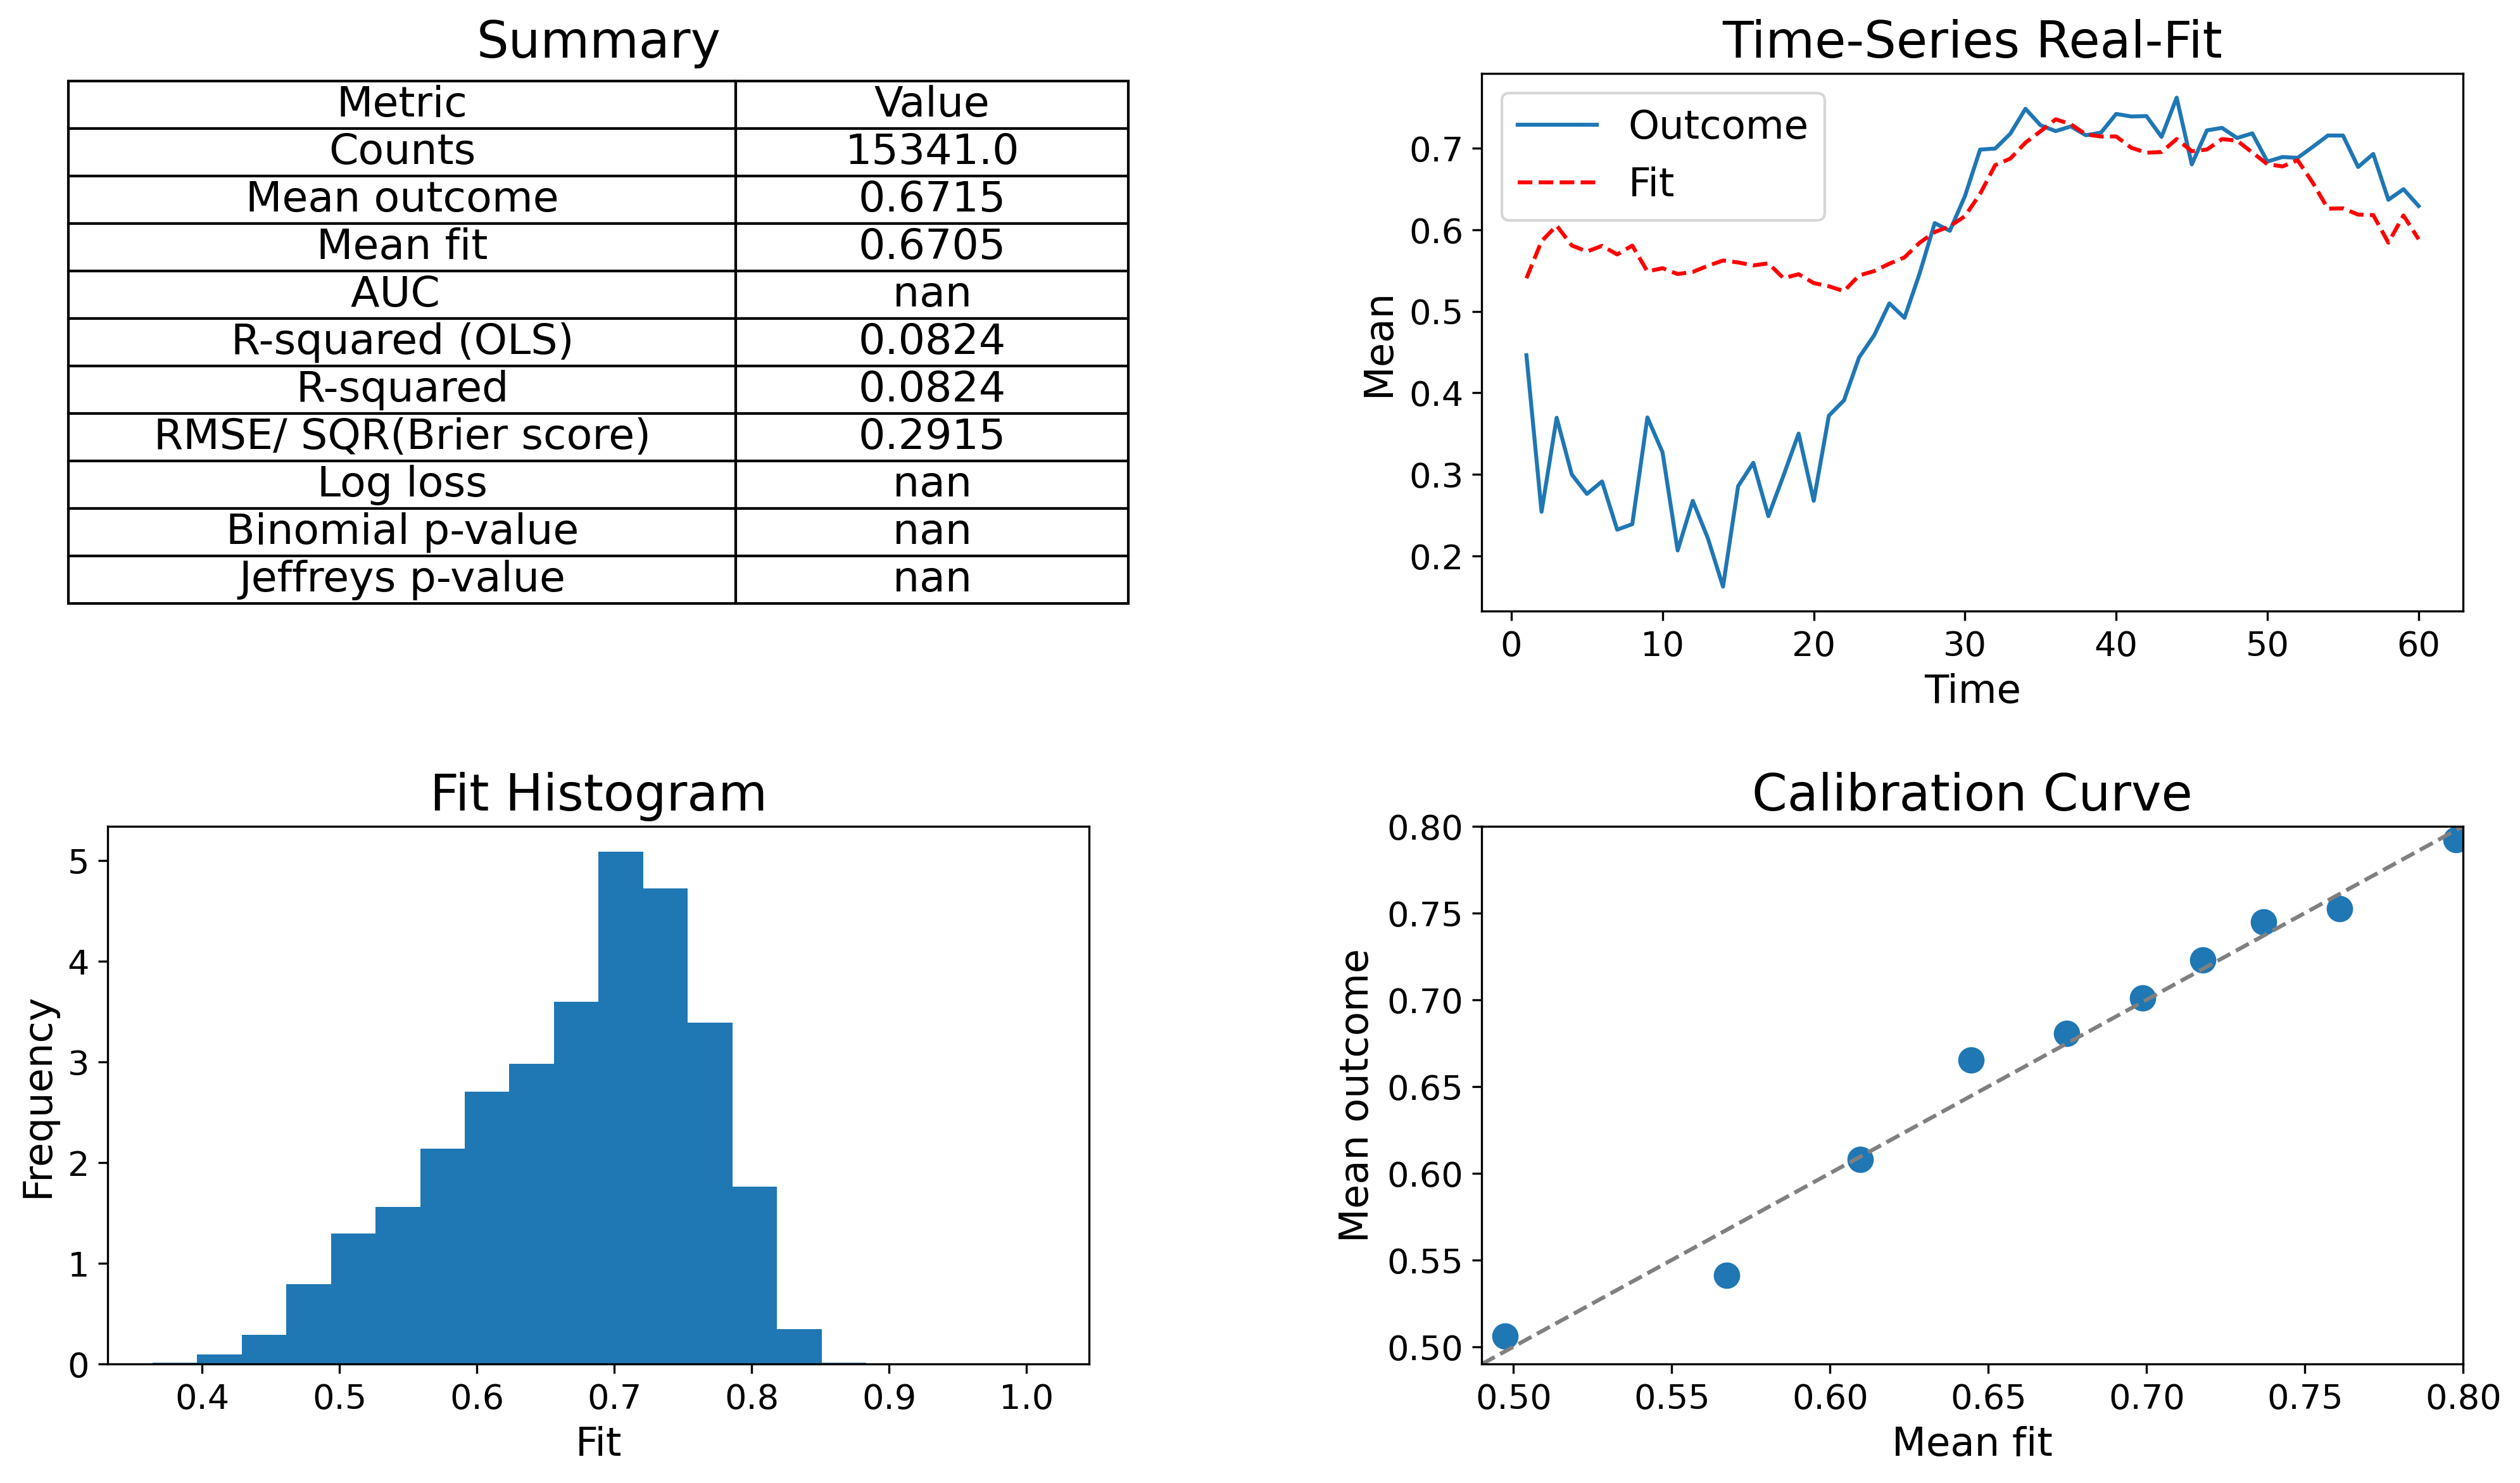

In [91]:
validation(data_default4.LGD2_linearmodel, data_default4.LGD, data_default4.time, continuous=True)

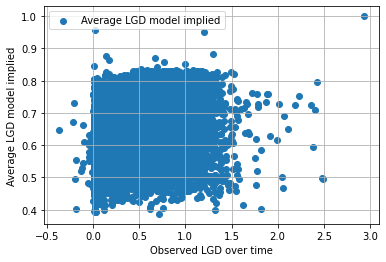

In [495]:
LGD2_average = data_default4.groupby('LGD')['LGD2_linearmodel'].mean().reset_index(drop=False)

plt.scatter('LGD','LGD2_linearmodel', data=LGD2_average, label='Average LGD model implied')
plt.xlabel('Observed LGD over time')
plt.ylabel('Average LGD model implied')
plt.legend(loc='best')
plt.grid(True)
plt.show()

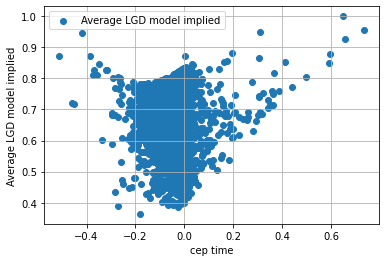

In [496]:
LGD2_average = data_default4.groupby('cep_time')['LGD2_linearmodel'].mean().reset_index(drop=False)

plt.scatter('cep_time','LGD2_linearmodel', data=LGD2_average, label='Average LGD model implied')
plt.xlabel('cep time')
plt.ylabel('Average LGD model implied')
plt.legend(loc='best')
plt.grid(True)
plt.show()

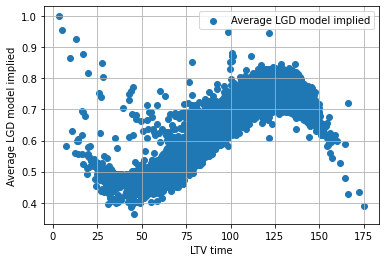

In [497]:
LGD2_average = data_default4.groupby('LTV_time')['LGD2_linearmodel'].mean().reset_index(drop=False)

plt.scatter('LTV_time','LGD2_linearmodel', data=LGD2_average, label='Average LGD model implied')
plt.xlabel('LTV time')
plt.ylabel('Average LGD model implied')
plt.legend(loc='best')
plt.grid(True)
plt.show()

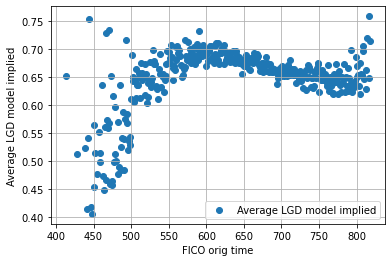

In [501]:
LGD2_average = data_default4.groupby('FICO_orig_time')['LGD2_linearmodel'].mean().reset_index(drop=False)

plt.scatter('FICO_orig_time','LGD2_linearmodel', data=LGD2_average, label='Average LGD model implied')
plt.xlabel('FICO orig time')
plt.ylabel('Average LGD model implied')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In this LGD model, a non-linear transformation of the feature set (LTV time, CEP time and FICO score) is included to get a better model accuracy. Non-linear transformations applies polynomial terms for the feature set with the power of one, two and three. The out-of-sample may observe a better prediction for probabilities of default. This LGD model is estimated by a linear regression model to predict LGD.

The intercept which is 𝛽0= -3.6749. The LTV time p1 coefficient is -0.0160, the LTV time p2 coefficient 0.0003, the LTV time p3 coefficient is -1.041e-06. The FICO score of p1,p2,p3 is as following 0.0215, -3.371e-05, 1.715e-08. The CEP time coefficient of p1,p2,p3 is as following 0.5365, 1.1710, -1.8673. The coefficient of these out-of-sample is larger than the model in the question 3A. The mean of the LGD is nearly fitted with the observed LGD which is 0.671. The computation of the estimated LGD for all mortgage loans and periods is shown in the data_default4 as above under the column LGD2_linearmodel.

Plot and compare the implied LGD with observed LGD over time and with each feature is shown in the above charts.

In the chart of average LGD implied which is computed from the linear regression model versus the observed LGD: it shows that they are not correlated with each other.

In the chart of average LGD versus CEP time: there is no correlation for the CEP time and the implied LGD. There is high LGD when the CEP time is between -0.2 and 0 as CEP shows the liquidity ability of the borrowers, so the lower CEP indicating high loss rates of given default. There is out-of-sample observation which are the value of CEP time above 0.6 and below -0.4 indicating high LGD. 

In the chart of average LGD versus LTV time: there is nonlinear line LGD and LTV time. 

In the chart of average LGD versus FICO score: there is outliers with the FICO score below 500 and the score above 800. The higher FICO score also indicates high LGD as observed from the chart.

From the two model 3A and 3B, the adjusted R^2 of linear regression model 3A is 0.074 and the adjusted R^2 of linear regression model 3B is 0.084. It indicates the model 3B is more fitted to the regression model than the 3A model.


# c)

In [171]:
data_default_training = data.loc[(data['time']<40)&(data['default_time']==1),:].copy()
data_default_test = data.loc[(data['time']>=40)&(data['time']<50)&(data['default_time']==1),:].copy()

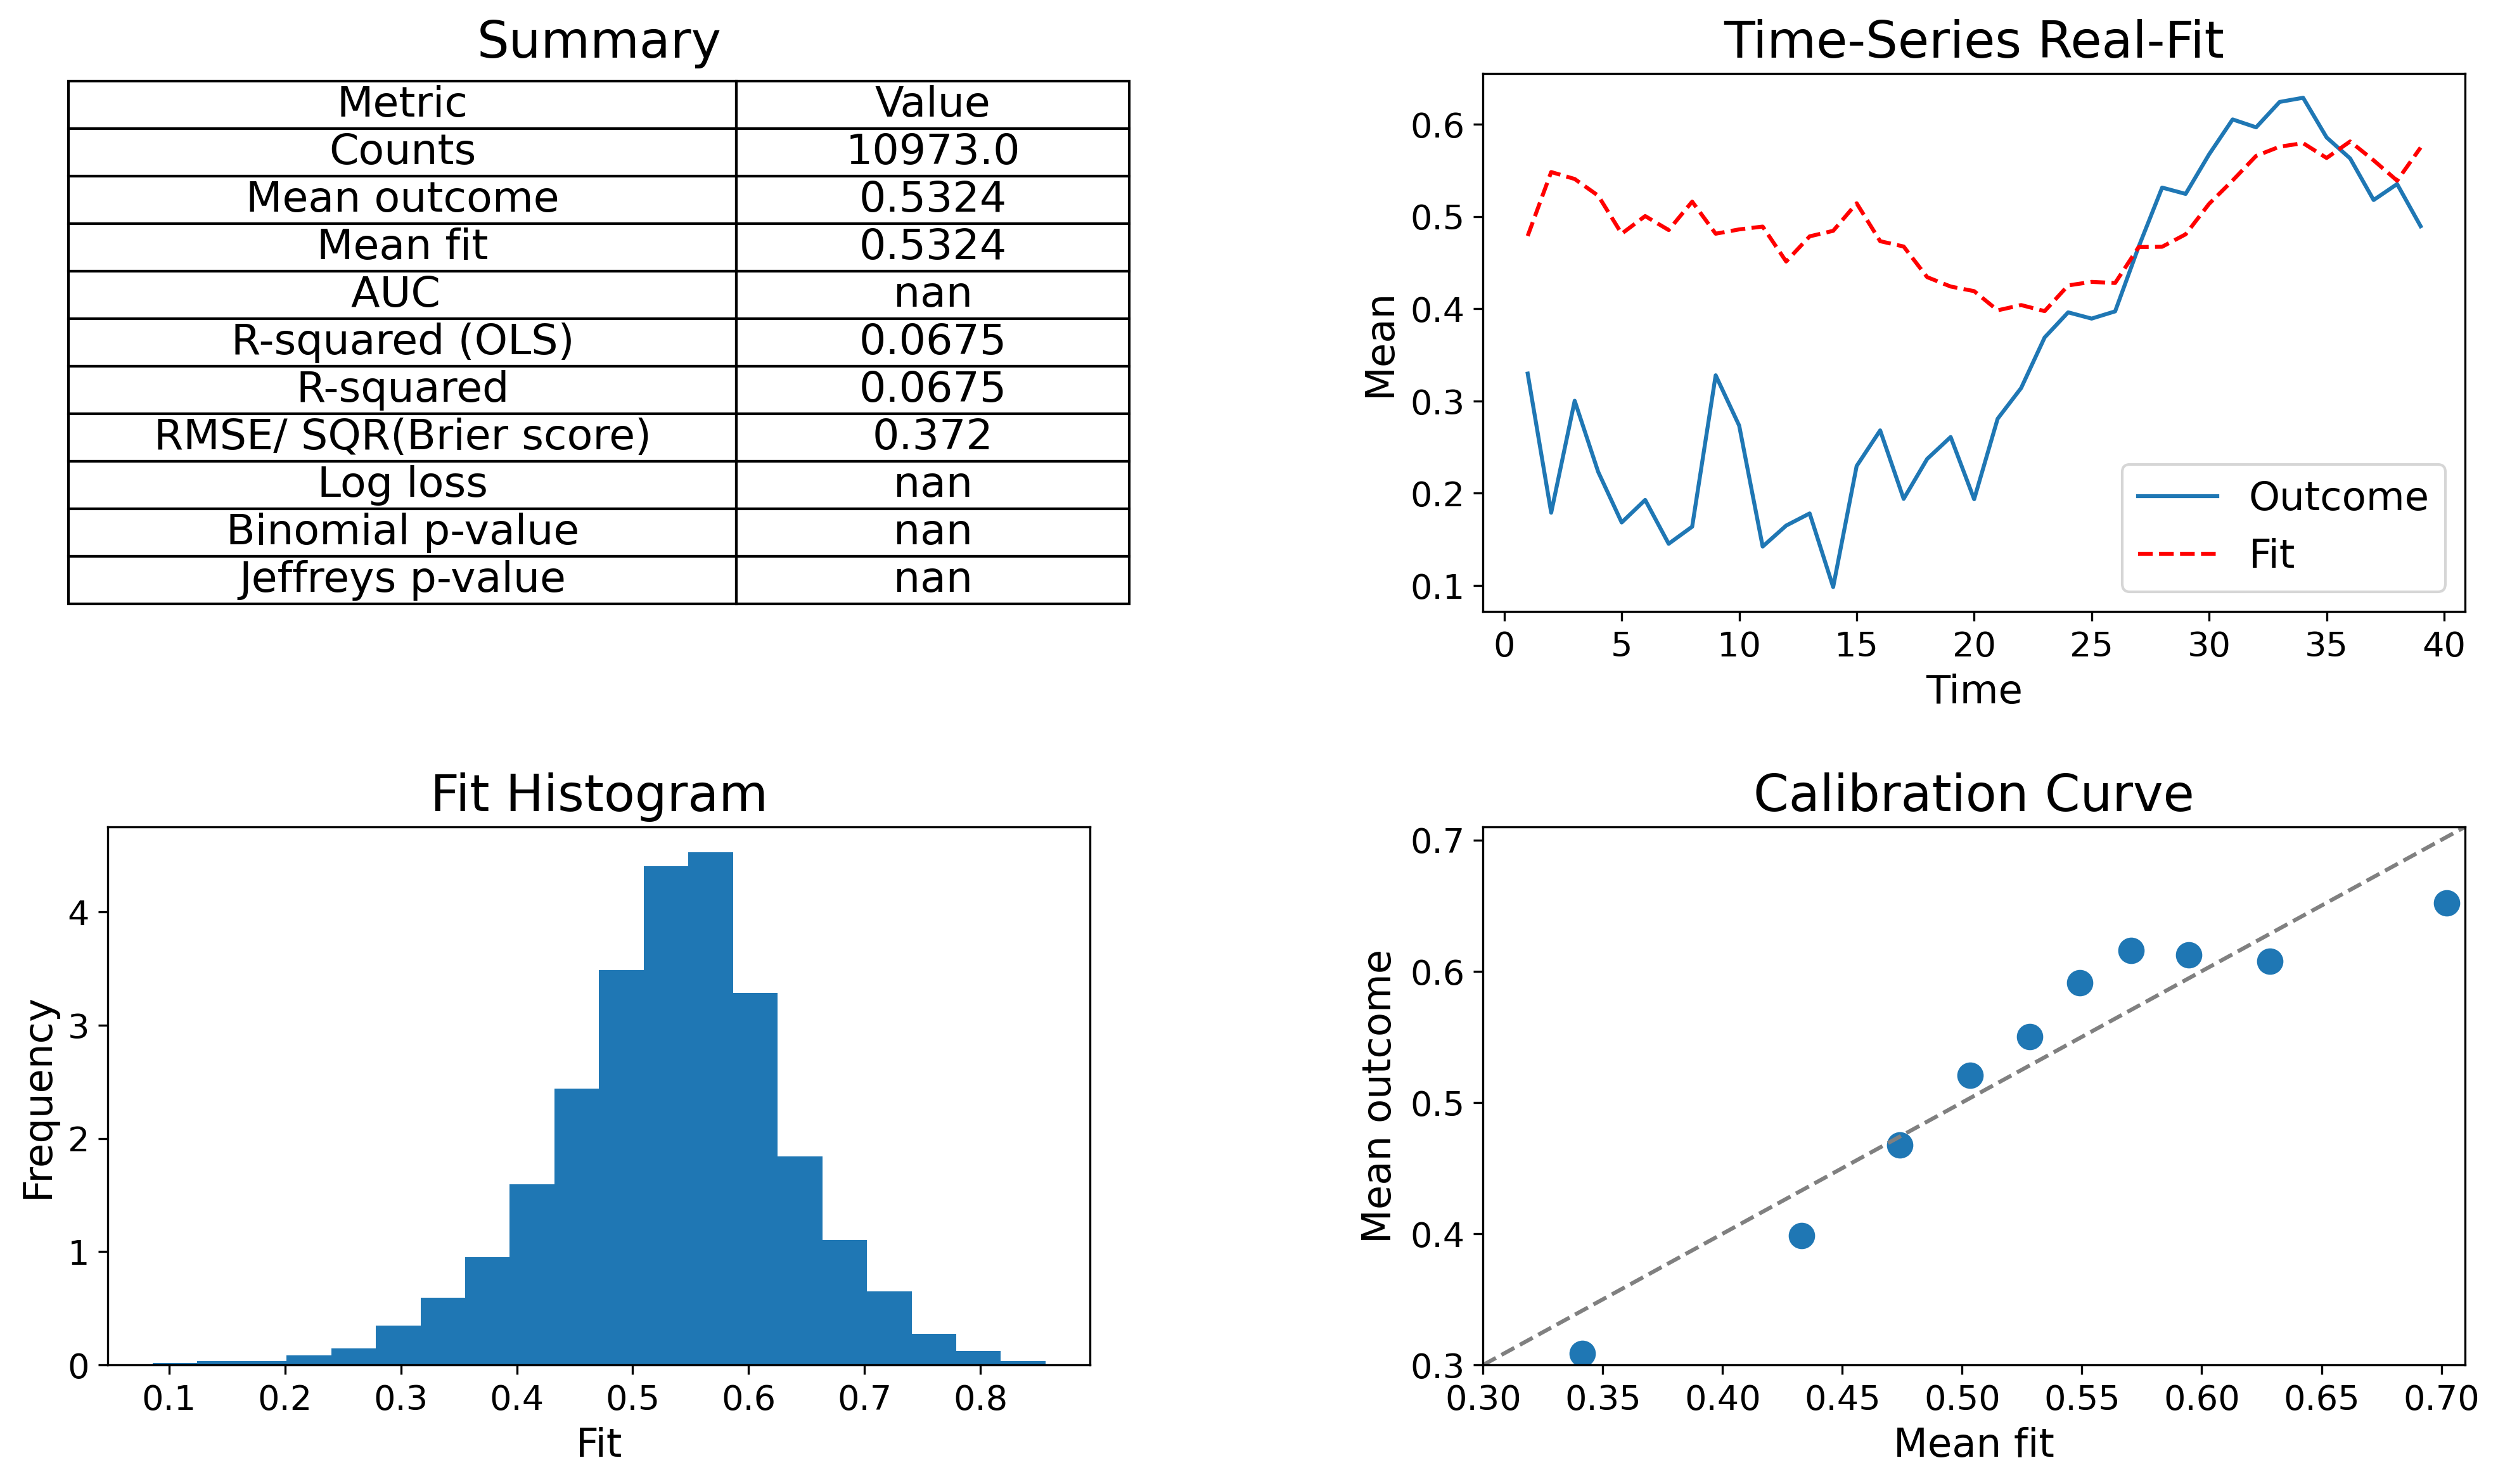

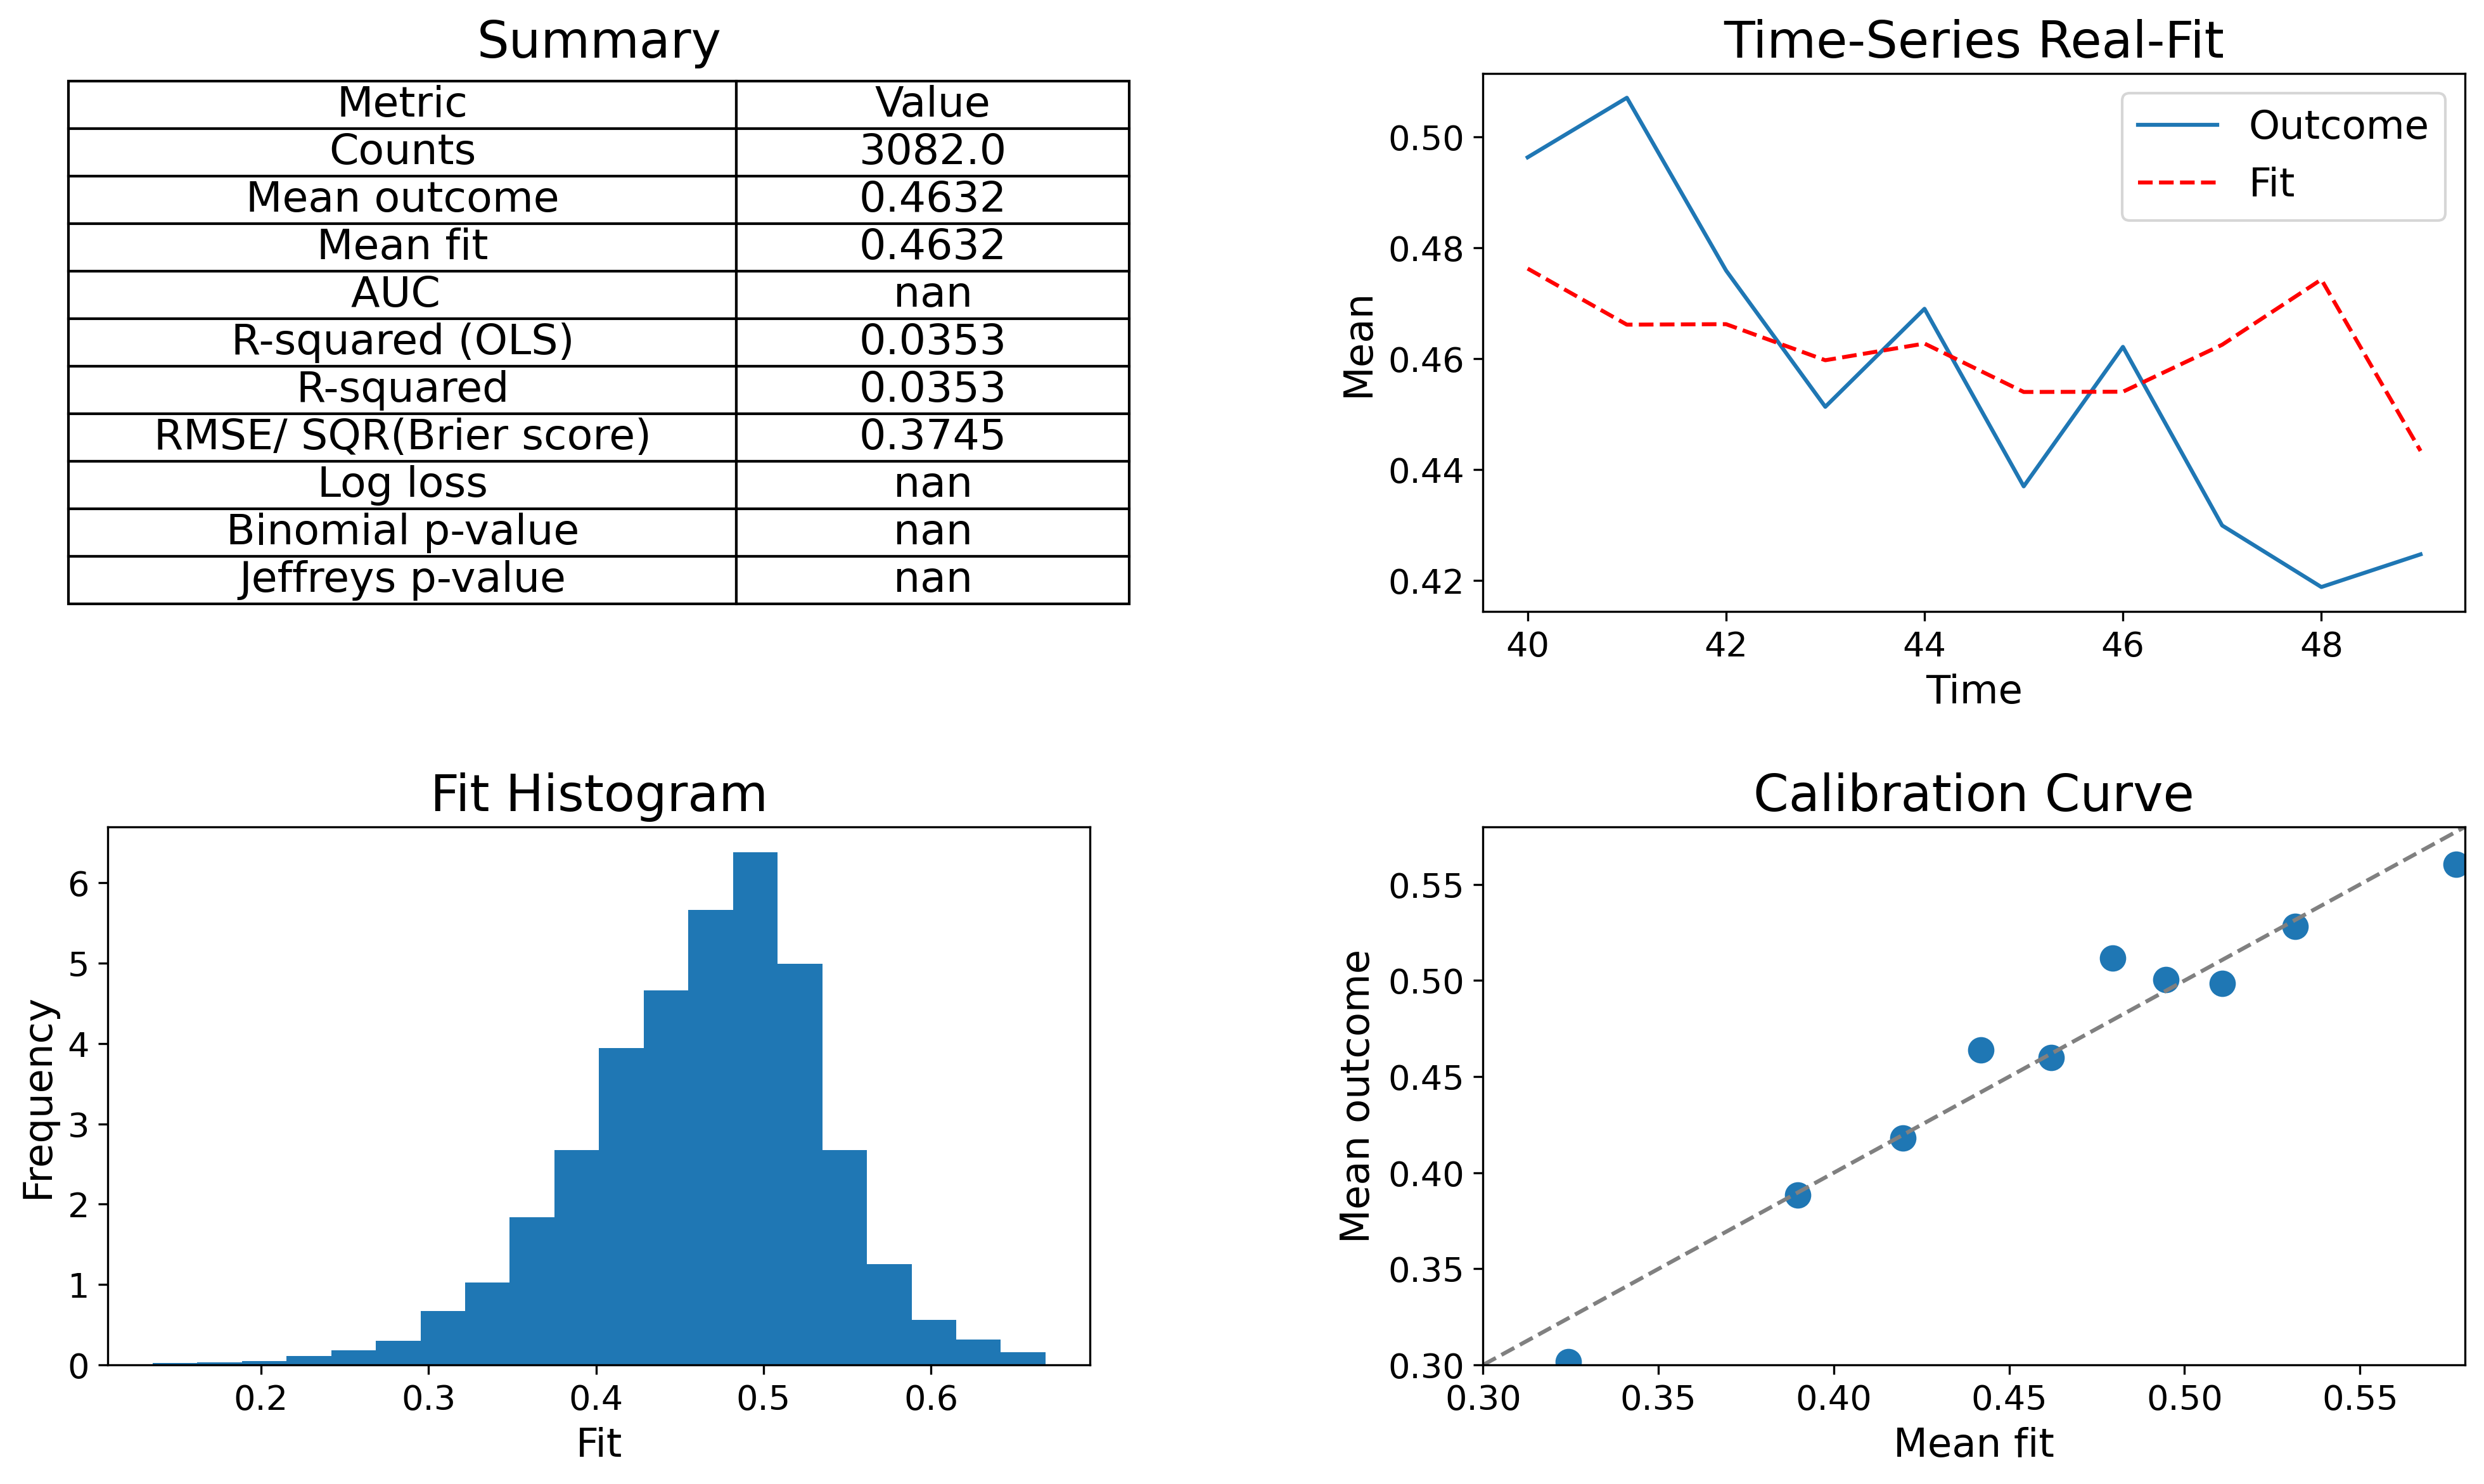

In [172]:
data_default_training2=data_default_training[['lgd_time','LTV_time','cep_time','interest_rate_time','gdp_time','FICO_orig_time']].dropna()
model_ols=smf.ols(formula='lgd_time ~ LTV_time + cep_time + FICO_orig_time + interest_rate_time + gdp_time', data=data_default_training2).fit()

training_fittedvalues= pd.DataFrame(model_ols.predict(data_default_training2), columns=['LGD_fit2'])
data_default_training2=pd.merge(data_default_training,training_fittedvalues,right_index=True,left_index=True)

data_default_test2=data_default_test[['lgd_time', 'LTV_time','interest_rate_time','gdp_time','cep_time','FICO_orig_time']].dropna()
model_ols=smf.ols(formula='lgd_time ~ LTV_time + cep_time + FICO_orig_time + interest_rate_time + gdp_time', data=data_default_test2).fit()
test_fittedvalues= pd.DataFrame(model_ols.predict(data_default_test2), columns=['LGD_fit2'])
data_default_test2=pd.merge(data_default_test,test_fittedvalues,right_index=True,left_index=True)

validation(data_default_training2.LGD_fit2, data_default_training2.lgd_time, data_default_training2.time, continuous=True)
validation(data_default_test2.LGD_fit2, data_default_test2.lgd_time, data_default_test2.time, continuous=True)

In [173]:
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               lgd_time   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     22.51
Date:                Thu, 21 Oct 2021   Prob (F-statistic):           3.09e-22
Time:                        16:14:36   Log-Likelihood:                -1346.2
No. Observations:                3082   AIC:                             2704.
Df Residuals:                    3076   BIC:                             2741.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.2561      0.093     -2.762      0.006      -0.438      -0.074
LTV_time               0.0031      0.000      7.640      0.000       0.002       0.004
cep_time               0.0894      0.176      0.507      0.612      -0.256       0.435
FICO_orig_time         0.0003      0.000      3.273      0.001       0.000       0.001
interest_rate_time     0.0218      0.004      5.132      0.000       0.013       0.030
gdp_time               0.0081      0.011      0.706      0.481      -0.014       0.031
==============================================================================
Omnibus:                      149.084   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.400
Skew:                           0.511   Prob(JB):                     6.71e-40
Kurtosis:                       3.601   Cond. No.                     1.77e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

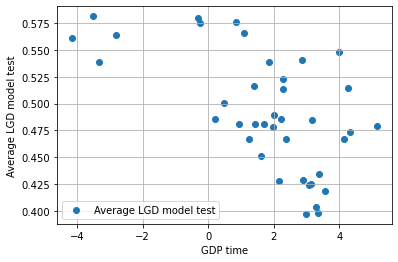

In [507]:
LGD3_average = data_default_training2.groupby('gdp_time')['LGD_fit2'].mean().reset_index(drop=False)

plt.scatter('gdp_time','LGD_fit2', data=LGD3_average, label='Average LGD model test')
plt.xlabel('GDP time')
plt.ylabel('Average LGD model test')
plt.legend(loc='best')
plt.grid(True)
plt.show()

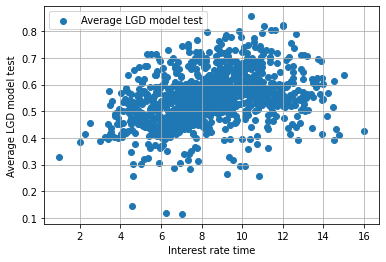

In [504]:
LGD3_average = data_default_training2.groupby('interest_rate_time')['LGD_fit2'].mean().reset_index(drop=False)

plt.scatter('interest_rate_time','LGD_fit2', data=LGD3_average, label='Average LGD model test')
plt.xlabel('Interest rate time')
plt.ylabel('Average LGD model test')
plt.legend(loc='best')
plt.grid(True)
plt.show()

The two additional features are suggested for predicting LGD mortgage, which are interest rate time and GDP over time as these two variables indicate the economic variables affecting the loss rate given default. Logically when there is low interest rate which indicates the government is implementing monetary policy expansionary to increase consumption and investment. The higher GDP indicates the economy is in good situation which might be in the boom period. These two variable features are reasonable to add in the linear regression model to predict LGD. 

The validation of the training and testing model with two additional features shows that the model is quite perfect as the mean outcome and the mean fit are matched. The training model does fit well with the large deviation, and it does not fit well for the periods below 25 as in the time-series chart. The testing model is fit well. 

The intercept which is 𝛽0= -0.2561. The LTV time coefficient is 0.0031 (positive relationship), and the CEP time coefficient is 0.0894 (positive relationship), and the FICO score coefficient is 0.0003, and the interest rate coefficient is 0.0218, and the GDP coefficient is 0,0081. However, the adjusted R^2 for this model which is 0.034 is smaller than the model 3A and 3B. 

From the two charts, it shows the lower GDP implies higher LGD, and the higher interest rate indicates high LGD. 

# QUESTION 4

In [181]:
data_lifetime=data3.query('time == 60').copy()
data_lifetime=data_lifetime.reset_index(drop=True)
data_lifetime.loc[:,'TTM']=data_lifetime.loc[:,'mat_time']-data_lifetime.loc[:,'time']
data_lifetime = data_lifetime.loc[np.repeat(data_lifetime.index.values, data_lifetime.TTM)]
data_lifetime = data_lifetime.reset_index(drop=True)
data_lifetime.loc[:,'time_tmp'] = data_lifetime.groupby(['id']).cumcount()+1
data_lifetime.loc[:,'age'] = data_lifetime.loc[:,'time']-data_lifetime.loc[:,'orig_time']+data_lifetime.loc[:,'time_tmp']
data_lifetime.loc[:,'age2'] = data_lifetime.loc[:,'age'].multiply(data_lifetime.loc[:,'age'])
data_lifetime.loc[:,'time'] = data_lifetime.loc[:,'time']+data_lifetime.loc[:,'time_tmp']
data_lifetime = data_lifetime.rename(columns={'TTM': 'TTM_0','balance_time': 'balance_time_0'})
data_lifetime.loc[:,'TTM'] = data_lifetime.loc[:,'mat_time']-data_lifetime.loc[:,'time']

In [182]:
data_lifetime.loc[:,'annuity'] = ((data_lifetime.loc[:,'interest_rate_time']/(100*4)) * data_lifetime.loc[:,'balance_time_0']) / (1-(1+data_lifetime.loc[:,'interest_rate_time']/(100*4))**(-(data_lifetime.loc[:,'TTM_0'])))
data_lifetime.loc[:,'balance_time'] = data_lifetime.loc[:,'balance_time_0'] * (1+data_lifetime.loc[:,'interest_rate_time']/(100*4))**(data_lifetime.loc[:,'TTM_0'] - data_lifetime.loc[:,'TTM']) - data_lifetime.loc[:,'annuity'] * ((1+data_lifetime.loc[:,'interest_rate_time']/(100*4))**(data_lifetime.loc[:,'TTM_0'] - data_lifetime.loc[:,'TTM'])-1) / (data_lifetime.loc[:,'interest_rate_time']/(100*4))
data_lifetime.loc[:,'EAD_time']=data_lifetime.loc[:,'balance_time']

# Setting I

In [250]:
fittedvalues= pd.DataFrame(LGD_model_ols.fittedvalues, columns=['LGD_linearmodel'])
data_default3=pd.merge(data_default2,fittedvalues,right_index=True,left_index=True)
data_default3

LGD  cep_time    LTV_time  FICO_orig_time  time  LGD_linearmodel
0       0.834064 -0.048461   99.138105             501    37         0.721562
1       0.834064 -0.013756  101.403077             536    37         0.735465
2       0.834064  0.001033   95.242783             503    37         0.729760
3       0.834064 -0.000662  115.682577             567    37         0.789982
4       0.834064 -0.024072  117.399645             654    37         0.752382
...          ...       ...         ...             ...   ...              ...
619326  0.442772  0.016273   90.679429             757    53         0.622604
620807  0.568818 -0.211140  121.888972             683    52         0.664916
621092  0.513494 -0.064848  105.860370             672    55         0.676703
621655  0.324559 -0.008475   83.879828             569    52         0.652616
622011  0.262263 -0.161471  114.559047             676    53         0.662277

[15341 rows x 6 columns]

In [251]:
data_default3.loc[data_default3['LGD_linearmodel'] <= 0, 'LGD_linearmodel'] = 0
data_default3.loc[data_default3['LGD_linearmodel'] >= 1, 'LGD_linearmodel'] = 1

data_lifetime.loc[:,'DLGD_time']=0.08+0.92*data_lifetime.loc[:,'LGD_linearmodel']

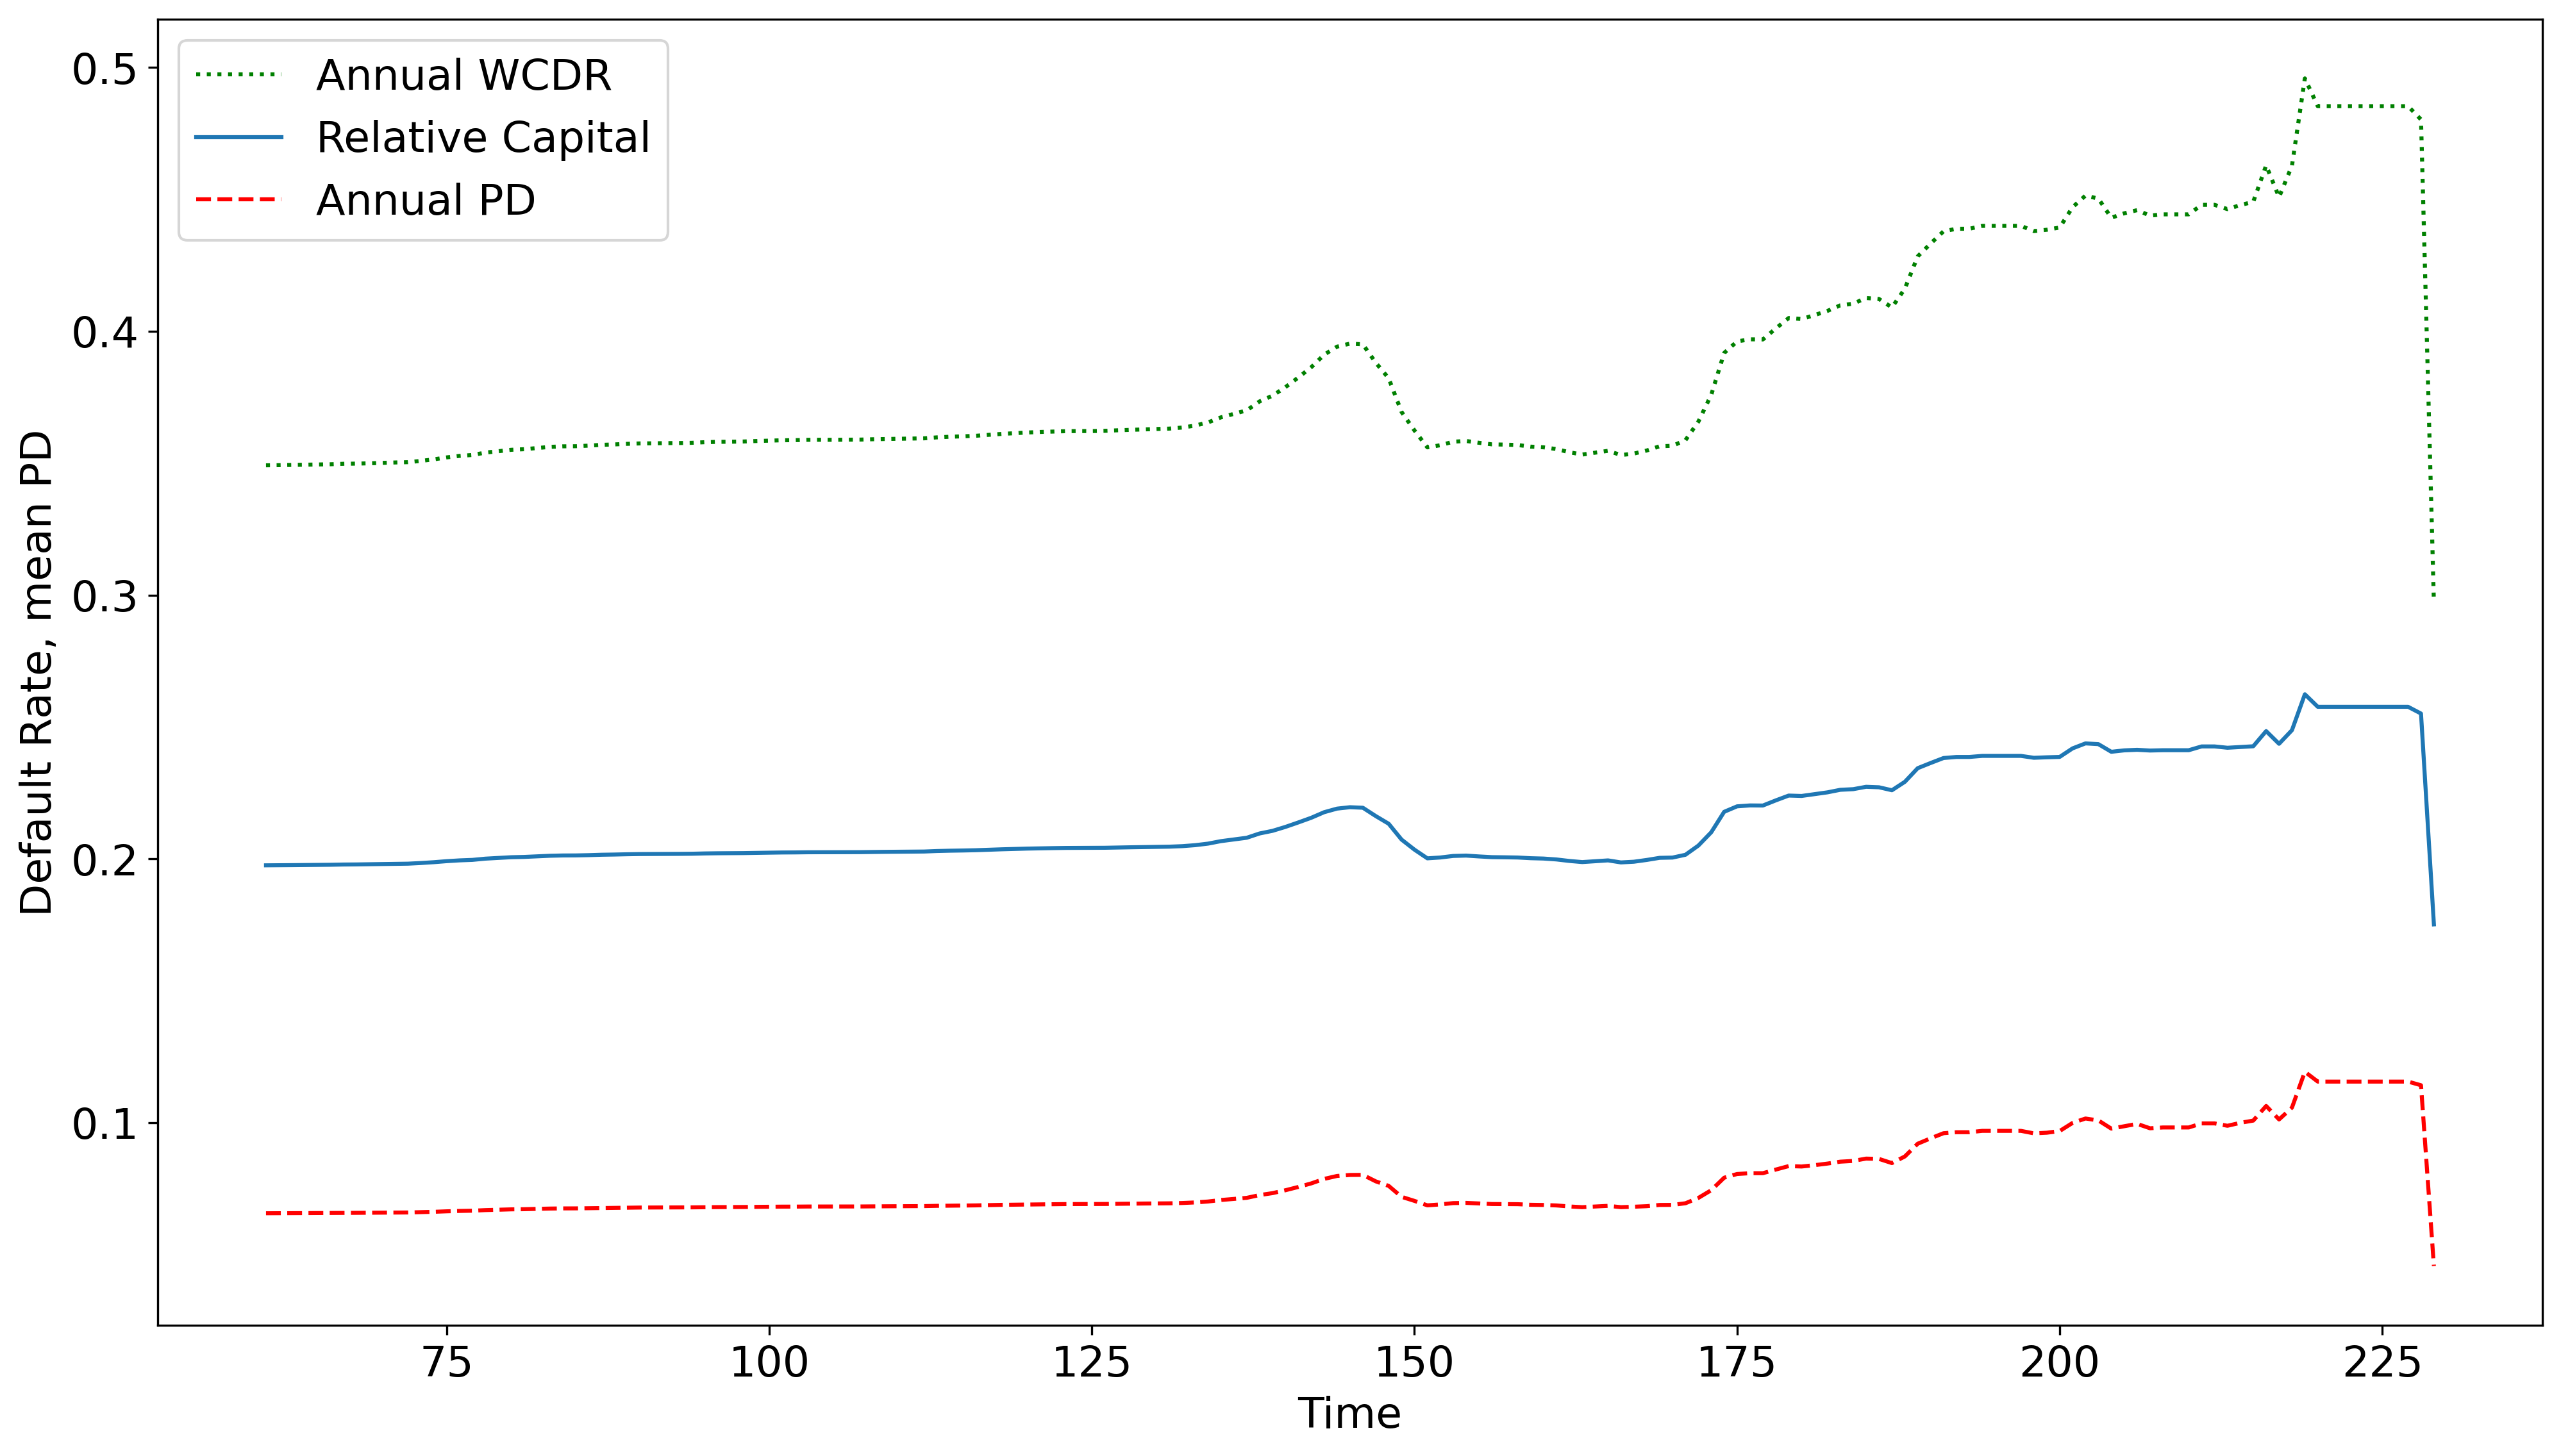

In [252]:
data_lifetime.loc[:,'PD_annual'] = data_lifetime.loc[:,'PD_logistic_model']+(1-data_lifetime.loc[:,'PD_logistic_model'])*data_lifetime.loc[:,'PD_logistic_model']+(1-data_lifetime.loc[:,'PD_logistic_model'])*(1-data_lifetime.loc[:,'PD_logistic_model'])*data_lifetime.loc[:,'PD_logistic_model']+(1-data_lifetime.loc[:,'PD_logistic_model'])*(1-data_lifetime.loc[:,'PD_logistic_model'])*(1-data_lifetime.loc[:,'PD_logistic_model'])*data_lifetime.loc[:,'PD_logistic_model']

data_lifetime.loc[:,'WCDR_annual'] = norm.cdf((norm.ppf(data_lifetime.loc[:,'PD_annual']) + sqrt(0.15) * norm.ppf(0.999)) / sqrt(1-0.15))

data_lifetime.loc[:,'Capital_rel_time']=(data_lifetime.loc[:,'WCDR_annual']-data_lifetime.loc[:,'PD_annual'])*data_lifetime.loc[:,'DLGD_time']
data_lifetime.loc[:,'Capital_abs_time']=(data_lifetime.loc[:,'WCDR_annual']-data_lifetime.loc[:,'PD_annual'])*data_lifetime.loc[:,'DLGD_time']*data_lifetime.loc[:,'EAD_time']

data_mean = data_lifetime.groupby('time')[['Capital_rel_time','PD_annual','WCDR_annual']].mean().reset_index(drop=False)

plt.plot('time','WCDR_annual',data=data_mean,color='green',label='Annual WCDR',linestyle='dotted')
plt.plot('time','Capital_rel_time',data=data_mean,label='Relative Capital')
plt.plot('time','PD_annual',data=data_mean,color='red',label='Annual PD',linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Default Rate, mean PD')
plt.legend(loc='best')
plt.show()

# Setting II

In [265]:
fittedvalues= pd.DataFrame(LGD2_model_ols.fittedvalues, columns=['LGD2_linearmodel'])
data_default4=pd.merge(data_default3,fittedvalues,right_index=True,left_index=True)
data_default4

LGD  cep_time    LTV_time  FICO_orig_time  time  LGD_linearmodel  \
0       0.834064 -0.048461   99.138105             501    37         0.721562   
1       0.834064 -0.013756  101.403077             536    37         0.735465   
2       0.834064  0.001033   95.242783             503    37         0.729760   
3       0.834064 -0.000662  115.682577             567    37         0.789982   
4       0.834064 -0.024072  117.399645             654    37         0.752382   
...          ...       ...         ...             ...   ...              ...   
619326  0.442772  0.016273   90.679429             757    53         0.622604   
620807  0.568818 -0.211140  121.888972             683    52         0.664916   
621092  0.513494 -0.064848  105.860370             672    55         0.676703   
621655  0.324559 -0.008475   83.879828             569    52         0.652616   
622011  0.262263 -0.161471  114.559047             676    53         0.662277   

        LGD2_linearmodel  
0               0.714345  
1               0.753435  
2               0.718272  
3               0.814265  
4               0.763773  
...                  ...  
619326          0.619660  
620807          0.723092  
621092          0.695524  
621655          0.655527  
622011          0.706471  

[15717 rows x 7 columns]

In [268]:
data_default4.loc[data_default4['LGD2_linearmodel'] <= 0, 'LGD2_linearmodel'] = 0
data_default4.loc[data_default4['LGD2_linearmodel'] >= 1, 'LGD2_linearmodel'] = 1

data_lifetime.loc[:,'DLGD2_time']=0.08+0.92*data_lifetime.loc[:,'LGD2_linearmodel']

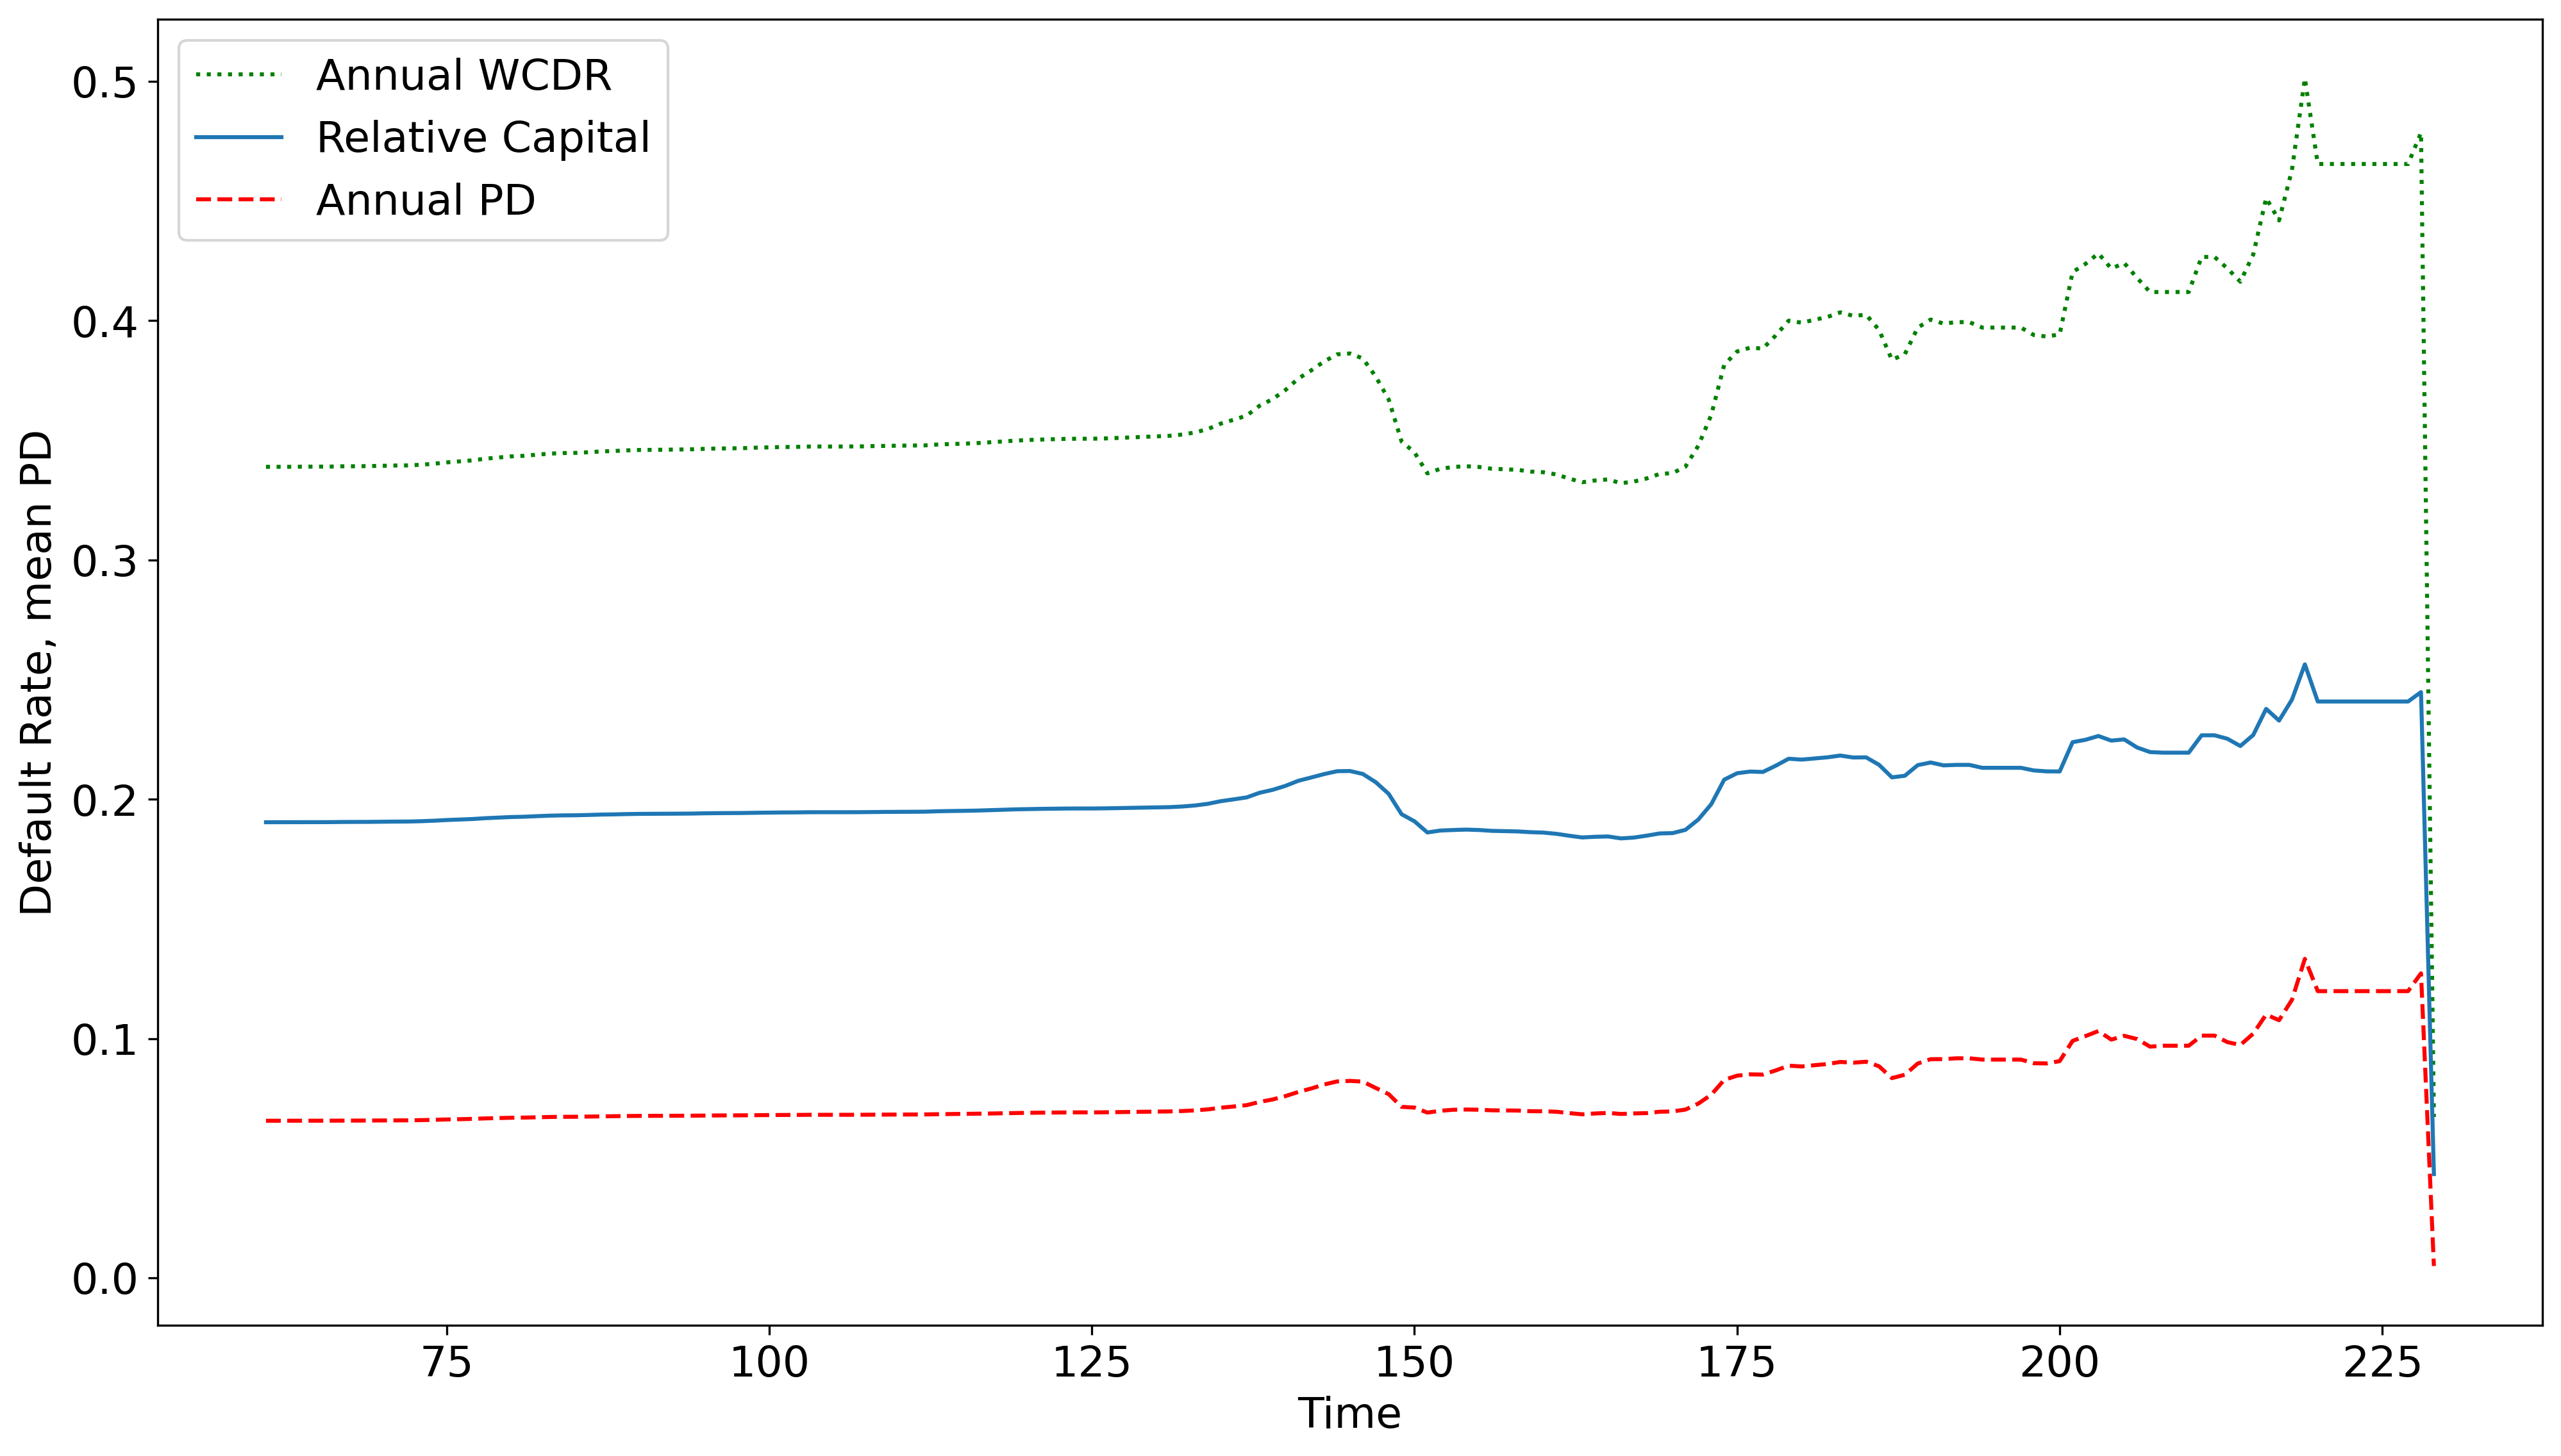

In [269]:
data_lifetime.loc[:,'PD2_annual'] = data_lifetime.loc[:,'PD2_nonlinear']+(1-data_lifetime.loc[:,'PD2_nonlinear'])*data_lifetime.loc[:,'PD2_nonlinear']+(1-data_lifetime.loc[:,'PD2_nonlinear'])*(1-data_lifetime.loc[:,'PD2_nonlinear'])*data_lifetime.loc[:,'PD2_nonlinear']+(1-data_lifetime.loc[:,'PD2_nonlinear'])*(1-data_lifetime.loc[:,'PD2_nonlinear'])*(1-data_lifetime.loc[:,'PD2_nonlinear'])*data_lifetime.loc[:,'PD2_nonlinear']

data_lifetime.loc[:,'WCDR2_annual'] = norm.cdf((norm.ppf(data_lifetime.loc[:,'PD2_annual']) + sqrt(0.15) * norm.ppf(0.999)) / sqrt(1-0.15))

data_lifetime.loc[:,'Capital2_rel_time']=(data_lifetime.loc[:,'WCDR2_annual']-data_lifetime.loc[:,'PD2_annual'])*data_lifetime.loc[:,'DLGD2_time']
data_lifetime.loc[:,'Capital2_abs_time']=(data_lifetime.loc[:,'WCDR2_annual']-data_lifetime.loc[:,'PD2_annual'])*data_lifetime.loc[:,'DLGD2_time']*data_lifetime.loc[:,'EAD_time']

data_mean = data_lifetime.groupby('time')[['Capital2_rel_time','PD2_annual','WCDR2_annual']].mean().reset_index(drop=False)

plt.plot('time','WCDR2_annual',data=data_mean,color='green',label='Annual WCDR',linestyle='dotted')
plt.plot('time','Capital2_rel_time',data=data_mean,label='Relative Capital')
plt.plot('time','PD2_annual',data=data_mean,color='red',label='Annual PD',linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Default Rate, mean PD')
plt.legend(loc='best')
plt.show()

In the setting I, the PDs are inferred from the model 2A and LGDs are inferred from the model 3A. 
In the setting II, the PDs are inferred from the model 2B and LGDs are inferred from the model 3B.
The Basel capital ratio measures the Credit value at risk with the formula: 𝐶𝑉𝑎𝑅=(𝑊𝐶𝐷𝑅−𝑃𝐷)∗𝐷𝐿𝐺𝐷∗𝐷𝐸𝐴𝐷. The Downturn LGD is assumed as the following function DLGD: 0.08+0.092* LGD which US regulators apply for bank. The correlation is assumed at 15%. The Basel capital for mortgages is the result of multiplying then annual WCPD with the Downturn LGD and the Downturn EAD.

The chart in the setting I and setting II shows the annual WCDR, relative capital ratio and annual PD of the default rate and mean PD throughout the time series. The annual WCDR indicates the worst case of default rate (green line). The capital adequacy is calculated by the difference between the annual WCDR and the annual PD with the Downturn LGD. The relative capital in this setting is at the stable default rate of 0.2%, and it is higher from the period 175. In the setting II, the default rate is more fluctuate from period 175, whereas the default rate is quite smooth in the setting I. 


# QUESTION 5

In [92]:
data.head()

id  time  orig_time  first_time  mat_time  res_time  balance_time  \
0   1    25         -7          25       113       NaN      41303.42   
1   1    26         -7          25       113       NaN      41061.95   
2   1    27         -7          25       113       NaN      40804.42   
3   1    28         -7          25       113       NaN      40483.89   
4   1    29         -7          25       113       NaN      40367.06   

    LTV_time  interest_rate_time  rate_time  ...  FICO_orig_time_cat  \
0  24.498336                 9.2       5.44  ...                   7   
1  24.483867                 9.2       5.44  ...                   7   
2  24.626795                 9.2       5.44  ...                   7   
3  24.735883                 9.2       5.44  ...                   7   
4  24.925476                 9.2       5.44  ...                   7   

   LTV_time_p1  LTV_time_p2   LTV_time_p3  FICO_orig_time_p1  \
0    24.498336   600.168479  14703.129215                715   
1    24.483867   599.459753  14677.092966                715   
2    24.626795   606.479030  14935.634716                715   
3    24.735883   611.863931  15134.994901                715   
4    24.925476   621.279337  15485.683008                715   

   FICO_orig_time_p2  FICO_orig_time_p3  cep_time_p1  cep_time_p2  \
0             511225          365525875     0.004782     0.000023   
1             511225          365525875     0.005734     0.000033   
2             511225          365525875     0.006812     0.000046   
3             511225          365525875     0.008486     0.000072   
4             511225          365525875     0.008087     0.000065   

    cep_time_p3  
0  1.093656e-07  
1  1.884851e-07  
2  3.160867e-07  
3  6.110538e-07  
4  5.289814e-07  

[5 rows x 46 columns]

In [93]:
model_lr = smf.ols(formula='interest_rate_time~ LTV_time + FICO_orig_time + cep_time', data=data).fit()
print(model_lr.summary())

                            OLS Regression Results                            
Dep. Variable:     interest_rate_time   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                 5.385e+04
Date:                Mon, 25 Oct 2021   Prob (F-statistic):               0.00
Time:                        02:48:34   Log-Likelihood:            -1.2659e+06
No. Observations:              622194   AIC:                         2.532e+06
Df Residuals:                  622190   BIC:                         2.532e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         14.4592      0.024    613.

In [94]:
interest_rate_estimation= pd.DataFrame(model_lr.fittedvalues,columns=['interest_rate_estimation'])
data5 = pd.merge(data, interest_rate_estimation, right_index=True, left_index=True)
data5

id  time  orig_time  first_time  mat_time  res_time  balance_time  \
0           1    25         -7          25       113       NaN      41303.42   
1           1    26         -7          25       113       NaN      41061.95   
2           1    27         -7          25       113       NaN      40804.42   
3           1    28         -7          25       113       NaN      40483.89   
4           1    29         -7          25       113       NaN      40367.06   
...       ...   ...        ...         ...       ...       ...           ...   
622484  50000    56         16          52       177       NaN     517107.42   
622485  50000    57         16          52       177       NaN     512274.57   
622486  50000    58         16          52       177       NaN     507396.72   
622487  50000    59         16          52       177       NaN     502478.87   
622488  50000    60         16          52       177       NaN     497521.35   

         LTV_time  interest_rate_time  rate_time  ...  LTV_time_p1  \
0       24.498336               9.200       5.44  ...    24.498336   
1       24.483867               9.200       5.44  ...    24.483867   
2       24.626795               9.200       5.44  ...    24.626795   
3       24.735883               9.200       5.44  ...    24.735883   
4       24.925476               9.200       5.44  ...    24.925476   
...           ...                 ...        ...  ...          ...   
622484  57.659403               2.664       3.86  ...    57.659403   
622485  55.359916               2.652       3.86  ...    55.359916   
622486  54.492206               2.644       3.86  ...    54.492206   
622487  54.171106               2.638       3.86  ...    54.171106   
622488  53.023479               2.635       3.86  ...    53.023479   

        LTV_time_p2    LTV_time_p3  FICO_orig_time_p1  FICO_orig_time_p2  \
0        600.168479   14703.129215                715             511225   
1        599.459753   14677.092966                715             511225   
2        606.479030   14935.634716                715             511225   
3        611.863931   15134.994901                715             511225   
4        621.279337   15485.683008                715             511225   
...             ...            ...                ...                ...   
622484  3324.606705  191694.836395                653             426409   
622485  3064.720297  169662.658134                653             426409   
622486  2969.400476  161809.181401                653             426409   
622487  2934.508748  158965.585036                653             426409   
622488  2811.489364  149074.948267                653             426409   

        FICO_orig_time_p3  cep_time_p1  cep_time_p2   cep_time_p3  \
0               365525875     0.004782     0.000023  1.093656e-07   
1               365525875     0.005734     0.000033  1.884851e-07   
2               365525875     0.006812     0.000046  3.160867e-07   
3               365525875     0.008486     0.000072  6.110538e-07   
4               365525875     0.008087     0.000065  5.289814e-07   
...                   ...          ...          ...           ...   
622484          278445077     0.053323     0.002843  1.516163e-04   
622485          278445077     0.055255     0.003053  1.687034e-04   
622486          278445077     0.057301     0.003283  1.881432e-04   
622487          278445077     0.059412     0.003530  2.097075e-04   
622488          278445077     0.061614     0.003796  2.339081e-04   

        interest_rate_estimation  
0                       6.108516  
1                       6.114111  
2                       6.120996  
3                       6.131298  
4                       6.129581  
...                          ...  
622484                  7.243364  
622485                  7.246989  
622486                  7.256167  
622487                  7.267593  
622488                  7.276749  

[622194 rows x 47 columns]

In [95]:
unseen_data = {"LTV_time": [80],"cep_time":[0],"FICO_orig_time": [700]}
display(data5)
data5 = pd.DataFrame(data=unseen_data)
model_lr.predict(data5)

id  time  orig_time  first_time  mat_time  res_time  balance_time  \
0           1    25         -7          25       113       NaN      41303.42   
1           1    26         -7          25       113       NaN      41061.95   
2           1    27         -7          25       113       NaN      40804.42   
3           1    28         -7          25       113       NaN      40483.89   
4           1    29         -7          25       113       NaN      40367.06   
...       ...   ...        ...         ...       ...       ...           ...   
622484  50000    56         16          52       177       NaN     517107.42   
622485  50000    57         16          52       177       NaN     512274.57   
622486  50000    58         16          52       177       NaN     507396.72   
622487  50000    59         16          52       177       NaN     502478.87   
622488  50000    60         16          52       177       NaN     497521.35   

         LTV_time  interest_rate_time  rate_time  ...  LTV_time_p1  \
0       24.498336               9.200       5.44  ...    24.498336   
1       24.483867               9.200       5.44  ...    24.483867   
2       24.626795               9.200       5.44  ...    24.626795   
3       24.735883               9.200       5.44  ...    24.735883   
4       24.925476               9.200       5.44  ...    24.925476   
...           ...                 ...        ...  ...          ...   
622484  57.659403               2.664       3.86  ...    57.659403   
622485  55.359916               2.652       3.86  ...    55.359916   
622486  54.492206               2.644       3.86  ...    54.492206   
622487  54.171106               2.638       3.86  ...    54.171106   
622488  53.023479               2.635       3.86  ...    53.023479   

        LTV_time_p2    LTV_time_p3  FICO_orig_time_p1  FICO_orig_time_p2  \
0        600.168479   14703.129215                715             511225   
1        599.459753   14677.092966                715             511225   
2        606.479030   14935.634716                715             511225   
3        611.863931   15134.994901                715             511225   
4        621.279337   15485.683008                715             511225   
...             ...            ...                ...                ...   
622484  3324.606705  191694.836395                653             426409   
622485  3064.720297  169662.658134                653             426409   
622486  2969.400476  161809.181401                653             426409   
622487  2934.508748  158965.585036                653             426409   
622488  2811.489364  149074.948267                653             426409   

        FICO_orig_time_p3  cep_time_p1  cep_time_p2   cep_time_p3  \
0               365525875     0.004782     0.000023  1.093656e-07   
1               365525875     0.005734     0.000033  1.884851e-07   
2               365525875     0.006812     0.000046  3.160867e-07   
3               365525875     0.008486     0.000072  6.110538e-07   
4               365525875     0.008087     0.000065  5.289814e-07   
...                   ...          ...          ...           ...   
622484          278445077     0.053323     0.002843  1.516163e-04   
622485          278445077     0.055255     0.003053  1.687034e-04   
622486          278445077     0.057301     0.003283  1.881432e-04   
622487          278445077     0.059412     0.003530  2.097075e-04   
622488          278445077     0.061614     0.003796  2.339081e-04   

        interest_rate_estimation  
0                       6.108516  
1                       6.114111  
2                       6.120996  
3                       6.131298  
4                       6.129581  
...                          ...  
622484                  7.243364  
622485                  7.246989  
622486                  7.256167  
622487                  7.267593  
622488                  7.276749  

[622194 rows x 47 columns]

0    6.446899
dtype: float64

Assuming that those following features are LTV_time =80, cep_time=0, FICO_orig_time=700 to compute the appropriate interest rate for a borrower with these assuming features. The model prediction is using linear regression model to forecast interest rate, and the independent variables are LTV time, CEP time and FICO score. From the model, the appropriate interest rate is 6.699111

# QUESTION 6

# a) 

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 622489 entries, 0 to 622488
Data columns (total 46 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       622489 non-null  int64  
 1   time                     622489 non-null  int64  
 2   orig_time                622489 non-null  int64  
 3   first_time               622489 non-null  int64  
 4   mat_time                 622489 non-null  int64  
 5   res_time                 11434 non-null   float64
 6   balance_time             622489 non-null  float64
 7   LTV_time                 622219 non-null  float64
 8   interest_rate_time       622489 non-null  float64
 9   rate_time                622489 non-null  float64
 10  hpi_time                 622489 non-null  float64
 11  gdp_time                 622489 non-null  float64
 12  uer_time                 622489 non-null  float64
 13  REtype_CO_orig_time      622489 non-null  int64  
 14  REty

In [97]:
data6 = data[['gdp_time','time','uer_time','interest_rate_time']]
data6

gdp_time  time  uer_time  interest_rate_time
0       2.899137    25       4.7               9.200
1       2.151365    26       4.7               9.200
2       2.361722    27       4.4               9.200
3       1.229172    28       4.6               9.200
4       1.692969    29       4.5               9.200
...          ...   ...       ...                 ...
622484  1.717053    56       6.6               2.664
622485  2.556052    57       6.2               2.652
622486  2.868594    58       6.2               2.644
622487  2.443648    59       5.7               2.638
622488  2.836358    60       5.7               2.635

[622489 rows x 4 columns]

In [98]:
loan_pricing = smf.ols(formula='interest_rate_time~ gdp_time + time + uer_time', data=data6).fit()
print(loan_pricing.summary())

                            OLS Regression Results                            
Dep. Variable:     interest_rate_time   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                 3.445e+04
Date:                Mon, 25 Oct 2021   Prob (F-statistic):               0.00
Time:                        02:48:39   Log-Likelihood:            -1.2911e+06
No. Observations:              622489   AIC:                         2.582e+06
Df Residuals:                  622485   BIC:                         2.582e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.4650      0.010    918.457      0.0

In [99]:
interest_rate = pd.DataFrame(loan_pricing.fittedvalues,columns=['interest_rate'])
data6 = pd.merge(data, interest_rate, right_index=True, left_index=True)
data6

id  time  orig_time  first_time  mat_time  res_time  balance_time  \
0           1    25         -7          25       113       NaN      41303.42   
1           1    26         -7          25       113       NaN      41061.95   
2           1    27         -7          25       113       NaN      40804.42   
3           1    28         -7          25       113       NaN      40483.89   
4           1    29         -7          25       113       NaN      40367.06   
...       ...   ...        ...         ...       ...       ...           ...   
622484  50000    56         16          52       177       NaN     517107.42   
622485  50000    57         16          52       177       NaN     512274.57   
622486  50000    58         16          52       177       NaN     507396.72   
622487  50000    59         16          52       177       NaN     502478.87   
622488  50000    60         16          52       177       NaN     497521.35   

         LTV_time  interest_rate_time  rate_time  ...  LTV_time_p1  \
0       24.498336               9.200       5.44  ...    24.498336   
1       24.483867               9.200       5.44  ...    24.483867   
2       24.626795               9.200       5.44  ...    24.626795   
3       24.735883               9.200       5.44  ...    24.735883   
4       24.925476               9.200       5.44  ...    24.925476   
...           ...                 ...        ...  ...          ...   
622484  57.659403               2.664       3.86  ...    57.659403   
622485  55.359916               2.652       3.86  ...    55.359916   
622486  54.492206               2.644       3.86  ...    54.492206   
622487  54.171106               2.638       3.86  ...    54.171106   
622488  53.023479               2.635       3.86  ...    53.023479   

        LTV_time_p2    LTV_time_p3  FICO_orig_time_p1  FICO_orig_time_p2  \
0        600.168479   14703.129215                715             511225   
1        599.459753   14677.092966                715             511225   
2        606.479030   14935.634716                715             511225   
3        611.863931   15134.994901                715             511225   
4        621.279337   15485.683008                715             511225   
...             ...            ...                ...                ...   
622484  3324.606705  191694.836395                653             426409   
622485  3064.720297  169662.658134                653             426409   
622486  2969.400476  161809.181401                653             426409   
622487  2934.508748  158965.585036                653             426409   
622488  2811.489364  149074.948267                653             426409   

        FICO_orig_time_p3  cep_time_p1  cep_time_p2   cep_time_p3  \
0               365525875     0.004782     0.000023  1.093656e-07   
1               365525875     0.005734     0.000033  1.884851e-07   
2               365525875     0.006812     0.000046  3.160867e-07   
3               365525875     0.008486     0.000072  6.110538e-07   
4               365525875     0.008087     0.000065  5.289814e-07   
...                   ...          ...          ...           ...   
622484          278445077     0.053323     0.002843  1.516163e-04   
622485          278445077     0.055255     0.003053  1.687034e-04   
622486          278445077     0.057301     0.003283  1.881432e-04   
622487          278445077     0.059412     0.003530  2.097075e-04   
622488          278445077     0.061614     0.003796  2.339081e-04   

        interest_rate  
0            7.259363  
1            7.301575  
2            7.228333  
3            7.312338  
4            7.192495  
...               ...  
622484       5.411829  
622485       5.257269  
622486       5.152626  
622487       5.178873  
622488       5.063127  

[622489 rows x 47 columns]

In [100]:
print(data6[['interest_rate']].describe().round(3))

       interest_rate
count     622489.000
mean           6.702
std            0.785
min            5.063
25%            5.954
50%            7.050
75%            7.295
max            8.776


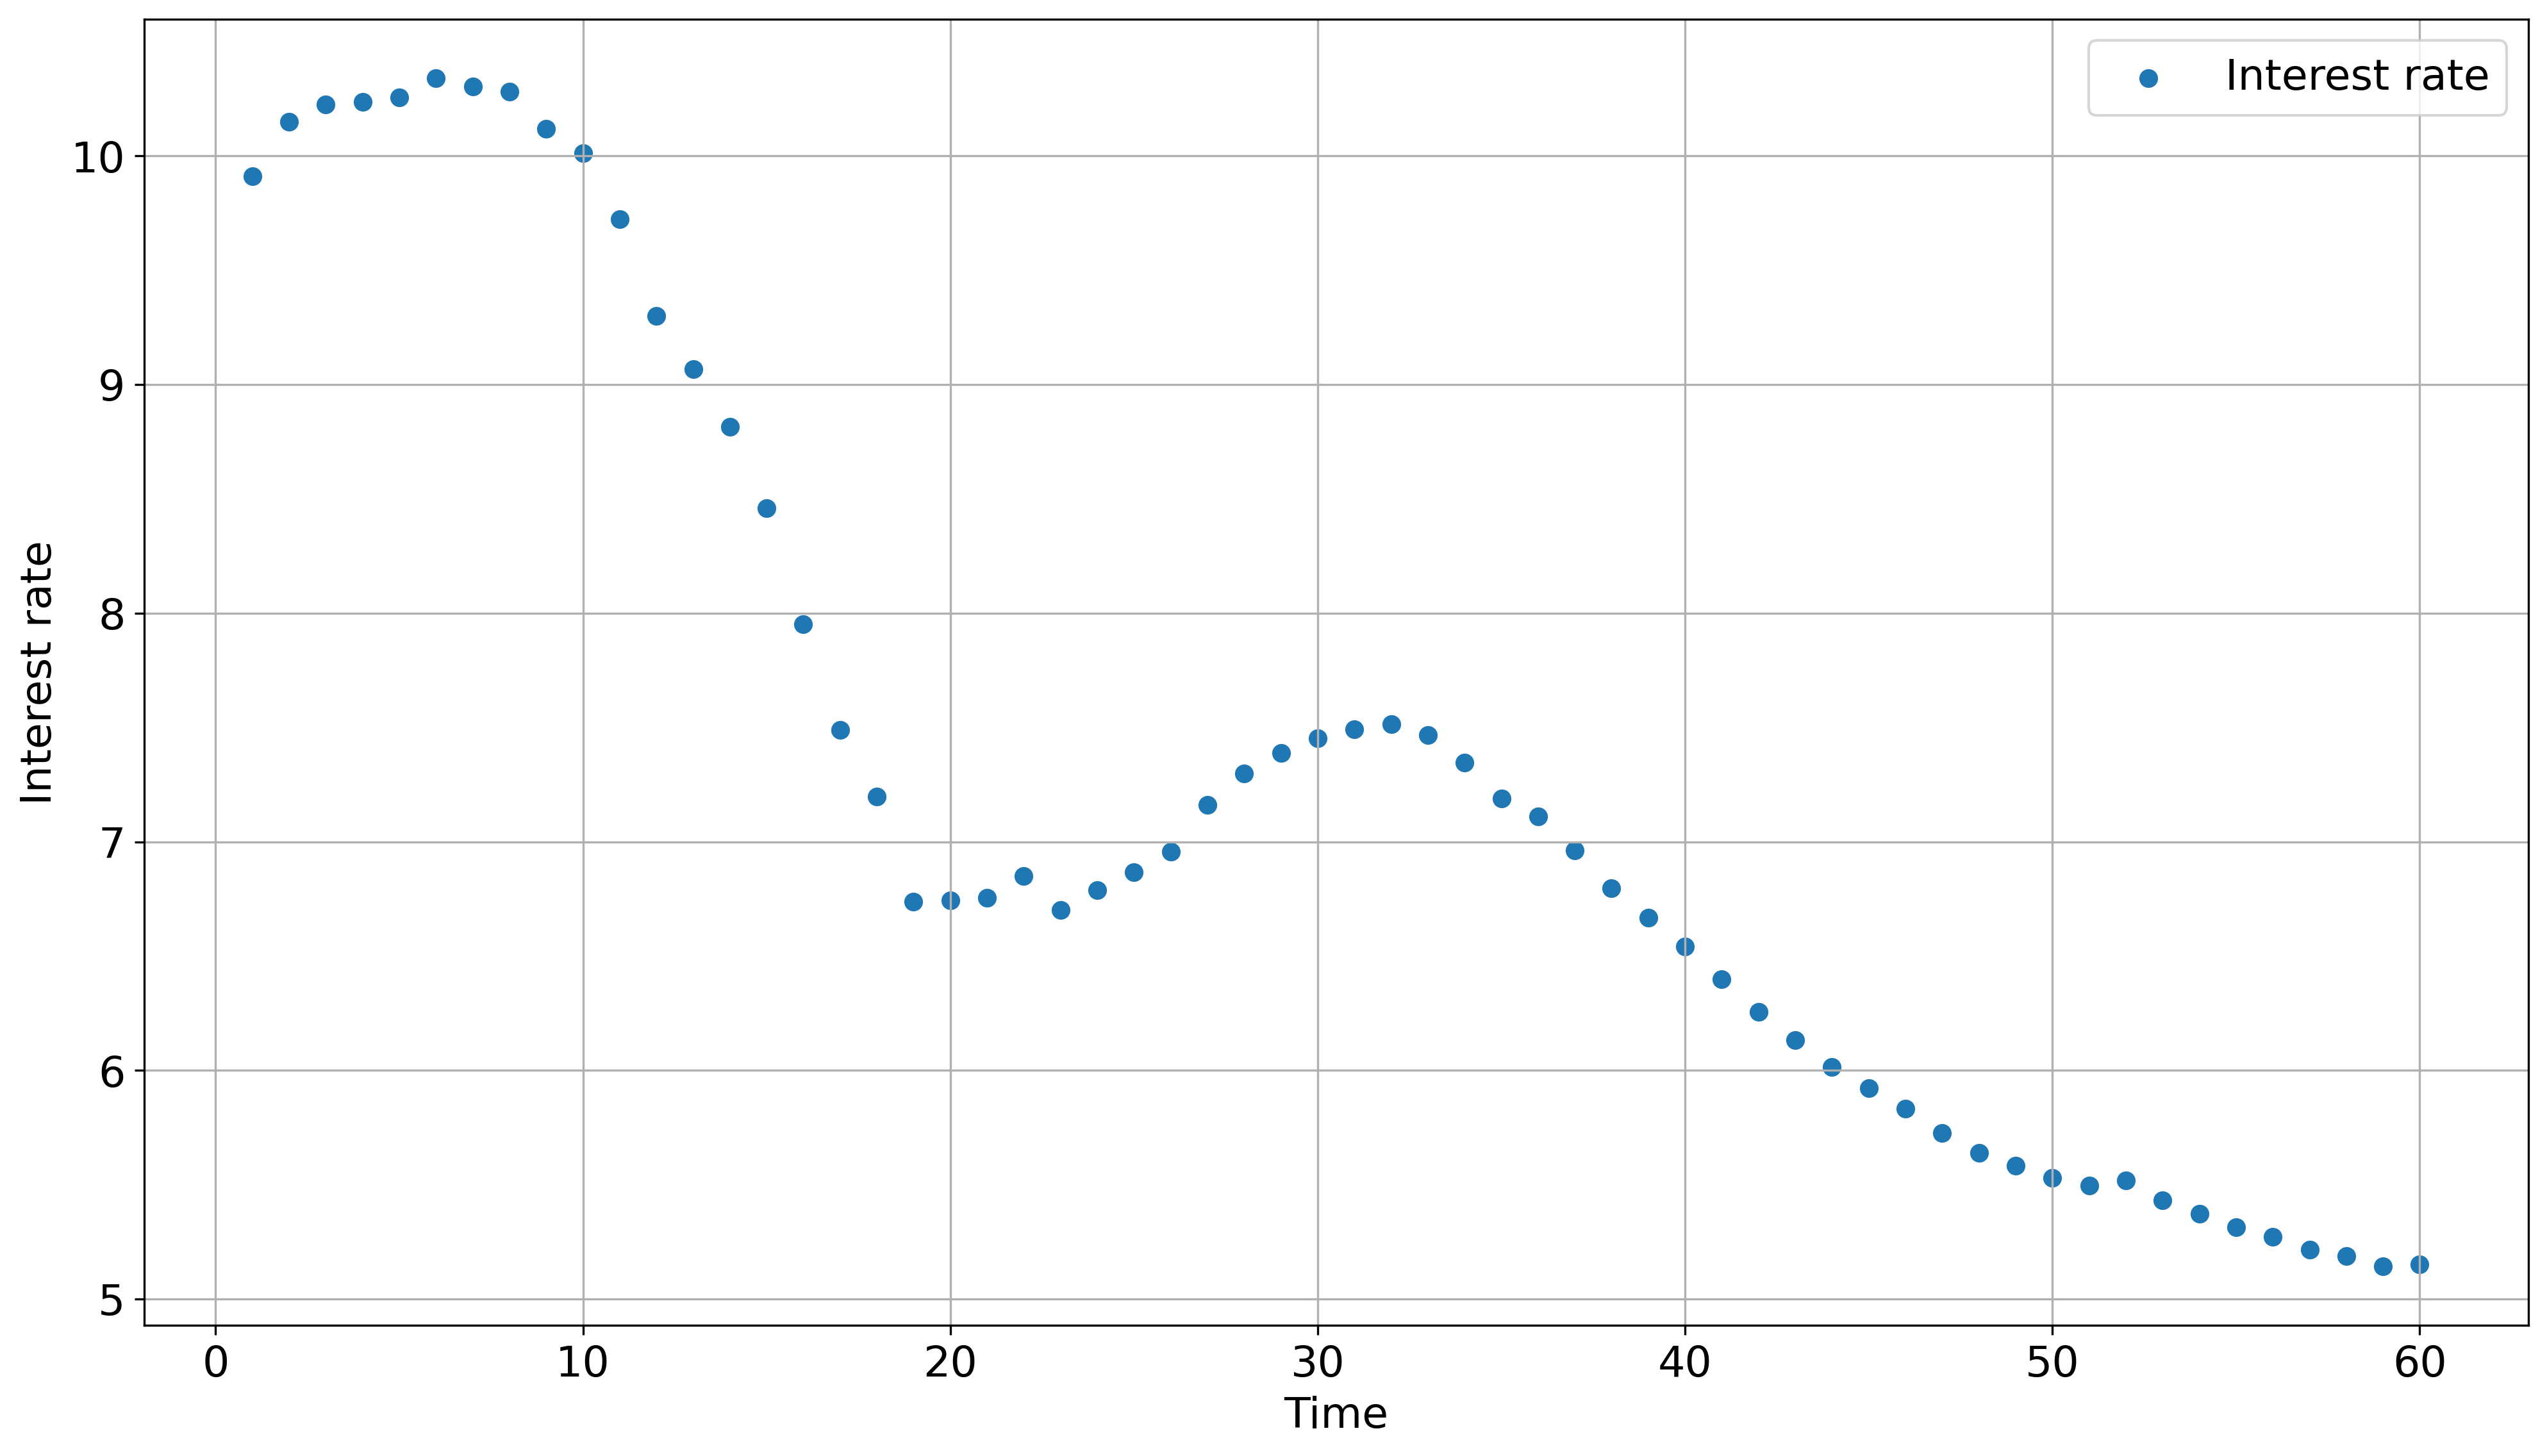

In [101]:
loan_pricing_mean = data6.groupby('time')['interest_rate_time'].mean().reset_index(drop=False)

plt.scatter('time','interest_rate_time', data=loan_pricing_mean, label='Interest rate')
plt.xlabel('Time')
plt.ylabel('Interest rate')
plt.legend(loc='best')
plt.grid(True)
plt.show()

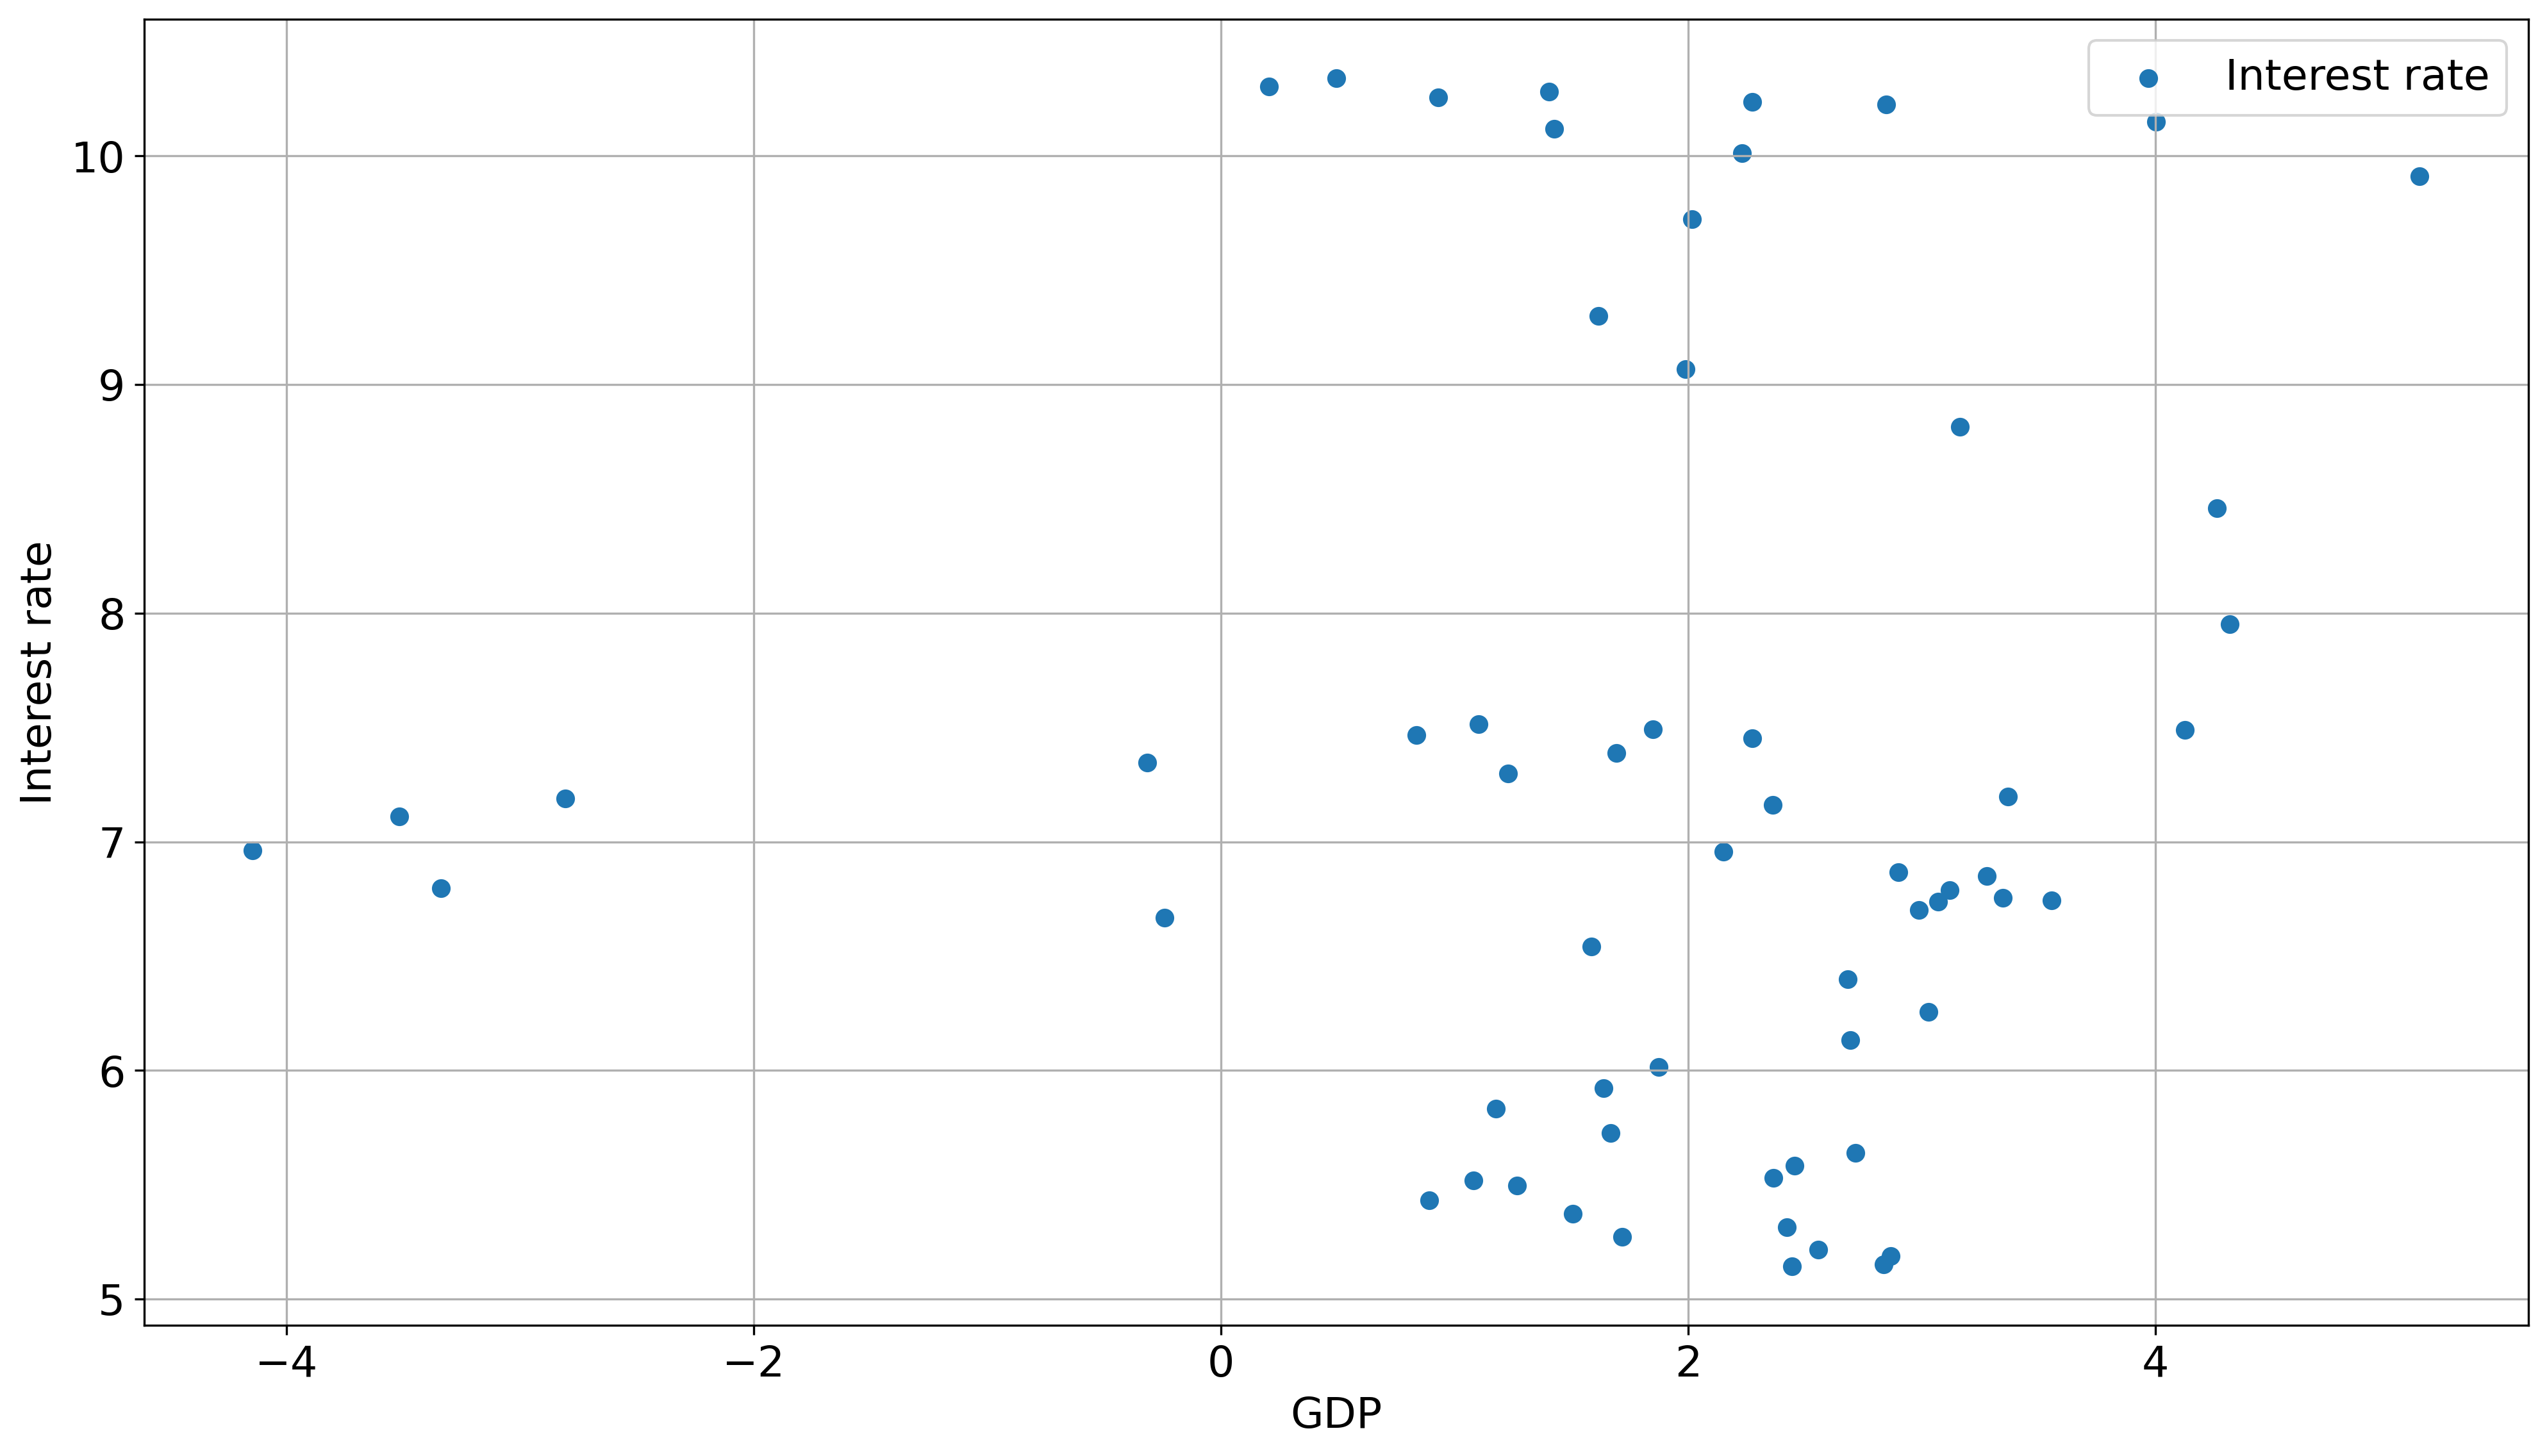

In [102]:
loan_pricing_mean = data6.groupby('gdp_time')['interest_rate_time'].mean().reset_index(drop=False)

plt.scatter('gdp_time','interest_rate_time', data=loan_pricing_mean, label='Interest rate')
plt.xlabel('GDP')
plt.ylabel('Interest rate')
plt.legend(loc='best')
plt.grid(True)
plt.show()

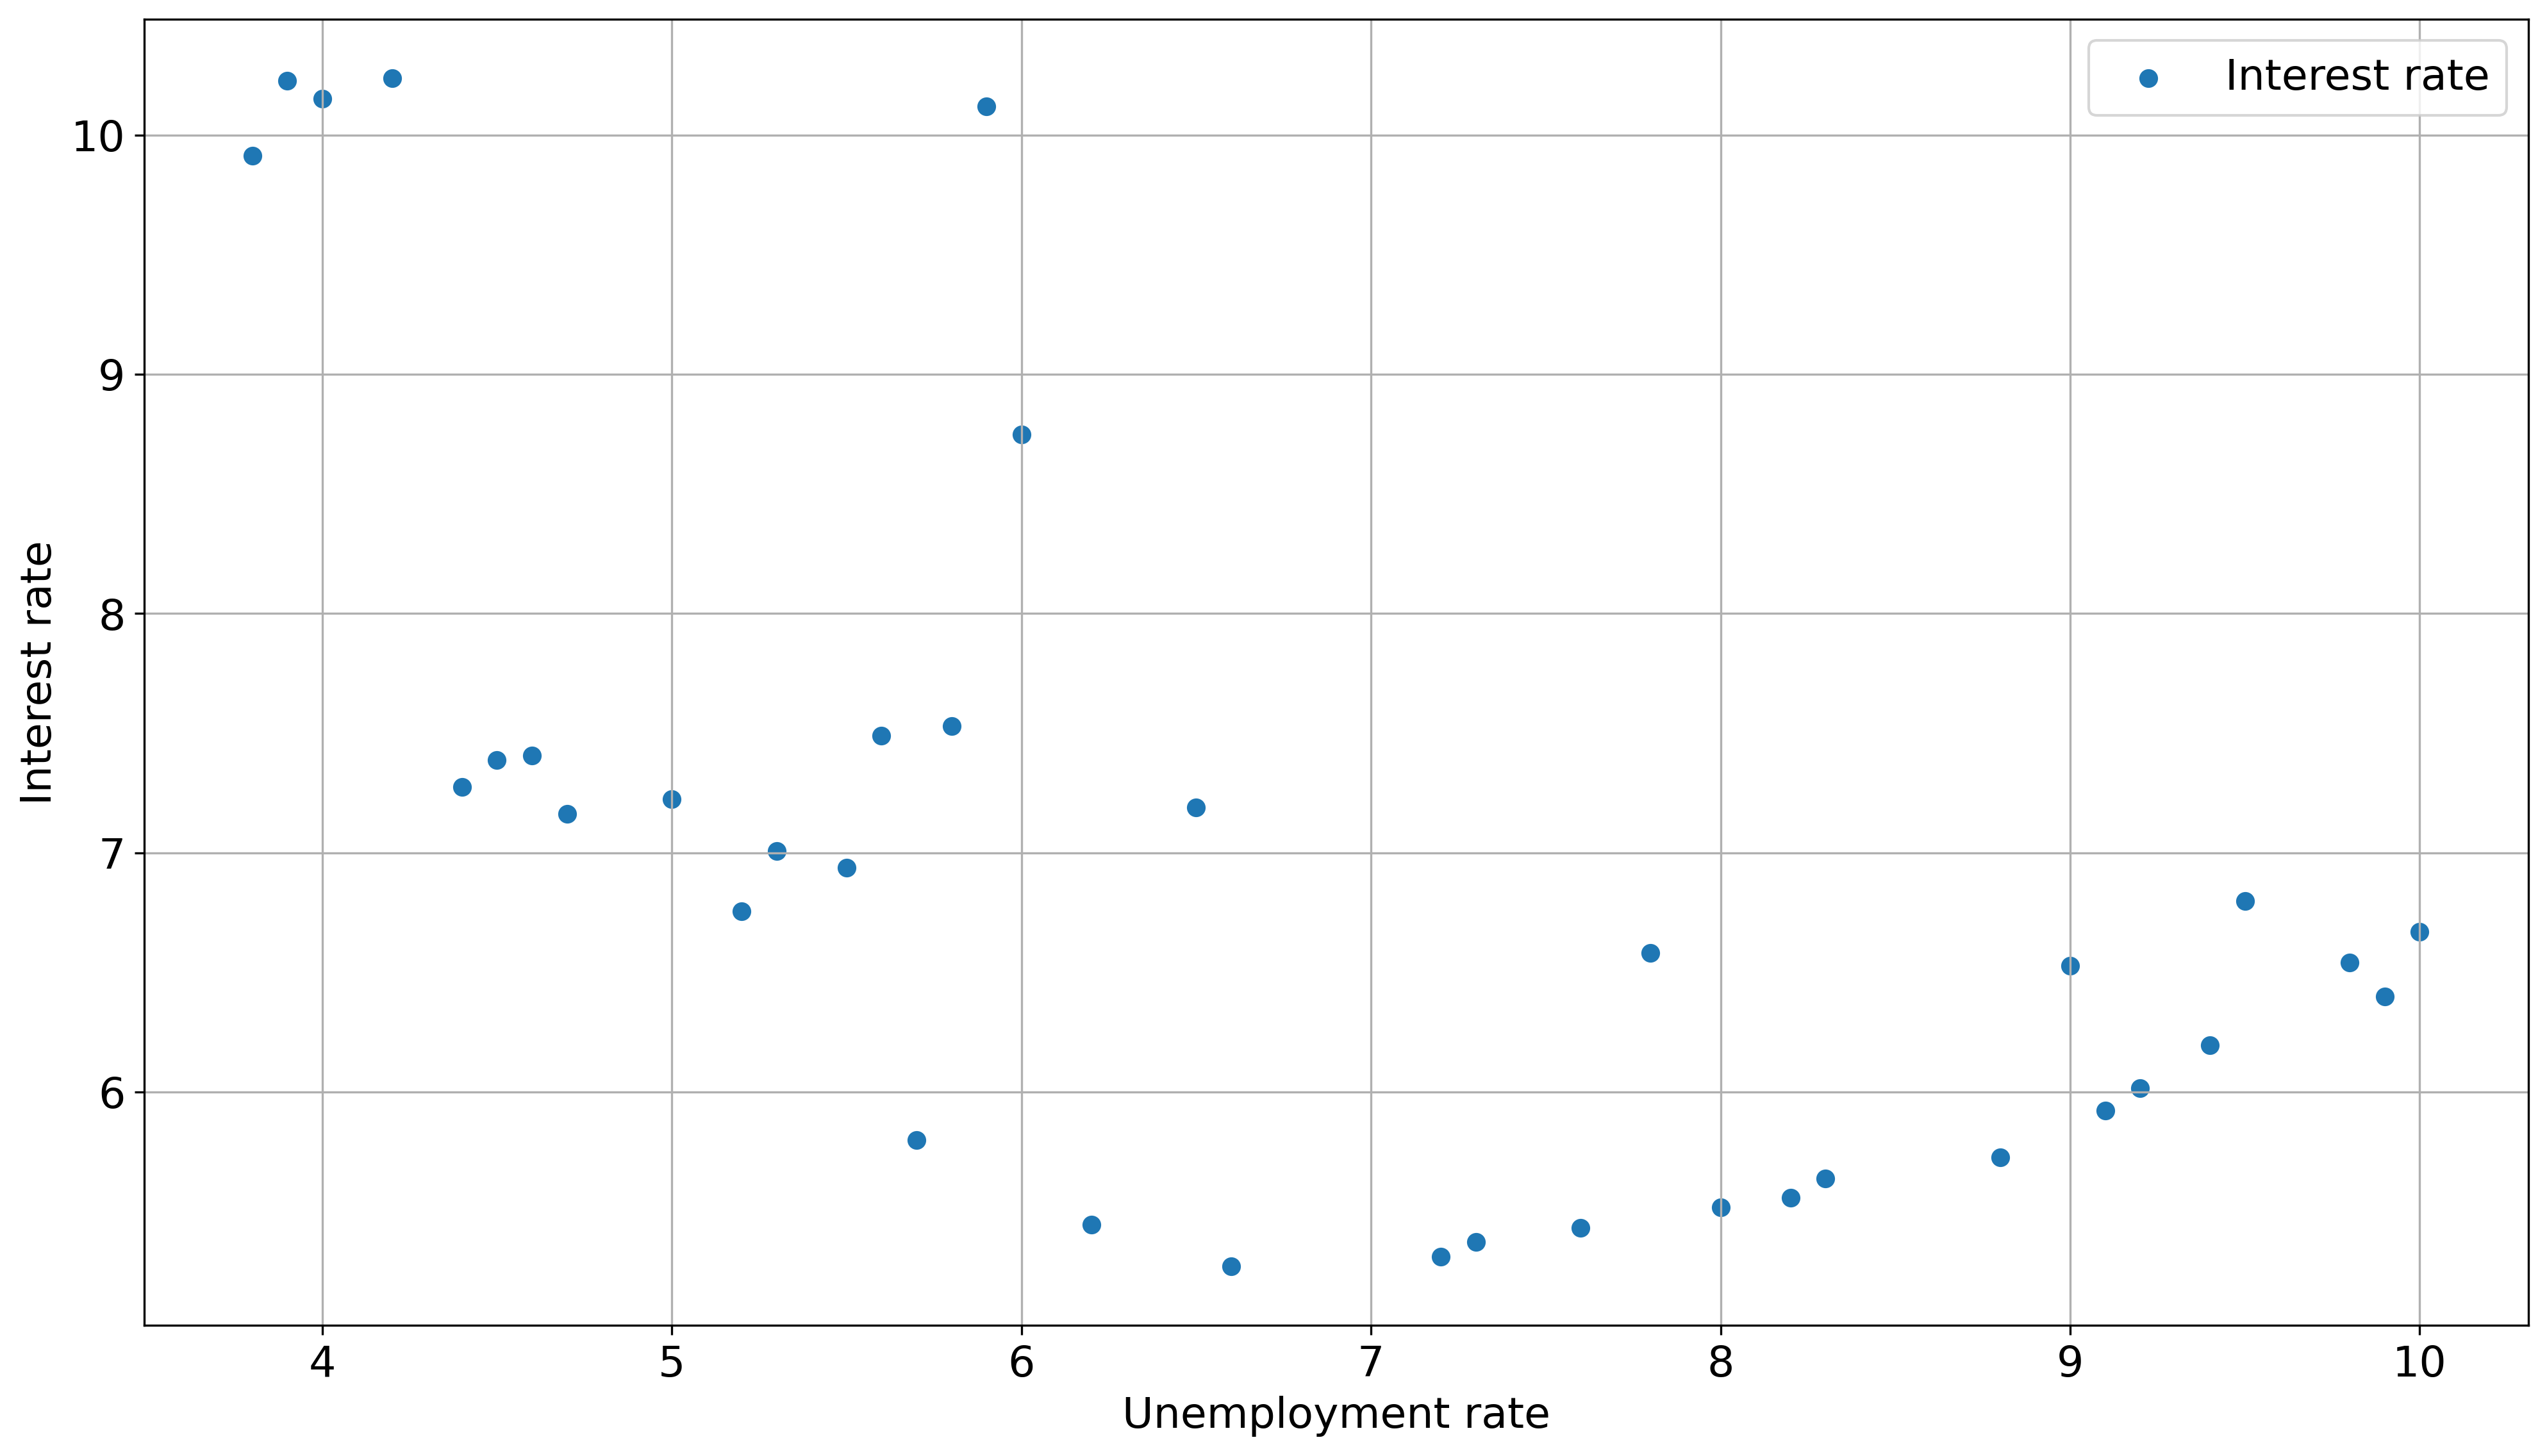

In [103]:
loan_pricing_mean = data6.groupby('uer_time')['interest_rate_time'].mean().reset_index(drop=False)

plt.scatter('uer_time','interest_rate_time', data=loan_pricing_mean, label='Interest rate')
plt.xlabel('Unemployment rate')
plt.ylabel('Interest rate')
plt.legend(loc='best')
plt.grid(True)
plt.show()

Using regression model to compute the interest rate estimate with choices of features. The choices of variable are GDP rate, Unemployment rate and Time as they are relative to economic variables which might be reasonable and related to forecast interest rate. The mean of interest rate is 6.702 from the model. Plot the interest rate prediction with each variable to draft a dashboard application. The input for the x-axis is the three choices of features (gdp_time, uer_time and time) and the y-axis is the interest rate.  

# b)

In [104]:
from jupyter_dash import JupyterDash

In [105]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import plotly.express as px
from jupyter_dash import JupyterDash
from dash.dependencies import Input, Output

In [106]:
interest_rate = pd.DataFrame(loan_pricing.fittedvalues,columns=['interest_rate'])
data6 = pd.merge(data, interest_rate, right_index=True, left_index=True)

data7 = data6[['gdp_time','time','uer_time','interest_rate']]
data7

gdp_time  time  uer_time  interest_rate
0       2.899137    25       4.7       7.259363
1       2.151365    26       4.7       7.301575
2       2.361722    27       4.4       7.228333
3       1.229172    28       4.6       7.312338
4       1.692969    29       4.5       7.192495
...          ...   ...       ...            ...
622484  1.717053    56       6.6       5.411829
622485  2.556052    57       6.2       5.257269
622486  2.868594    58       6.2       5.152626
622487  2.443648    59       5.7       5.178873
622488  2.836358    60       5.7       5.063127

[622489 rows x 4 columns]

In [107]:
# Build app
app = JupyterDash(__name__)
app.layout = html.Div([
    html.H1("JupyterDash Demo"),
    dcc.Graph(id='graph'),
    html.Label([
        "Input variable",
        dcc.Dropdown(
        id='column-dropdown', clearable=False,
        value = data7.columns[0],options=[
            {'label': c, 'value': c}
            for c in data7.columns
        ]) 
    ]),
])

#Define callback to update graph
@app.callback(
    Output('graph','figure'),
    [Input("column-dropdown","value")]
)
def update_figure(column):
    return px.scatter(
        data7, x=column, y="interest_rate",
        render_mode="webgl", title="Interest rate"
    )

app.run_server(mode='inline')

Creating a dashboard application using package JupyterDash from the draft application in question 6A and uses the framework of the Plotly library for Python which is in the reference list. 